**Group :** 5-SIEC 

**Name, surname 1**: Iyed Hamrouni

**Name, surname 2**: Miquel Plana Pinol

## Advice
### Work
- **Read the whole subject before starting**
- Search for the documentation (Google) before asking a teacher
- The work will be evaluated based on this notebook:
    - Answer questions in the notebook.
    - Insert your code here and execute it so that the output stays displayed for the teacher.

### ChatGPT
- You can use ChatGPT ONLY to answer your own questions (misunderstanding, bug, etc.). Be aware that there is no guaranty in the answer of ChatGPT (even with the paying licence).
- For details about the machine learning libraries, prefer looking at the online documentation.
- Do not use ChatGPT to work in your stead ! The goal is for you to learn the manipulation of machine learning basic methods yourself. Teachers are used to look at student's works and ChatGPT is not good to fake it.
=> In case of a doubt of ChatGPT use (or plagiarism between groups), the students will be summoned and evaluated on an oral presentation.

# TP Clustering 5SIEC
Marie José Huguet, Philippe Leleux

**Objectifs**
Le but de ces TP est mettre en oeuvre et de comparer différents algorithmes de clustering tout d"abordà partir de quelques méthodes fournies parscikitlearnou en utilisant des méthodes externes.Nous utilisons des jeux de données en 2 dimensions seulement pour des raisons pédagogiques. En effet,en visualisant ces exemples, il est souvent assez évident de déterminer le bon nombre de clusters àobtenir.

**Encadrants**
Philippe Leleux
Aminata Sangho

**Moodle**
https://moodle.insa-toulouse.fr/enrol/index.php?id=1548

**Environnement de travail**
Dans les salles de TP, connectez vous sur une session Linux. Dans un terminal:

- Si votre prompt ne commence pas par "(base)", lancez:
```
conda init
```
puis ouvrez un nouveau terminal (base apparaît maintenant)
- Créez un environnement spécifique pour les TP de clustering: 
```
conda create -n TP5-SIEC-clustering
```
- Activez l'environnement:
```
conda activate TP-5SIEC-clustering
```
- Ouvrez l'IDE Python de votre préférence: Visual Studio, Spyder, jupyter-notebook
- Vous pouvez ensuite installer les packages Python nécessaires pour ces TP avec la commande
```
conda install PACKAGE
```
ou
```
pip install PACKAGE
```
Dans un premier temps vous aurez besoin des packages *scipy*, *numpy*, *matplotlib*, *scikit-learn*.

## 1. Jeux de données

Les jeux de données sont disponibles sur le site :
https://github.com/deric/clustering-benchmark.

Seuls les jeux de données "artificiels" seront considérés dans ces TP (https://github.com/deric/clustering-benchmark/tree/master/src/main/resources/datasets/artificial).

Le code ci-dessous fournit un exemple pour lire ces jeux de données et les visualiser en deux dimensions. Pour la lecture des jeux de données, il utilise le package *arff* de *scipy.io*. Pour l"affichage, il utilise le package *pyplot* de *matplotlib*. N"hésitez pas à proposer des visualisations plus avancées.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

# Parser  un  fichier  de  donnees  au  format  arff
# data  est un  tableau d"exemples  avec  pour  chacun
#       la  liste  des  valeurs  des  features
## Dans  les  jeux de  donnees  consideres :
#    il y a 2 features (dimension 2)
# Ex : [[-0.499261 , -0.0612356],
#         [-1.51369 , 0.265446],
#         [-1.60321 , 0.362039], .....
#       ]
# 
# Note : chaque  exemple  du jeu de  donnees  contient  aussi  un
# numero  de  cluster. On  retire  cette  information

YOURPATH="/home/planapin/5_Machine_Learning/TP/Cours/5SIEC - I5AIMI11 - Machine Learning/TPs/clustering-benchmark/src/main/resources/datasets/"
# YOURPATH="/path/to/the/datasets/"
path = YOURPATH + "artificial/"
databrut = arff.loadarff(open(path+"xclara.arff", "r"))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])

# Affichage  en 2D
# # Extraire  chaque  valeur  de  features  pour en faire  une  liste
# # Ex pour f0 = [-0.499261 , -1.51369 , -1.60321 , ...]
# # Ex pour f1 = [-0.0612356 , 0.265446 , 0.362039 , ...]

f0 = datanp[:,0]# tous  les  elements  de la  premiere  colonne
f1 = datanp[:,1]# tous  les  elements  de la  deuxieme  colonne
plt.scatter(f0 , f1 , s=8)
plt.title("Donnees  initiales")
plt.show()

Dans les jeux de données *arff*, pour chaque exemple, la dernière colonne fournit le numéro de cluster (sans précision sur la méthode utilisée pour l"obtenir). En pratique,vous ne devez pas utiliser cette colonne car on suppose que les clusters ne sont pas connus.

## 2. Clustering *k*-Means

### 2.1 Pour démarrer
Le code ci-dessous permet d"appeler la méthode k-Means avec un nombre fixé de clusters et d"af-ficher le résultat ainsi que le temps de calcul et le nombre d"itérations.

Appel KMeans pour une valeur fixee de k


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


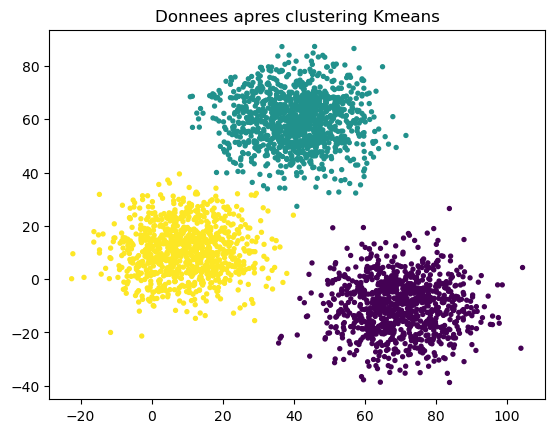

nb clusters = 3 , nb iter = 2 ,     runtime = 41.71  ms


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster
#
# Les donnees sont dans datanp(2 dimensions)
# f0 : valeurs sur la premiere dimension
3# f1 : valeur sur la deuxieme dimension
#
print ("Appel KMeans pour une valeur fixee de k")
tps1 = time.time ()
k=3
model = cluster.KMeans(n_clusters=k , init = "k-means++")
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_

plt.scatter(f0, f1, c = labels, s = 8)
plt.title("Donnees apres clustering Kmeans")
plt.show()
print("nb clusters =",k ,", nb iter =", iteration ,", \
    runtime =", round (( tps2 - tps1) * 1000 , 2) ," ms")

### 2.2 Intérêts de la méthode k-Means
Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode k-Means devrait identifier correctement les clusters.
On considère qu"il peut être possible de déterminer "automatiquement" le bon nombre de clusters.
Utilisez les métriques d"évaluation proposées dans scikitlearn (coefficient de silhouette et/ou indice de Davies-Bouldin et/ou l"indice de Calinski-Harabasz): https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

- Appliquez itérativement la méthode précédente pour déterminer le bon nombre de clusters à l"aide de métriques d"évaluation
- Mesurez le temps de calcul
- Arrivez-vous à retrouver le résultat attendu à l"aide de ces métriques d"évaluation ?

### 2.3 Limites de la méthode k-Means
Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode k-Means aura des difficultés pour identifier correctement les clusters.
Appliquez la méthode k-Means (en faisant varier la valeur de k) sur ces jeux de données pour confirmer vos choix.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

PATH="/home/planapin/5_SIEC/TP_Machine_Learning/TP_clustering/datasets_part1/artificial/"

def load_arff_2d(dataname):
    databrut = arff.loadarff(open(PATH + dataname, "r"))
    return np.array([[x[0],x[1]] for x in databrut[0]])


def evaluate_kmeans(data, k_values):
    results = []
    for k in k_values:
        start = time.time()
        model = cluster.KMeans(n_clusters=k , init = "k-means++")
        model.fit(data)
        end = time.time()
        
        labels = model.labels_
        iterations = model.n_iter_
        silhouette = silhouette_score(data, labels)
        db = davies_bouldin_score(data, labels)
        ch = calinski_harabasz_score(data, labels)
        
        results.append({
            "k": k,
            "labels": labels,
            "silhouette": silhouette,
            "davies_bouldin": db,
            "calinski_harabasz": ch,
            "iterations": iterations,
            "runtime_ms": (end - start) * 1000
        })
        
    return results


def show_results(data, results):
    k_values = [r["k"] for r in results]
    silhouettes = [r["silhouette"] for r in results]
    davies = [r["davies_bouldin"] for r in results]
    calinski = [r["calinski_harabasz"] for r in results]


    f0 = data[:,0]# tous  les  elements  de la  premiere  colonne
    f1 = data[:,1]# tous  les  elements  de la  deuxieme  colonne
    
    # Silhouette
    plt.figure()
    plt.plot(k_values, silhouettes)
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.title("Evolution du coefficient de silhouette")
    plt.grid(True)
    plt.show()

    best_k_silhouette = max(results, key=lambda r: r["silhouette"])["k"]
    print("Best k (silhouette):", best_k_silhouette)
    start = time.time()
    model = cluster.KMeans(n_clusters=best_k_silhouette , init = "k-means++")
    model.fit(data)
    end = time.time()
    labels = model.labels_
    iteration = model.n_iter_

    
    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,", nb iter =", iteration ,"runtime =", round (( end - start) * 1000 , 2) ," ms")

    # Davies-Bouldin
    plt.figure()
    plt.plot(k_values, davies)
    plt.xlabel("k")
    plt.ylabel("Davies-Bouldin index")
    plt.title("Evolution de l'indice de Davies-Bouldin")
    plt.grid(True)
    plt.show()


    best_k_davies = min(results, key=lambda r: r["davies_bouldin"])["k"]

    print("Best k (davies_bouldin):", best_k_davies)
    start = time.time()
    model = cluster.KMeans(n_clusters=best_k_davies , init = "k-means++")
    model.fit(data)
    end = time.time()
    labels = model.labels_
    iteration = model.n_iter_

    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,", nb iter =", iteration ,"runtime =", round (( end - start) * 1000 , 2) ," ms")

    

    # Calinski-Harabasz
    plt.figure()
    plt.plot(k_values, calinski)
    plt.xlabel("k")
    plt.ylabel("Calinski-Harabasz index")
    plt.title("Evolution de l'indice de Calinski-Harabasz")
    plt.grid(True)
    plt.show()

    best_k_calinski = max(results, key=lambda r: r["calinski_harabasz"])["k"]

    print("Best k (calinski_harabasz):", best_k_calinski)
    start = time.time()
    model = cluster.KMeans(n_clusters=best_k_calinski , init = "k-means++")
    model.fit(data)
    end = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    
    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,", nb iter =", iteration ,"runtime =", round (( end - start) * 1000 , 2) ," ms")
    


ANALYSE POUR DATASET: xclara.arff


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

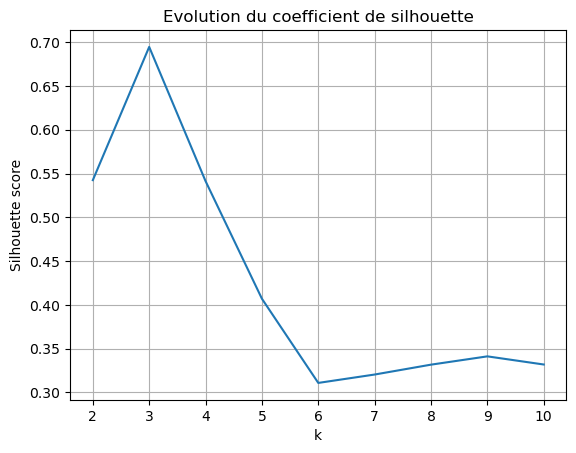

Best k (silhouette): 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


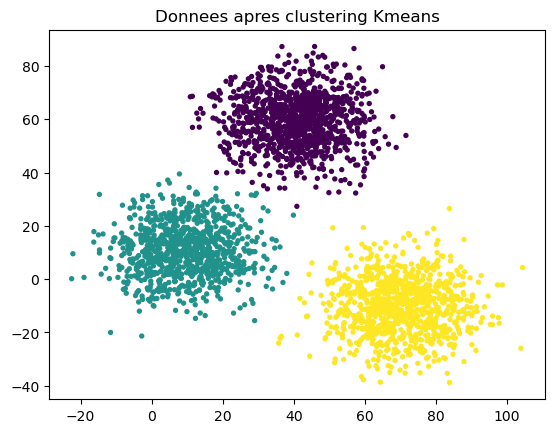

nb clusters = 3 , nb iter = 3 runtime = 37.58  ms


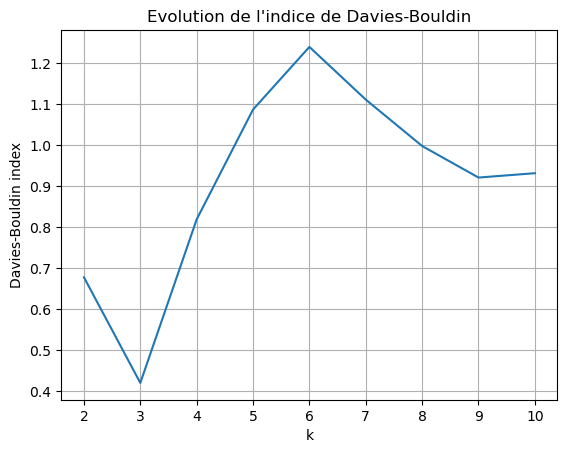

Best k (davies_bouldin): 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


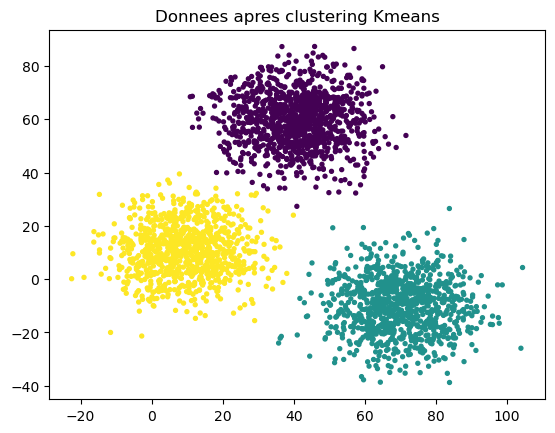

nb clusters = 3 , nb iter = 3 runtime = 21.89  ms


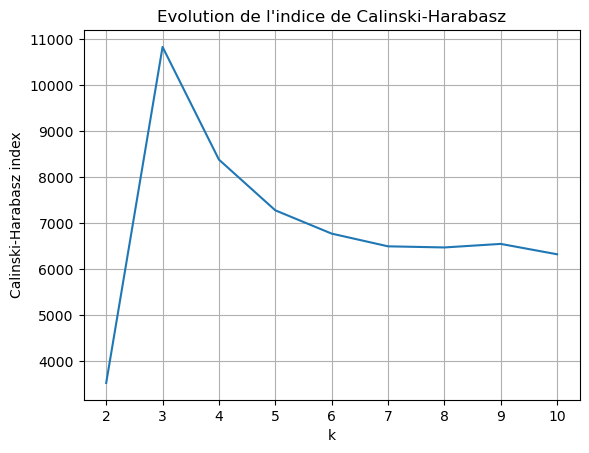

Best k (calinski_harabasz): 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


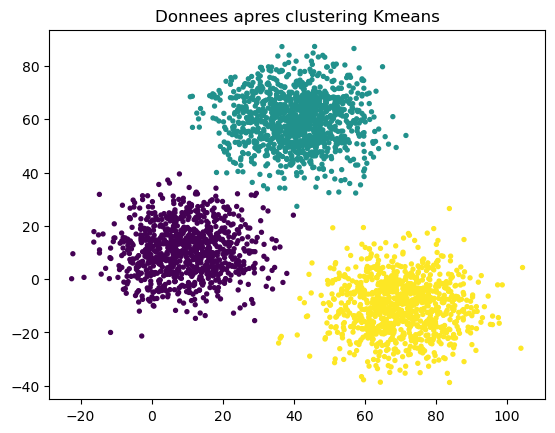

nb clusters = 3 , nb iter = 3 runtime = 23.02  ms
ANALYSE POUR DATASET: sizes1.arff


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

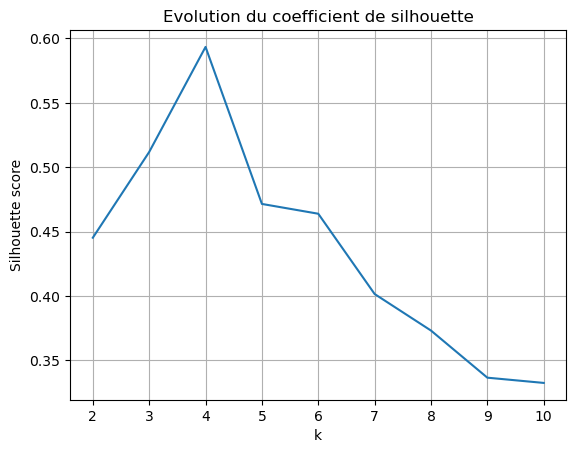

Best k (silhouette): 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


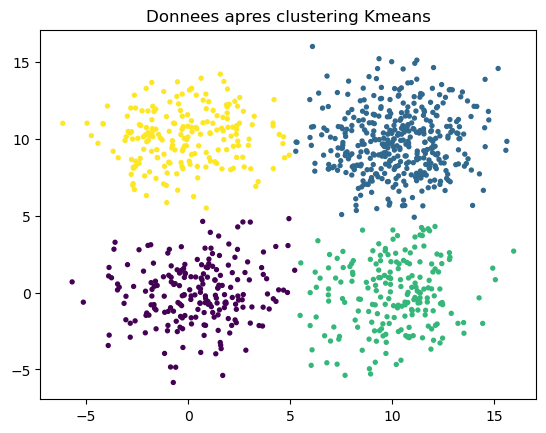

nb clusters = 3 , nb iter = 4 runtime = 21.47  ms


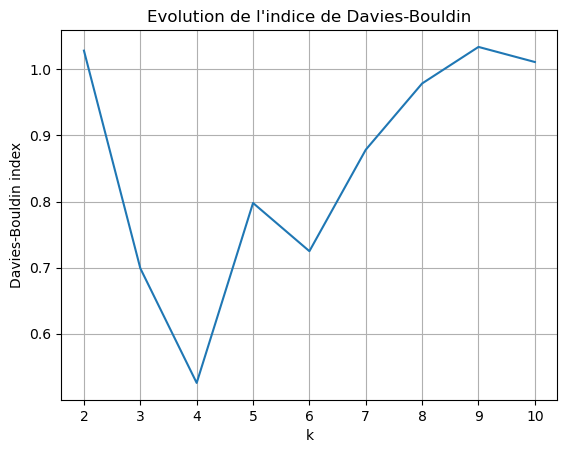

Best k (davies_bouldin): 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


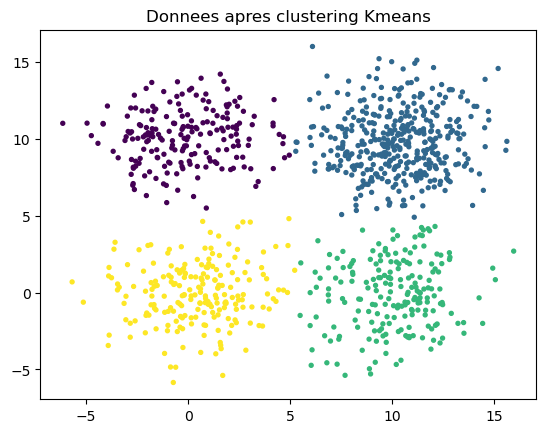

nb clusters = 3 , nb iter = 4 runtime = 21.1  ms


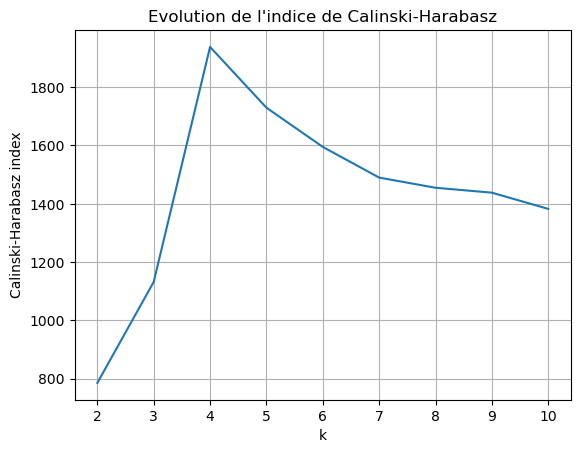

Best k (calinski_harabasz): 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


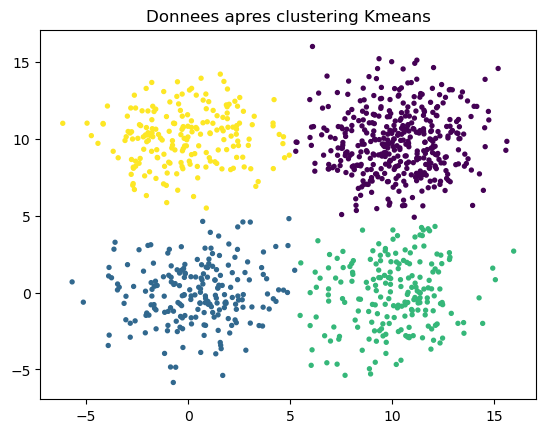

nb clusters = 3 , nb iter = 3 runtime = 22.83  ms
ANALYSE POUR DATASET: spherical_4_3.arff


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

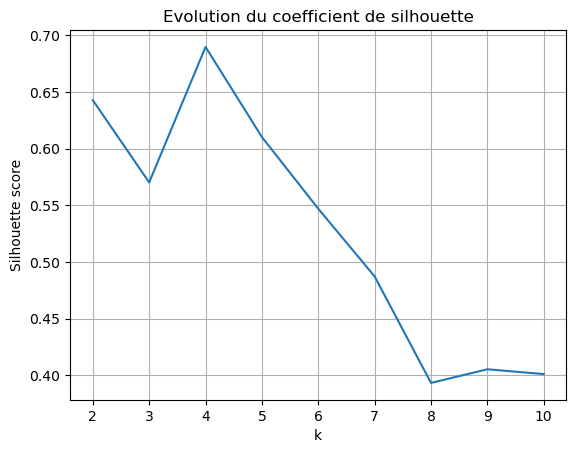

Best k (silhouette): 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


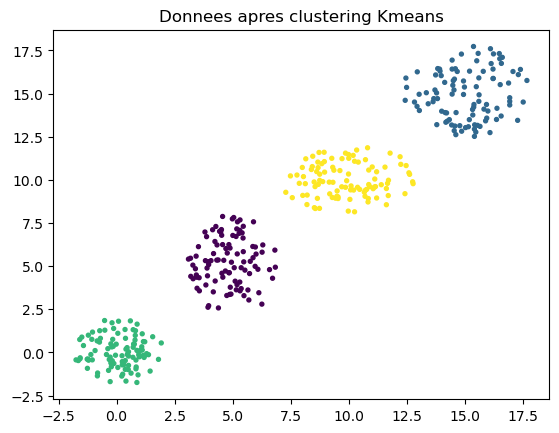

nb clusters = 3 , nb iter = 3 runtime = 17.8  ms


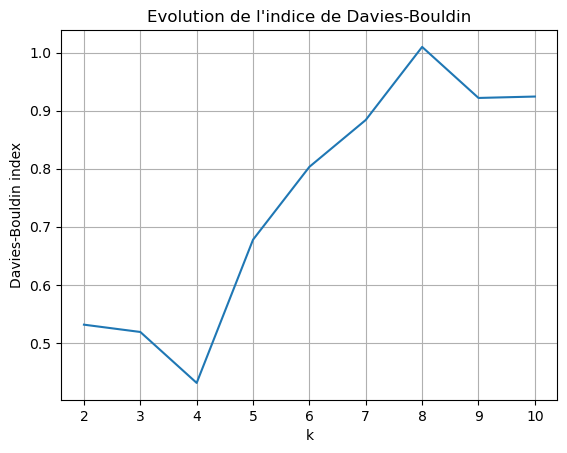

Best k (davies_bouldin): 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


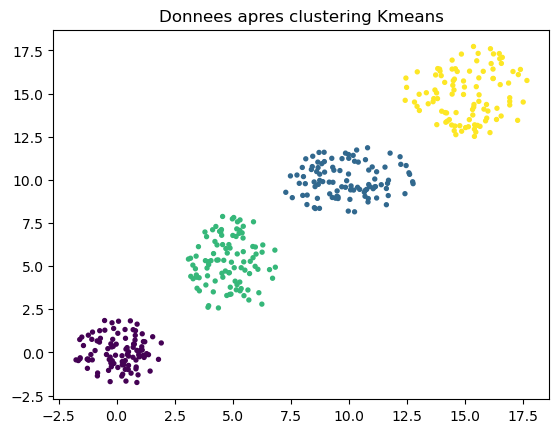

nb clusters = 3 , nb iter = 2 runtime = 17.95  ms


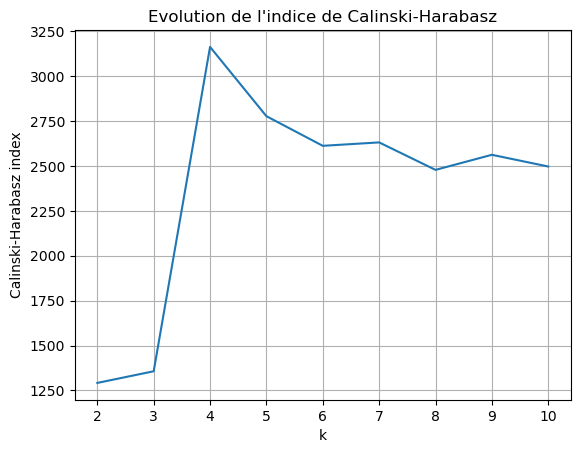

Best k (calinski_harabasz): 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


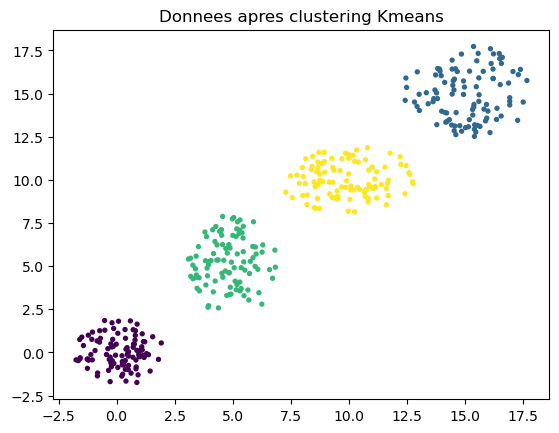

nb clusters = 3 , nb iter = 2 runtime = 23.25  ms


In [15]:
########JEUX DE DONNEES FACILES POUR K-MEANS

k_range = range(2, 11)
easy_datasets = ["xclara.arff", "sizes1.arff","spherical_4_3.arff"]
for name in easy_datasets:
    print("ANALYSE POUR DATASET: " + name)
    data = load_arff_2d(name)
    results = evaluate_kmeans(data, k_range)
    show_results(data, results)

ANALYSE POUR DATASET: rings.arff


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

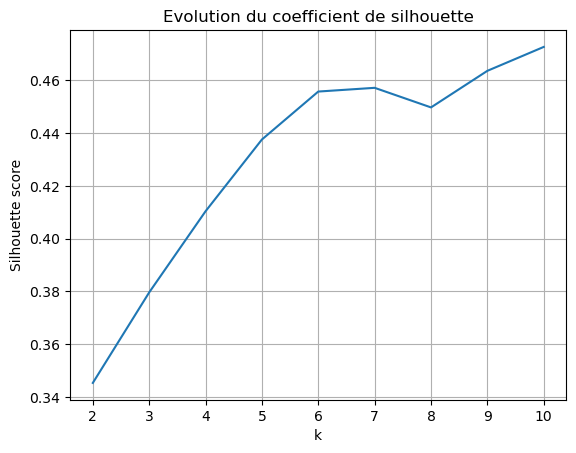

Best k (silhouette): 10


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


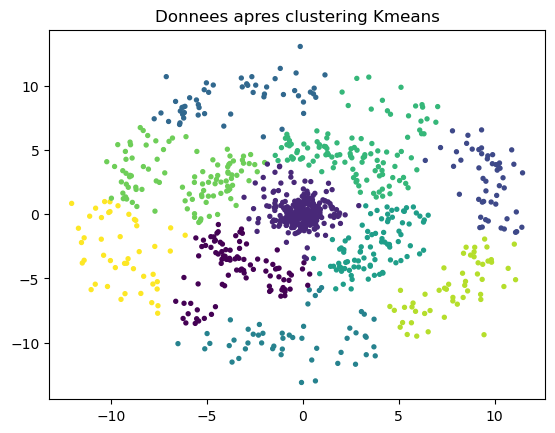

nb clusters = 3 , nb iter = 22 runtime = 54.53  ms


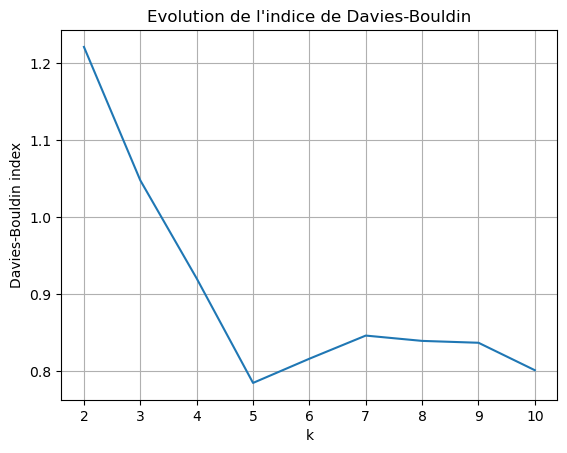

Best k (davies_bouldin): 5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


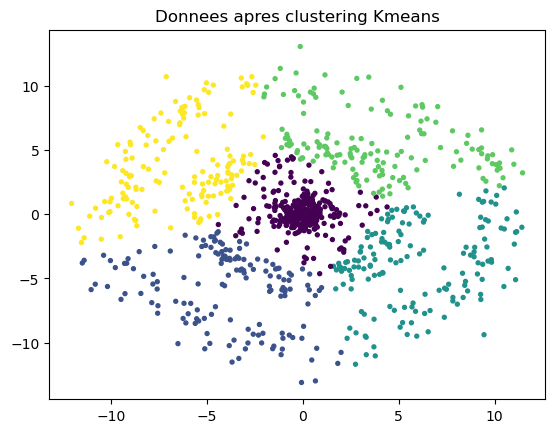

nb clusters = 3 , nb iter = 15 runtime = 28.08  ms


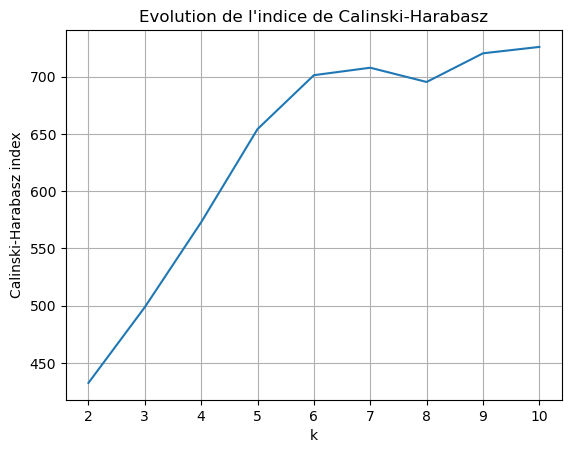

Best k (calinski_harabasz): 10


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


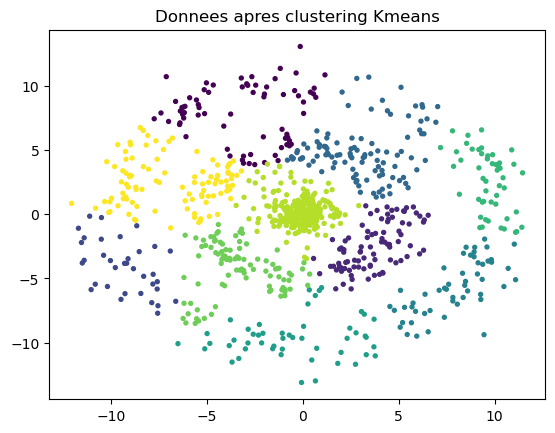

nb clusters = 3 , nb iter = 15 runtime = 41.25  ms
ANALYSE POUR DATASET: banana.arff


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

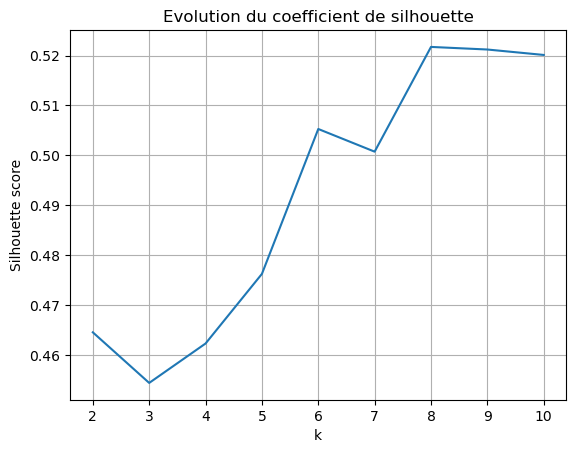

Best k (silhouette): 8


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


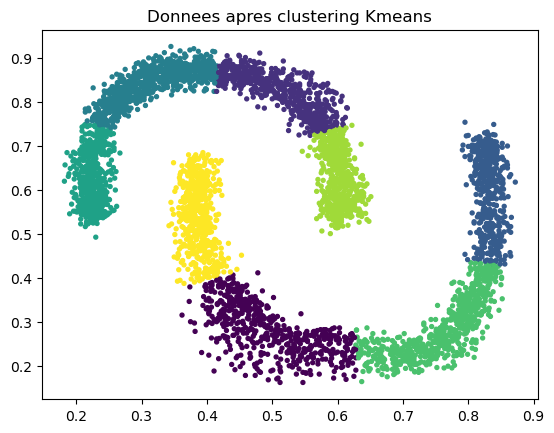

nb clusters = 3 , nb iter = 14 runtime = 62.16  ms


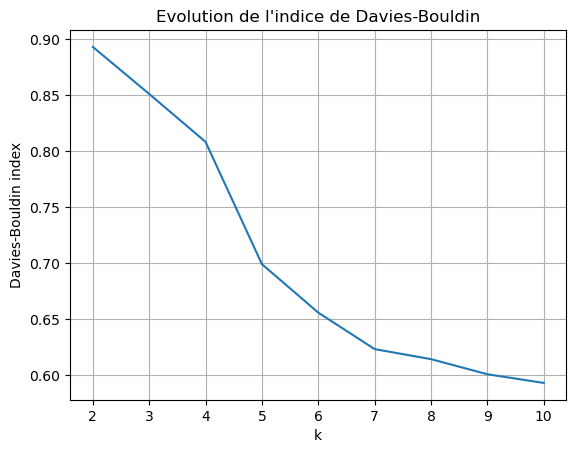

Best k (davies_bouldin): 10


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


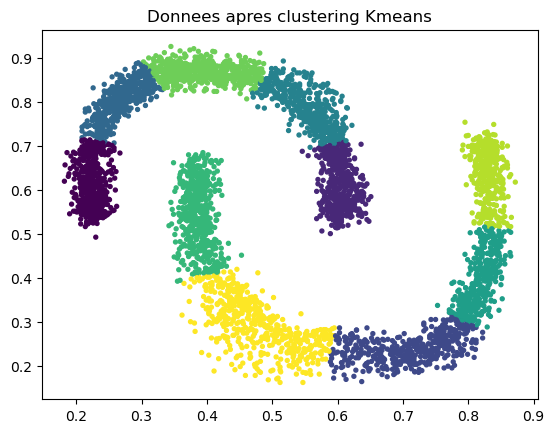

nb clusters = 3 , nb iter = 21 runtime = 63.98  ms


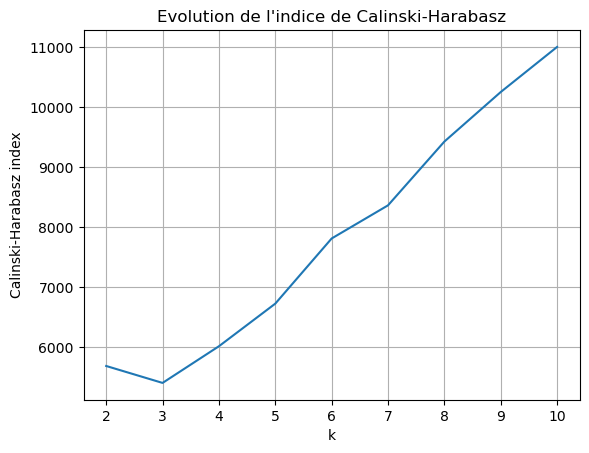

Best k (calinski_harabasz): 10


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


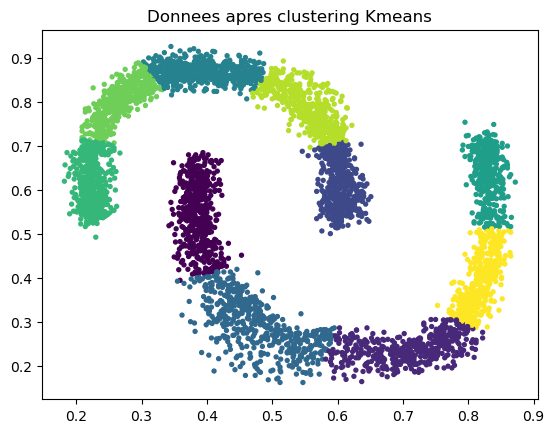

nb clusters = 3 , nb iter = 21 runtime = 71.67  ms
ANALYSE POUR DATASET: complex8.arff


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

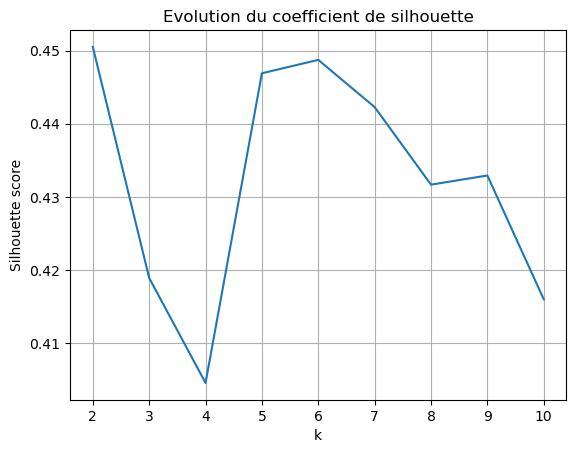

Best k (silhouette): 2


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


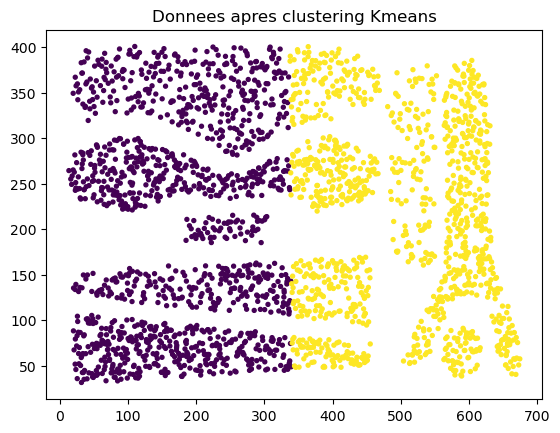

nb clusters = 3 , nb iter = 7 runtime = 25.91  ms


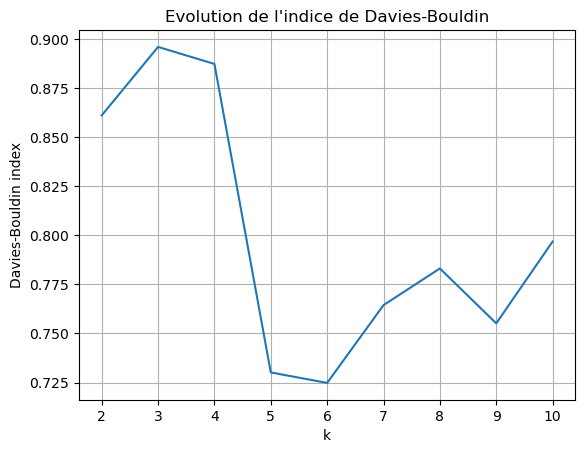

Best k (davies_bouldin): 6


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


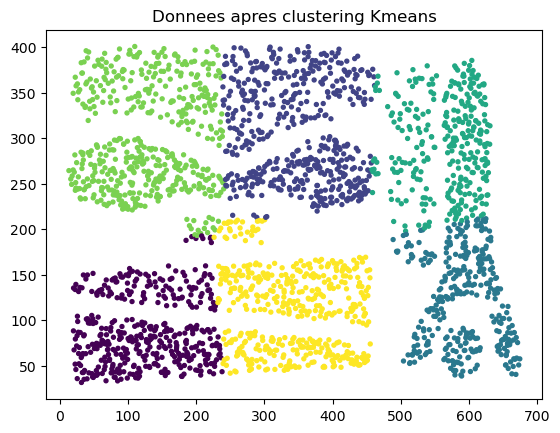

nb clusters = 3 , nb iter = 14 runtime = 46.77  ms


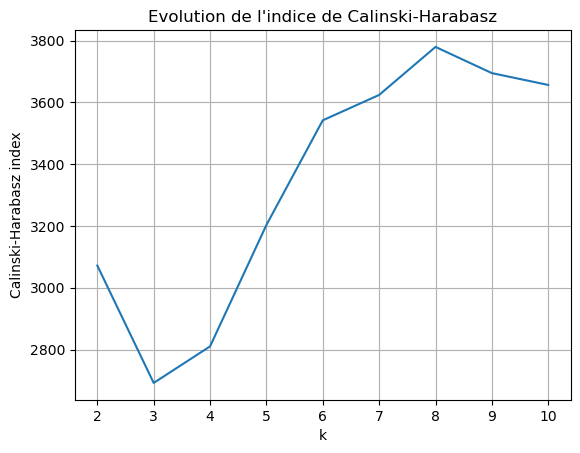

Best k (calinski_harabasz): 8


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


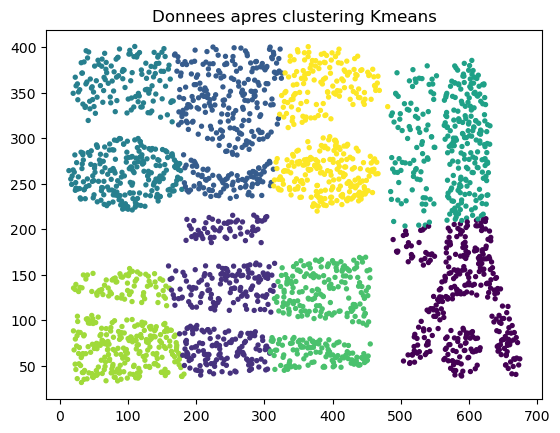

nb clusters = 3 , nb iter = 16 runtime = 44.39  ms


In [16]:
########JEUX DE DONNEES DIFICILES POUR K-MEANS
k_range = range(2, 11)
difficult_datasets = ["rings.arff", "banana.arff", "complex8.arff"]
for name in difficult_datasets:
    print("ANALYSE POUR DATASET: " + name)
    data = load_arff_2d(name)
    results = evaluate_kmeans(data, k_range)
    show_results(data, results)

#### Explication de la methode

hreuhfieurfburtgurt


## 3. Clustering agglomératif

### 3.1 Pour démarrer
Le code ci-dessous permet d"afficher un dendrogramme (il y a d"autres possibilités ...) avec la méthode d"agglomération de clusters single.

Dendrogramme 'single' donnees initiales


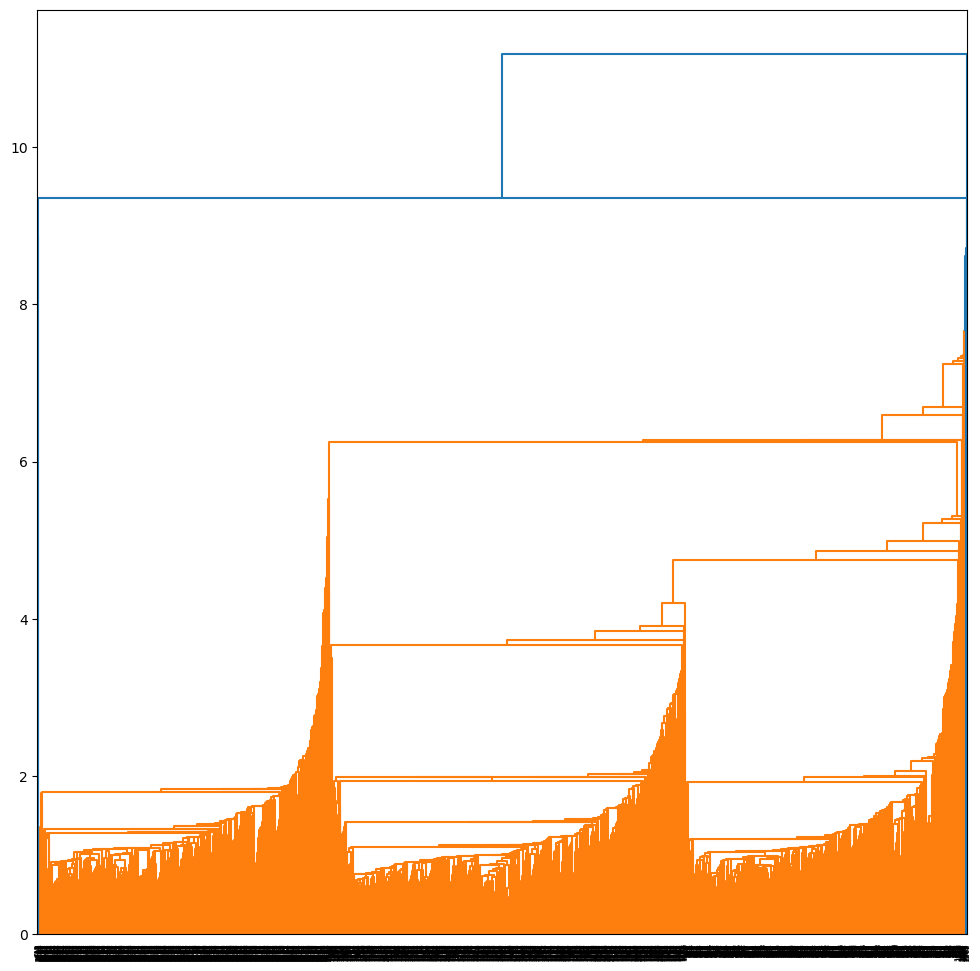

In [18]:
import scipy.cluster.hierarchy as shc

# Donnees dans datanp
print("Dendrogramme 'single' donnees initiales")

linked_mat = shc.linkage(datanp , "single")

plt.figure(figsize =(12 , 12))
shc.dendrogram(linked_mat ,
orientation = "top" ,
distance_sort = "descending" ,
show_leaf_counts = False)
plt.show()


Le code suivant permet de déterminer un clustering hiérarchique en utilisant soit une limite sur le seuil de distance soit un nombre de clusters.

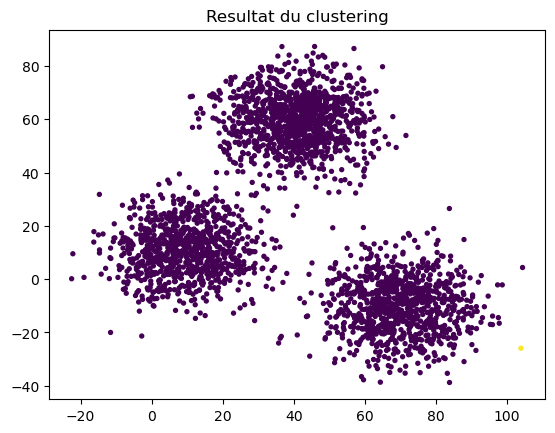

nb clusters = 2 , nb feuilles = 3000 runtime = 39.9  ms


In [32]:
f0 = datanp[:,0]# tous  les  elements  de la  premiere  colonne
f1 = datanp[:,1]# tous  les  elements  de la  deuxieme  colonnedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA9QAAAPLCAYAAAC+VMHKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAACDqElEQVR4nOz9d3hc13kv+r8A0QGCJMDeRZGyGtUVyZacyHYkPbEtyzlxU+JYx05yEts3Um6u7jnRcXKvnfwSndyrk2v7JFYedym2XOMeO45b3GLK6pRJNVKUCPYiFvS6f3/AMxyCqBszmBng83kePgQGM3svDGb27O9ea72rIkmSJAAAAIApqSx2AwAAAKAcCdQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQQlWxGzDS0NBQ7Nu3L+bPnx8VFRXFbg4AAACzXJIk0d7eHitXrozKysn3O5dcoN63b1+sWbOm2M0AAABgjmlra4vVq1dP+v4lF6jnz58fEcO/SHNzc5FbAwAAwGx38uTJWLNmTTaPTlbJBerMMO/m5maBGgAAgBkz1WnHipIBAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQApVxW4AAJAfSZJEd/9gsZsBAGWnq28g1eMEagCYBZIkiTf848/i4ReOFbspAFB2hnq7Uj3OkG8AmAW6+weFaQCYYXqoAWCWeejPfz0aauYVuxkAUBa6+gbjsr/4WqrHCtQAMMs01MyLhhof8QBQaIZ8AwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQgUAMAAEAKAjUAAACkIFADAABACgI1AAAApCBQAwAAQAoCNQAAAKQw5UD9ox/9KG666aZYuXJlVFRUxFe+8pXTfp4kSbz3ve+NlStXRn19fVx33XWxbdu2fLUXAAAASsKUA3VnZ2dcfPHF8fd///ej/vz/+X/+n/i7v/u7+Pu///t48MEHY/ny5XH99ddHe3v7tBsLAAAApaJqqg/4jd/4jfiN3/iNUX+WJEm8//3vj/e85z3xn/7Tf4qIiHvvvTeWLVsW999/f/zhH/7h9FoLAAAAJSKvc6h37doVBw4ciBtuuCF7W21tbfzar/1a/Md//Meoj+nt7Y2TJ0+e9g8AAABKXV4D9YEDByIiYtmyZafdvmzZsuzPRrrrrrtiwYIF2X9r1qzJZ5MAAACgIApS5buiouK075MkOeO2jDvvvDNOnDiR/dfW1laIJgEAAEBeTXkO9XiWL18eEcM91StWrMjefujQoTN6rTNqa2ujtrY2n80AAACAgstrD/VZZ50Vy5cvj+985zvZ2/r6+uKHP/xhvOxlL8vnrgAAAKCoptxD3dHRETt27Mh+v2vXrnjssceipaUl1q5dG3/yJ38Sf/M3fxObNm2KTZs2xd/8zd9EQ0ND/PZv/3ZeGw4AAADFNOVA/dBDD8UrXvGK7Pd/+qd/GhERt956a3zyk5+M//pf/2t0d3fHu971rjh27FhcddVV8W//9m8xf/78/LUaAAAAimzKgfq6666LJEnG/HlFRUW8973vjfe+973TaRcAAACUtIJU+QYAAIDZTqAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUqordgLF09Q1EVd9AsZsBAGWhK+czs8vnJwBM2nQ+N0s2UP/KX38vKmsbit0MACg7V/z/vlfsJgDAnGDINwAAAKRQsj3UEREP/fmvR0PNvGI3AwAAgFnqaEdfXPNX/5LqsSUdqBtq5kVDTUk3EQAAgDLWVZN+DrUh3wAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKZR0oB4aSordBAAAABhVSQfqnoGhYjcBAAAARlXSgRoAAABKlUANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAwJyVJEnqxwrUAAAAzElJksQ7Pvlw6scL1AAAAMxJ3f2D8cTeE6kfL1ADAABACgI1AAAApCBQAwAAMCdNpyBZhEANAADAHFVRUTGtxwvUAAAAkIJADQAAwJxkyDcAAABMUZIk8Tsf/fm0tiFQAwAAMOd09w/GY23Hp7UNgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSyHugHhgYiD//8z+Ps846K+rr62PDhg3xl3/5lzE0NJTvXQEAAEDRVOV7g3/7t38b//iP/xj33ntvXHDBBfHQQw/F29/+9liwYEHcfvvt+d4dAAAAFEXeA/XPfvazuPnmm+M1r3lNRESsX78+PvOZz8RDDz2U710BAABA0eR9yPe1114b3/ve9+KZZ56JiIjHH388fvKTn8SrX/3qUe/f29sbJ0+ePO0fAAAAlLq891D/t//23+LEiRNx7rnnxrx582JwcDD++q//Om655ZZR73/XXXfF+973vnw3AwAAAAoq7z3Un/vc5+JTn/pU3H///fHII4/EvffeG3fffXfce++9o97/zjvvjBMnTmT/tbW15btJAAAAkHd576H+P//P/zP+7M/+LN7ylrdERMTmzZvjhRdeiLvuuituvfXWM+5fW1sbtbW1+W4GAAAAFFTee6i7urqisvL0zc6bN8+yWQAAAMwqee+hvummm+Kv//qvY+3atXHBBRfEo48+Gn/3d38X73jHO/K9KwAAACiavAfq//W//lf8xV/8RbzrXe+KQ4cOxcqVK+MP//AP4//6v/6vfO8KAAAAiibvgXr+/Pnx/ve/P97//vfne9MAAABQMvI+hxoAAADmAoEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAACYe5Jk2psQqAEAAJhbkiTivpunvRmBGgAAgLmlvysa9v40tte+fVqbEagBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAgLklSfKymaq8bAUAAABKXZJE9HVG3PvavGxOoAYAAGD2S5KIj98Y0fZA3jYpUAMAADB7JUlEf1dEX1dew3SEQA0AAMBsVYBe6VyKkgEAADA79ee/VzqXHmoAAABmh8zw7oy+nK9v3xpR3TD8dX9XxAcumvbuBGoAAADK30TDu/MQoEcy5BsAAIDyV+Dh3aPRQw0AAEBpGzmUezRjDe8eTdeRiA9dPe1mCdQAAACUrjSVugswvHs0hnwDAABQuoowlHuy9FADAABQHu7YEVEzzlDuyejrirh7Y16aI1ADAABQHmoaImoai92KLEO+AQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFKoKnYDAAAAmGWSJKK/Kz/b6usa/et8bG+aBGoAAADyJ0kiPn5jRNsD+d/23Rvzv81pMOQbAACA/OnvKkyYLkF6qAEAACiMO3ZE1DQUuxWn6zgS8cGL8rIpgRoAAIDCqGmIqGksditOV5O/OdSGfAMAAEAKAjUAAACkIFADAABACuZQAwAAlJN8rvFcCPleNzrfrEMNAAAwBxVyjedCKLF1o/PNkG8AAIByMYfWeC4HeqgBAADKUSmu8VwOju2OuOfqvGxKoAYAAChHpbjGczmozt9FCEO+AQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFKoKnYDAAAokiSJ6O8qdiuYq/q89lLJfd46jkTUeB6nrOto3jYlUAMAzEVJEvHxGyPaHih2S4C0PnhRsVsw5wnUAGPRcwPMZn1dwjTANAnUAKPRcwMAMDusuCzitz8XUVER0Xk04p6r8rZpgRpgNP16bgAAZoX9j0TUNkbUNOZ90wI1wETu2BFR01DsVgAAMBV9XRF3byzoLgRqgInUNBTkiiYAAOXNOtQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApFCRQ7927N9761rdGa2trNDQ0xCWXXBIPP/xwIXYFAAAARVGV7w0eO3YsrrnmmnjFK14R3/rWt2Lp0qWxc+fOWLhwYb53BQAAAEWT90D9t3/7t7FmzZr4xCc+kb1t/fr1+d4NAAAAFFXeh3x/7WtfiyuuuCLe+MY3xtKlS+PSSy+Nj3zkI/neDQAAABRV3gP1c889F/fcc09s2rQpvv3tb8cf/dEfxW233Rb33XffqPfv7e2NkydPnvYPAAAASl3eh3wPDQ3FFVdcEX/zN38TERGXXnppbNu2Le65555429vedsb977rrrnjf+96X72YAAABAQeW9h3rFihVx/vnnn3bbeeedF7t37x71/nfeeWecOHEi+6+trS3fTQIAAIC8y3sP9TXXXBNPP/30abc988wzsW7dulHvX1tbG7W1tfluBgAAABRU3nuo//f//X+PLVu2xN/8zd/Ejh074v77748Pf/jD8e53vzvfuwIAAICiyXugvvLKK+PLX/5yfOYzn4kLL7ww/uqv/ire//73x+/8zu/ke1cAAABQNHkf8h0R8drXvjZe+9rXFmLTAAAAUBLy3kMNAAAAc4FADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANMJokKXYLAAAocQI1wEhJEnHfzad/DwAAIwjUACP1d0XsfejU9xUVxWsLAAAlS6AGAACAFARqAAAASEGgBhhp5Jxpc6gBABiFQA0w0sg50/3dxWkHAAAlTaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEihqtgNAAAAgGlLkoj+rlPf943yde5teSBQAwAAUN6SJOLjN0a0PTD6z+/eWJDdGvINAABAeevvGjtMF5AeagAAAErXyKHco8kdyn371ojqhtHvd6It4iOvyFvTBGoAAABK00RDuUfzgYsK154RDPkGAACgNBVpKPdk6aEGAACg9N2xI6JmjKHck9HXlffiZAI1AAAA+TWZec+TkedlrvJNoAYAACB/0sx7nowCLX01HeZQAwAAkD8lPu85n/RQAwAAUBjTnfecTx1HIj6Y3wrgAjUAAACFUdMQUdNY7FYMq8n/fGxDvgEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaYKQkKXYLAAAoAwI1QK4kibjv5mK3AgCAMiBQA+Tq74rY+1CxWwEAQBkQqAEAACCFqmI3AAAAgGlKkuGRdqWgr2v0r4utAHVyBGqAXAqSAQDlJkkiPn5jRNsDxW7Jme7eWOwWnLLisrxv0pBvgFwVFcVuAQDA1PR3lWaYLjX7H8n7JvVQAwAAzBZ37IioaSh2K0pLX1fBesoFagAAgNmipiGiprHYrZgzDPkGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUVPkGAADKQ5IMr7nM6fq6Rv+aYQV8TgRqAACg9CVJxMdvjGh7oNgtKW0FWm+Z0RnyDQAAlL7+LmGakqOHGgAAKC937IioaSh2KygXHUciPnhRQTYtUAMAAOWlpiGiprHYraBc1BRuDrUh3wAAAJCCQA0AAAApCNQAAACQgkANAAAAKShKBgDAzEqS4SWQYCr6ukb/GiZSwNeLQA0AwMxJkoiP32g9Yabn7o3FbgFEhCHfAADMpP4uYRqYNfRQAwBQHHfsGF5PGKBQ+roKOqJBoAYAoDhqGiJqGovdCoDUDPkGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqAAAASEGgBgAAgBQEagAAAEhBoAYAAIAUBGoAAABIQaAGAACAFARqgFxJUuwWAABQJgRqgIwkibjv5mK3AgCAMiFQA2T0d0XsfajYrQAAoEwI1AAAAJCCQA0AAAApCNQAAACQgkANkKHCNwAAUyBQA2RUVBS7BQAAlBGBGgAAAFIQqAEAACAFgRogwxxqAACmQKAGiBgO0/fdXOxWAABQRgRqgIiI/q6IvQ8VuxUAAJQRgRpgIkNDxW4BAAAlSKAGmMhAT7FbAABACRKoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSqCp2AwAAmAWSJKK/a+L79XWN/vVEqhsiKiqm3i6AAhKoAQCYniSJ+PiNEW0PTO1xd2+c/H3XXB3xjn8VqoGpSZKCbt6QbwAApqe/a+pheqratkyuBxwgI0ki7ru5oLvQQw0QUfCrlwBzxh07Imoa8re9vq6p9WQDZPR3Rex9qKC7EKgBIgwhBMiXmoaImsZitwJgRhjyDQAAACkI1AAAAJCCQA0QYQ41AMBsMwPndwI1wAxUgAQAYIbNQI0cgRpgBipAAgAw+wjUAIZ7AwCQgkANzG2GewMAkJJADcxthnsDAJCSQA0AAMDsMxuqfN91111RUVERf/Inf1LoXQEAAMCMTesraKB+8MEH48Mf/nBcdNFFhdwNAAAAnDJD0/oKFqg7Ojrid37nd+IjH/lILFq0qFC7AQAAgKIoWKB+97vfHa95zWvi13/918e9X29vb5w8efK0fwAAAJDaDC2LWlWIjX72s5+NRx55JB588MEJ73vXXXfF+973vkI0AwAAgLmoomJGdpP3Huq2tra4/fbb41Of+lTU1dVNeP8777wzTpw4kf3X1taW7yYBAABA3uW9h/rhhx+OQ4cOxeWXX569bXBwMH70ox/F3//930dvb2/Mmzcv+7Pa2tqora3NdzMAAACgoPIeqF/1qlfFE088cdptb3/72+Pcc8+N//bf/ttpYRoAAADyrlznUM+fPz8uvPDC025rbGyM1tbWM24HAACAvJqhNagjClSUDACAEpUkw+uz5lNf1+hf53vbAJMxQ2tQR8xQoP73f//3mdgNAADjSZKIj98Y0fZA4fZx98bCbRugxBRsHWoAAEpMf1dhwzTAHGPINwDAXHTHjoiahmK3Ynx9XXq8gZImUAMAzEU1DRE1jcVuBUBZE6gBANIqRIGvQipk8bBCKIc2AnOaQA0AkMZMFPgqJEOpgdlqhtagjlCUDAAgHQW+AErPDK5BHaGHGgBg+sqhwFc56jgS8cGLit0KoJzM4BrUEQI1AMD0KfBVGDXmUAOlzZBvAAAASEGgBua2GSxaAQDA7CJQA3NbRUWxWwAAQJkSqAEAACAFRckAYDZLkuGKp+RfX9foX5M/nlegxAnUADBbJUnEx2+0VvJMuHtjsVsAQBEY8g0As1V/lzANwNwywwVn9VADwFxwx47htZKhnBzbHXHP1cVuBVAukiTivptndJcCNQDMBTUNETWNxW4FTE21i0DAFPR3Rex9aEZ3KVADTCRJIvo6i90KmDpFsyh7Mzt0E2CqBGpgbpvMPJsv3hqx/7GCNwUKStEsytGyi4vdAoBxKUoGzF2TnWcjTAMUx8HHi90CgHHpoQbmrqnOs1HUCWBm9HUZVQGUBYEaYLIUdQIAIIch3wAAAJCCQA0AAAApCNQAAACQgkANAAAAKQjUAAAAkIJADQAAACkI1AAAAJCCQA0AAAApCNQAk5UkxW4BAAAlRKAGmKz7Xi9UAwCQJVADTNbeByP6u4rdCgAASoRADQAAACkI1AAAAJCCQA0AAAApCNQAAACQgkANAABAeUuSiL6ZLx5bNeN7BAAAgHxJkoiP3xjR9sCM71oPNQAAAOWrv6soYTpCoAbmsiQpdgsAAChjAjUwNyVJxH03F7sVAACUMYEamJv6uyL2PlTsVgAAUMYEagAASsvQULFbAJSTIk7jE6gBACgdSRLxT68vdiuAclHkaXwCNQAApcOUHGAq+jqLeswQqIG5SYVvgNLk+AxMRUVFUXcvUANzU5EPvgCMwgoMQJkRqAEAKA2GewNlRqAGAACAFARqAAAASEGgBgCgNChIBkxVkY8bAjUAAMWnIBkwVSVw3BCoAQAoPgXJgKkqgeOGQA3MTYYVApQWx2WgDAnUwNxTAsODAACYphK4ECdQA3NPCQwPAiCHC53AVJXIcUOgBgCguFzoBKaqRI4bAjUAAACkIFADAABACgI1AAAA5aUECpJFCNTAXFQiB2AAfslxGZiqiopityAiBGpgrimRipAA/JLjMpBGiVyIE6iBuaVEKkIC8Et9nY7LwNSU0IU4gRoAgOIooZNioIyUUAeJQA0AQHGU0EkxUEZKZLh3hEANzDVDQ8VuAQARwyfEfV3FbgVQbkpsZEtVsRsAMGOSJOKfXl/sVgAwNBTx8esj9uidBqaoxOouCNTA3FFiB2CAOSlJIj52veMxMHUl1jsdYcg3MFeU4AEYYE4abd70u7YUpy1AeentKLmLcQI1MDcofANQuqoait0CoNSV6NQ9gRoAAIDSVqKdIwI1AAAApCBQAwAAQAoCNQAAAKQgUAMAMDOSJKKvq9itAMgb61ADAFB4Q0MRH78+Yk/pFRUCSEugBgCgsJIk4mPXl2SFXoDpMOQbAIDCKtHlbgCmS6AGAGDm3P54sVsAkDcCNQAAhTOyEFl1Q/HaApBn5lADAFAYoxUiu/8txWsPUL6SpNgtGJVADcwNJXoQBpi1xipEtu/h4rQHKF9JEnHfzcVuxagM+QZmvxI+CAPMWgqRAflSwscTgRqY/Ur4IAwwJyhEBsxSAjUAAIVV3VjsFgAUhEANAECB5amOxdBQfrYDkCcCNTD7KUgGMPNyj735quw90JOf7QDkiSrfwOw2NBRx72uL3QqAuSNJhmtX9Hefuk1lb2CWEqiB2SuzZMu+R4vdEoC5IUkiPn5jRNsDxW4JwIww5BuYvVT3BphZ/V3CNJB/JTx9T6AGACD/prRUVumeLAMloKKi2C0Yk0ANAED+TWWprM//buHaAVBAAjUAAMV1YGuxWwCQikANzF4lPN8GAIDyJ1ADs1cJz7cBmHWSJKKv69T3/V1j3xdglrBsFgAA0zPaclkfuKh47QGYIXqoAQCYHstlAXOUQA3MXuZQA8y8O3YM/wOYAwz5BmanoaGIe19b7FYAzD01DcVuAcCM0UMNzD5JEvGx6yP2PVrslgAAMIsJ1MDs098VsfehYrcCAIBZTqAGZh9zpwFmVu5x1zEYmEMEamB2SZKI+24udisA5o6Rx937Xi9UA3OGQA3MLoZ7A8yskcfdvQ9G9HcXrz0AM0igBgAAoHSV8KgXy2YBAABQepIkoq8z4hOvLnZLxiRQAwCQXgn3HAFlLEkiPn5jRNsDxW7JuAz5BgAgvYqKYrcAmI36Oks+TEcI1AAATMdoPdR6rYHpKKNVWwRqAADSGeuk9zNvmvm2ALNHGa3aIlADs4teEYCZM9ZJ775HZ74twOyRez63bHPx2jEJAjUwu5jLBzBzXMQECu3gE8VuwbgEamB2GRoqdgsA5oYymuMIlJEyO7YI1MDsMTQU8T9WF7sVAHNDX2fZzHEEykgZzZ+OEKiB2aTraLFbADA3lFkPElBGymy0oUANAMDU6J0GCmFoKOK+m4rdiikRqAEAmDy900AhJEnEx64vu1UCBGoAACZP7zRQCGU2dzpDoAYAYPIsTwgUQpkuwydQA7NDkkR0KkoGUHBletILlLgyvVhXVewGAExbkkR8/MaItgeK3RKA2c38aYDT6KEGyl9/lzANMBPMnwY4jUANlD/DDwEKL0ki+ruL3QqAkmLIN1DeDD8EKDxTawBGpYcaKG9lusQCQFkxtQZgVAI1UN4M9wYAKG9JEtHXVexWpGLIN1C+DPcGmBkuXgKFUuZTSgRqoPwkyfDwwz7DvQEKbmgo4t7XFrsVwGxV5lNKBGqgvJT5VUyAsjI0FPHRV0bse7TYLQFmg0ynSK6OI6e+vvWbEfe+embbNE0CNVBeyvwqJkDZSJKIj10vTANTN1pwTpKIf7o5Ys84owvLLExHCNRAObv98YgPXFzsVgDMTlZRANKYY6MJBWqgPGSudOYOC6puKF57AAA40xwbTShQA6VvaCji49efOUTo/rcUpz0AAHPNaMO4R5O7/NXtWyfZAZJE3L0pddOKSaAGSltmDt9oww73PTzz7QEAmGvSDuP+wEWTu9+qK6fephJRWewGAIzLHD6AmZckp/cyAXNboYdx732wcNsuMD3UAACcMscKCgFTdMeOiJo81bHp64q4e2N+tlUkAjUAAKfMsYJCwBTVNETUNBa7FSXDkG8AAEZ3++PFbgFASROogdKWJMVuAcDcVa0XCmA8AjVQupIk4r6bi90KAAAYlUANlC4VvgEAKGECNVAe3vWzYrcAYHZJkoi+zjP/dRw5dZ/Oo8VrH0AZUOUbKA9V5vEB5M1kl8a656qZaQ9QeEkyPPovjdx16dOuUV/dEFFRke6xJUygBkpTkow4YCtOBjAl450891kaC+aUfK4vn3bd6DVXR7zjX2ddqBaogdIz2kH/87cWrz0A5SafJ89A+SuF9eXbtgy3Y5atYZ33QH3XXXfFl770pXjqqaeivr4+Xvayl8Xf/u3fxkte8pJ87wqYrfo6zzzoH3isKE0BmNYwyelKO7RSDzQwljt2RNQ0zNz++rrS92qXgbwH6h/+8Ifx7ne/O6688soYGBiI97znPXHDDTfE9u3bo7Fxdl2NAPIsUyDnE68+ddttj0V88JJitQiY6/T0ArNNTUPp9BIn5T+lL++B+l//9V9P+/4Tn/hELF26NB5++OH41V/91XzvDpgtxjpprS6RAz4wN5XCMElg9ijWiJd8FBXLx75zJUnEfTfPbFsKoOBzqE+cOBERES0tLaP+vLe3N3p7e7Pfnzx5stBNAkrRaMO8IyL6u2e+LZNRzCGg5W6mP8hni+r60izkMtv/nrm/3zsfGP47zKSZPM5kfrcPXjxz+4S59HmaJBH/dHPEnoeK245SGX7d3xWxt8jPRR4UNFAnSRJ/+qd/Gtdee21ceOGFo97nrrvuive9732FbAZQ6srtCqUhoDA3zYUlpFZdWewWMJf4PGUWqCzkxv+3/+1/i61bt8ZnPvOZMe9z5513xokTJ7L/2traCtkkoBT1dZbXFUpDQIHZau+DxW4Bc4nPU2aBgvVQ//Ef/3F87Wtfix/96EexevXqMe9XW1sbtbW1hWoGUOrKrXd6pJmulDkbzPYhwvnW1xXxwYuGvy7F15u/Z/nLfY1BsZTi8Y3pmeXVvTPyHqiTJIk//uM/ji9/+cvx7//+73HWWWflexfAbNLbUV6900ly5rzu6l+eAMyVOWDT5YRpdvH3LH8zPS8cRlNKladhCvIeqN/97nfH/fffH1/96ldj/vz5ceDAgYiIWLBgQdTXO2ADOZIk4p9eX+xWTM3IYiJ3b4xYfVVEJBF7fl60ZjFHzIEr/RRBOc2bziyvyOxQzMrTFN4sWBJrMvIeqO+5556IiLjuuutOu/0Tn/hE/Of//J/zvTugnJVjdcfRKnPuMf8LKGPlNG/6M2+O2PdIsVtBIbhgOPuU08W6aSjIkG+AWe+OHcP/jzwBuG1rRNPimW8PwGRlaleU2wXNCGEaykk5XaybhoKvQw0wqiQp7+FdY80bNQcMKDUj1/ntPFqeYTrXyssjbv1aaa7NDnNZkkTce9OcuvglUAMzI/eErrfTsD2AQsocc5PkzNoPs8G+h4fDtAuYUFp6O+bc+Z1ADRTObD+hAyhFSRLx8Rut7wvMrHJfCjUlgRqYnJFDBkeTO4Q7SfLUC12idRmSxFBDoDT1dY4fpt+5JeKeq2euPcDsljlH7CvDYrN5IFBTXJMJabNNMecNp913kkR88daI/Y/ltTmTU6Kh9b7XR7ztK8VuBcCw3BFBn3j1qdszc437u08VUWxUOBHIEyNiBGqKyBuQcrb3weETVIBiG+/zNDvXeIxCigDT0d8158/lK4vdAOYwb0AAmD6fp0ApuP3xYregKMqjh3ouDgueC3KHH9++NaJ6jlw9L+aQ7xl/HyUR97x0hvcJMIfdsWN4Wax7rip2S4C5pnpuVt0v/UA9NBTx8etVB57tPnBRsVtAIay6stgtAJhbDO0GSllSosVmp6G0h3wnScTHhGkoW3sfLHYLABhpFp7QAkWQJCNGXk7i2DIL68+Udg91f/fppdfv2OHKK5S6JIm496Y8LJeV3WCetgMwh+WG6PvfXLx2AOVltKm3fV2jL496/1tmtm0lorQD9Ug1DRE1c3NsPpSkkQfZvl+uQZi3MB0Rn39b/rYFMBvlhuWxep8rcpYg3J/HYzQwe0116u2+hwvbnhJVXoEaKA1JEtHXGfFPNxd+SsaBuVkxEmBSkiTivptPfX/f6yPecn/RmgPMEpmpt3tNvZ2IQA1MjfXDAYovM0Kor+v0E969D87KOYrADOvvGj1M37Hj1Nd9XREfVFhYoAamZqz1Th1gAQpvUiOERhn2rRAZMFkji43d9ljEBy8Z/jp3Cm5f50y3rCQJ1MDU5J6U5R5gq+sjapuGv3aABci/yY4QGllAaOSwcIDRjHXB7ou/V7j9zQKlvWwWUBoyB9j2QxGfePWp27/wjlNf3/f6WXNgnLS59vsCxTXWCKF3bTn9+3/+gxGP6zYPEhhf5oLdXavOHP1SqGJjucUSy5geamB841V4zK0Uu/fB4ZO9uVSJ/zNvKnYLgLnq9scjPnDx8NcNi0//2aFfzHx7gNIz2pJXufpGrNSiPk4qAjUwtqGhiI++MmLfo8VuSWnyvADFUj2HLl4CUzfVJa9ITaAGRpdZLkFoBCgNudNMxut1Aua2Qi55ZbrbGUo7UI/8g/kDwsxIkojOI+bcARRbZshmb2fEp99w6vYP5Kyk0DdBuHb+BHNLX+eZ53B37Biu0H3a/UY5dky0UsssmfecT6UdqEf+wfq7T1URBqZmvHk0uQfU3s6IL94asf+xU7ct2xxx8ImCNq9svetnER96abFbAcxGkx2yOdEyheo9wNwxVlX/3OWusreNMnVksiu1jFxaaw4r7UANpJcJ0JkD3mdvSd/jLEyPrco8RiDPMisr3Pva/Ey7MXUH5oaZGGGYJBG9HWcurTWHCdQwG012rVIAZtZEo4WSJOIzb47Y98jo9wEYzUyd+wnSZxCoYTbq65z4gJo7lyZ3yE7nkYh7ri5c2wDmKlV3gULI9EzPREeK49cZBGqYbcaaOxMRcfvWU4VscufS5M6hGVmwgqlJhordAqDU5HsIN0BuwcJ8jmqZbBHDO3YM/3/3xvzst4wJ1DDb9HeNPXemWljOvxEfPP09xWkGUJrGG4Y5supu7mihiSrtAnNT5gJdvode5174mwwdMFkCNZSz3Ll4mROx3o7itWdOsnwEMI7+rrGHYY6supv79WQr7QJzR6HmSau9My0CNZST3ACdZoiP5Q0Aiuf2xyM+cHGxWwGUk8y5X19X4eZJj3fhjwkJ1FAu8lHMxvBBgJl12nxEI1qAKZio53jl5RH7Hs7vPs2NnjKBGspBkkR87PrCritISpMs3gHMLaPNR/yAi5rAFEzUc5zvMB1hbnQKlcVuADAJIwuN3bEj4ratU9vGbY/ltUn80ud/t9gtAEpNplfprlWqegPpJElEx5FT37/zZ8VrS75lLjjOkqmIeqihHIxcwqCmYepXEL/w9vy1h1MOTPHCBjB75c51NB8RSGu0od5feVfx2jOaJImoSDGNZRYWQBOoodQNDZ25hEGag9h+vSQAeZNbJDLzfb6XsQHmptGGehfqPC5JzlyybzLue33E274y9f31d8+qMB0hUENpGG35q+r64a8//YaIA4+ffv/+bnNcAHKNDLjTMdEJZZJMfZUFgInkjnKZif2MdiFwssXI9j44fD46HbNk5QOBGoopM4dktvVqjByiDlBIs3AIITCHZIsY3lTYC3X5Pu+c7vledeP021ACBGqYKSN7T9KsI10OkiTivpuL3QpgpuWzh3iqzFkGytVMXRCc7H5u32pFgikSqGEmpD1YZip5z+T60dO92jiyIvmcM3Tqy9whVWkKd1B+ZknF0ikzBPqUFZdFvPETER+c5jBGI31gbphoaay87Wecucu5Ibp6ClMKP/2G6bdrFhCooRBG9tRMpvdktCuCTYvz37bx6F2evv6e4f8NQYW5af8jETXTHMboWAwU0h07hv/PzJeeSojONbLGz6QkY3xdvgRqyJVmyOLIHqm0PTVpD2b5NOd7l/Nopq44A7NPX6djMcwGo51X9uUUoa2uj+g8cubjCqFURlB9/m2nvr7/LcVrRx4J1JChR5FCumOHyuxzQamcsDB9SXJ6BdvsSXEScc9Lh7+8bevw+7q/K39zDvVOQ3kYGhq++FVZeeq2vhFL6X32ltK5OJY7fXCylbwLIbdXe9/DxWtHHgnUlJ9CFb6ZyaI2t22NiGR6c+zMrysvNQ3THwZK6fM3nh2GhiI+fv3EVXALUd/CSCEofUNDEX+5qNitoESUdqAWGBhptvQiV9dH3P+m9I8vVA9GPt5z3rfDPA9QnpIk4mPXFy/UOnZA6euaoWHa+Xbb1uH6PH1dxe2lnmUqJ75LEeWOsYeI2TMvtb87Yv+j03t8vk/2hoYi7n3t9LZhqOKw0Z4HJ8lQHkbrIV4+xmiiVVdG3PFsfvabJBG9HdM/DgOFNTR0enXr2x6P+O/7Iu7cG7Hi0rEfl8/jRVqZ0XKmoOVVafdQH3g8Inelmcxi5ORfucz7y23nOx8Y7uktVdX1p5ZKyuf8ukLI9Mjsm0bIjyhM0C9Ho52Q93dH1DYVpz3AxDLTiUb7PByrku3eB+P0E5Vp7Hs2jL6C2S5zvrQ/55hQ/cuQ2tsxfmdJvo4XlJzSDtQj3f/GiP2PFbsVlIp7rip2C4ooz72d+aooqxcWKEeTnTOdKS6Y7+GSs2X0FcxmSTJckXu0C+YjR6atvDzi1q8Nd6wYXj3rlfaQ75GEaRj2ubfmb1uGaQNzWabHaaIwHTEzwyVvT7OuK1AQmdGxvR0RH3nl2MF45Mi0fQ8Ph+maxtIeTUlelFcPdS5L0Exf7pIgpTzkO98VvXOXQUn7mCSJ+NYdEYefnPixKy+b+prUEzn4RP62lc+Ksp+ZRqG12URPPZSPNMfA3Pd4vt/v1SrFw4wbuYJMX9fwbZ958/TO4UZ2WpTD+UE5tLHElG+gzlztySyKXmFOwpQkScQ/3Ty5K/JMT77DdCmb7hzs2UCPP5SH0eZMv2tLxIeunvhxue/x+9+cn7Zkvx6a/vaAycn0QBfqnHjkBbtSySvjhWadI1NWvoFaGARKkcJsUNrGO4GeKExHnHmCvH+aF01HBvQPjlMlGMiPQgfp3P3kGiqBC2YTXfjXOTJl5RuohWlKzTu3DFd6/OAkqnmPNozdEJvZ4et/XOwWAGMpxWraI4tC9lvNBKZt5BDujMkO5b5t6/D/kzmnG8/IHun73zi97eVDPqf6ERHlHKhHMqeafMpcvZvKAadx8eQLT9wzSi+IITazw6FtxW4BzA2jzXnMTAOraRi99kV/9/TDdD4vfpoiAvmX9sLZ7VtPLXHatDg/7/WR2xhrCb5i06kzLbMnUGcqb8JoRjvxGvnz3KuIaZaRmu6JkSE2wFyWO6d5rNoomWN3PooFRURUN0Xc9kjE/zxn8m3MZwA2RYS5Yqwe4zQmKqTbl3IZuuqcjrl8vNfL6YJZqcztLlOzJ1BDrtwDd29nfk68MsYqWlOuJ0auSgLFNtl1oPOtvyOiv2cK9y/T4zwUUylOtZhIPt7rjhdzxuwJ1EIBGYU+cDcsLsx2i6Gcrp4Cs9PQUMSHr8v/UMjbtg6PXuvrOjUPMnNb55HRp95QXjKFpSKs+jKWUlgWNW2PcTHJFUzB7AnU/d0RtU3FbgWloH8SB+4/fmz49TLyRCvi1Pdj9UTPdIXGQh7UFaYAimloKOKjrxw9TI9WG2VkOOjrjPjgxaNvu2nx8FSwvs7Tb6tuiPh0bmGgIp44O2mfnntvmltLUzJz8lHXxvt7zijvQP2un0V86KXFbgWl7I4dw//nBueI4TDdtOTME61cY/VEfzYPa45O1tBQxH03FW77DvZAMWR6Fj/x6rF7pkerjZL5PvP4NBVz+7si9ufWrChij6ZilNMjTFMo+ahr4/09Z5R3oK5ShGxOGq2wRd84BcfyXf19JouH3XdTYfdnaBwwk6a79utMrR07XZO9WKkYZf5Z9eV0pTDku1gylf37uyIiibhnhjvhvL/njPIO1Mwe460XmPt1kkT889snf1X67o1j76+v88ztT3bZq5niYAyUi/Gq+E527dfxtp02SBdjJI6eqZlz++MRH8gZ9m/Vl9PN1eeiHAuhzRSjE/NOoKb4inHQG+2k7u6NEauunLk2AJSDySx3kySF6zWezmfEyMKLI5dILBQXQ2dO9RwNjIwtSYYLDwrTZ1KMtiAEagpjop6Kkd9P56CXmSed2W/30VPFxG7bOjw97gMXnf6YsXpI9j6Yvh1AacjneqczZaaGZU51P0kS8cVbI/Y/VpDmTMpYhSYzx/6xRiJFDPdq5xZeNM0FZofc43zu+vTV9RGfen36KSWznaW8CkKgJv8K0eO84rKI1//D2PNfahpG7yH54EWj3z8jM9eqr2v8kzKgPBjmN7vd9ljEBy8Z/nqiebKj9cRMt4d6LpxwQykYbyrgdKaPjKe/O/1jHRvmNIGa/JvMslVTtf+RiMYlo/9sOkG4un7s+UUOjhRKOfaglotyXO90LpjOxcvcY/EXf2/yj+vtPLMnpr97egWrPvWf0j8WGDbyM7Cv61Qdm8z7s9QLD+Yqq2HUzm0LQaCeDSZ7cj7WUL/c26vrT796P97V/LF+lnvyc/vW4TU/x9tff/epnuSR1TkL3XN83+sjfv87o/9MURnyrVwqFMN4ll4QcWjb8Ne3bT3zmJ05nt++9dR0m+kUisr9nNn38OQfV4glDg8+kf9tQrkbb/WV7DnfL88Nq+ojPvfbhR12PJnpIPnU31VGw6hNeykEgXqmTRR+x5vfNjLsZrZXyifnI+cuj7Tm6oi3/vOp79OedN3x7OmPm2wQ3/vg8N9jtN5oRWXIJ0ORmS0yYToiorE1orZp9M+2megIGW8k0aSP4XpsYEJjnb8W4zz0nVuGz4k/+Mvq7u/acqp2TsSpaYAz5cv/Zeb2RUkSqPNporBc6uG3GNq2nD5nJTM3pqLi1BCg3J+N5TO3RPz+d9PNjSuroTqUrf7uscO0dVMpBZk1W/u6Iqrqhnt4Jwql/d3DFzNHu1g0Wg2LfJ/k5qPI2OffNv1tQLkb7xx2ps9fcz8TM+douT3A91x9+qosVaN8fs5kAUIjV+Y8gTpfyrX36batw//3dw0foCIibnt8+ATjwOPptzvyYDiy0EPn0Yh7rhr+uq/z1O3j9SqPV2Bs70PDv0Oa3u28VTzUy8EkjRyOZt1UiiVzEt3bmb7Iz2TqZiRJxNBQxL2vnfx2h4ZOPbaQpvNZRwkow8/eQtfRSFPNvxBFvsYz3rDs3M/EkZX6M05blWWU14A6OGPwvBSCQD0ZI0vzjzb0uhCFcG7bOryvT7/h9A/8VVdGvO0r6a++5Q6Hblo8fNDKDbU1jdM/wcgcDIeGIj5+/fhXNTNDdvKpKAdS81IYx8iTp+r64rQDIk7N57/3psmfRN+xIyKSiLs3nb6dkfepaYjoOHLmRdCPXT+1qTQDPRFDjVML4ZPhRHt2uf8t09/GTBaKnO2jFbMFCDtPP1aMlGZU1lgh/HO/e/r3qUcezoFjgxE5BSFQTyTfPc8TheGRYTfizHC798Hhx0+lR2u85Qdy/x/Lyssjbv3a5Nqdu8+PXZ+u9/edW071mJeNMjwQO7GcObmv57s3nj5cDWbKVArjZQqO5Y6kGHnM6O+OqM35LMpcTK3pOvN+U/0syHyG5LOehSk+s89UCtXlypwXzfaAO9NqGoaL0d77uonvO9E5SJKceX462sXog1tP/z7tyMPP/+7E9yl3RuQUhEA9kXwvAbX3wbGX7RhZDXuk2x+P+MAYvblp576MNtRm1AJdD089xI9W9TB36ZTcarAj5T4X4/3eoynWCVO5XfVzYllcpw1XgzzJ59qtNQ2nf1aNta7zaLUu8nGxLm/TcXK3WU7VeEklM1VgPOU6TS8fRlbmn6zcc7aJqmhP5n020TnIaCMcJ3sxOu3x58DWie8DoxCopyI32P0fz0Z89pZ0H8xjHYBGVrweqXpEFevM8POI/F5dnc7C9hPJ9l6MGGY+nuopzi2d6glTvnppy+2qXyFOVhnfyB4/5oZ8DSedaCRRoedBjnbM+OKtEfsfO/V95rW94rIz21YSTM2Z9QZ6ImL++PeZqLNkthWKHG2q35S3kTs1cIIq2rk/e+fPIu556Zn3Ge8cZLwRjpO5GG3ZU2ZYmQfqSVyFzKfcYFdRkf8wMrLi9XgKekJeKic+M2QmK0Eyt43s8aO0TTYIjxV0M73CI0PnbDLW77V/RKhPdYI7xz6LKLzMezr3PXv71l+OisupD1BqhSJHHoty2z9aXZ/xTLVgWXXD6Eu2jtW7PPJnX/qjqe0vYvSwnbuu/UQsezp1JXPRszyVd6Du7yl2C4aNvJI5cvhb7hCZ0U6mJ7tmcr7aN9G+8zV0uVzenOXSTmDqxioqOdq8vNzbi1H1tpzlTucZ7fMs1Qmui53kyXi1AzIhbeVlZz6uGEaG53zP8Z7q+ebqKyN+9yund/iM17s88mcHU4zeG23Y/kTTIpme+/XqT0d5B+piyg1h1fWnX8msaZy4Z2O0K36j7eO0Husxgt9ogTn3pGaqV1rzMXQ5r/NzCxx4DQ2C2WFkeC7lUJxmSOlkepZyPzdyl0MstFLr0YOMyc6Xzj1OFOtCeynO7d7zYMRdq06/rdDPz0ABpx4yuv169adDoB7PyGIruQH502849fV9r4/4/e+cCshjLRWVe1VwzdUR7/jX8UP1yCuSYy0NUYonMn3TLfySc7Ce6pIYUz3QGxrETDIiIr+KUal3vFFJ2TZ1R/R3Rvzz70Uc2n7mNtIctye6fymejEOxjTdf+ratoxdH7e+OqG2a+r5GXtTLGGtY9shjR9olWEcek87okMm5/TNvmv55Tz46Isb7LBxtpKTPTkqYQJ0r90A42slZ7tyN3F7cvQ8OPy6z7vJHXznxwaptS0TnkfELO4w8MRxvaYjx5tecMbRxEr3j0/Xp6R5sc9o3lSUxhobyv2Yp5JM5+6ObaFTPaCeeaecn3/Z4xAcnWDngtq3DJ8GffsOZo3ZGhuHcr4sZavO9KsVUONml1GSOKR1HTt12+y+rOGfO53JD6Lt+FvGhUYpnTXY/xVx+K/eYVIhj0Mj5y/noiBjvs3C0kZJGE1LC5l6gHit4VtVFfOr10zsQjhWmV146+sEn02M90RIAEy0bNdHBc+R8mcn0jk/XgekebFOcnBVizVKg8GY6hH7xP5/6euXlEbd+7dT86dxKuBFjT4EZ7QJAZvWFmfo9xruQmi209EuZHrKOI2MvV/iuLREfGmeI+HihuSCfJ0I6KY11TBmvqFXVFEeMJElEx+H0K74USiEurJXC/GXndpSw2ROoMwUnMkYbgheRv/l0I088xgtzEx0EJloCYKJlo/q7p3bwbNtyqke9VH3urVN/jGWgoLhyK+iOHOI42vzf3EJgM9mzmntM3vfwcBumcjwcGor42K8XpycqY6KLECODQ+ZC6njztic6aZ7pHqLJFMjUM85oCj1aY7IXAXPPFceqdzNSbjHb6ZpqrYZCF8mFWWr2BOpCF54ZGaBHnnhMJsyNNu8u3weuqVb0LlUHnyh2C2Y/J6Lk01i1I2bSiosj9s/AevD33VT83pKpBobMhdTpmOnfeaICmXktfsmslTuUe+TQ5dzPwYEpvD/Gev/dtnX4HCxzrtWw+NTPRqubMNqFvNzOoYlGKE4kXzV2nC/AuGZPoM5HmD4j8HaeWpNwomPJZA42M1E8rBQLlOVyUC4d5iMVRzm+B8Ya3pzR2xnx+bcW/0LYTITpiNGD5R07Tn2d28M0lbVTRzPW3PLxhndnVNcPX+wtlwupU2VUEpPRsOTU1yPfJ7mfg+NNd5ismoap9QiPVsQsN1CXytJxuYV4JzLVda5hFpg9gTrjnVuGD5hphsuMLOpw7+tO/WyipUeKWWgo9+A11ZP1mT65H1kRneIpdg/bXFSORfOm0/N829ZTc5H7uoZPFMcrBjZWxd3MzzInq0kSce9NxV8Oa8Ulpwqi5X5+5J4QjzWMenBwxInzKCZb5GiswL76qog3f+rU95lCbuPtb7rK8YIRs89pr8NxXpNpPwfz9V6ZaNj4ZC/G9XUNH6u7XozTft+OIxE1vzxHnGi6x1SLhI0lX8PVoYzMvkA9XvBdefnkK0b3T3fZp1FM5gA82pW9ZJQF7nPlHrymEliLMVwutyI6zDX3vzE/67zPhExdintfm/6kMzdkVjdEfCZnCbxMMbDcHtTcE75Mj29ukbDcwFqIMJ17jJ7M8Xq06uIjl1scazv/dHPhLwjseSDif2469f3dGyNWXDb2/b9wa/p9DQ0Zgk1pGPk6nMzSm1MZWj3R63yyYbuvM3/zvMcahTLZcLv6yojf/croS20BE5p9gXo8U1l+Kdd057BkjAy7ox10R10PsWfy+9j74PByXI2LJw7VhbhoUEx6Rih15RCmM0F6rJ7RzNSY3OGJEy1BFXHm8SZbDGyMXpOpDJvMh5EnyffePPXRlqP1ON3/5tHvW4gwnfu3GesEe/84+53q8mO5BnoiKitn12cK5WnkVIDJnPtNVPw1V1/n2K/zkceRsc5LRt5v5eURb/j45I6lhbDnwYi7VuVve7c9FvHBS/K3PShxszNQT6f4V26V2qw8DU/O7Z0t5JX8uzeequgacWp+Tu5ajElS/GHX+Q7A5gTD+Caaj5skExd4zPQ6Z3uLS2A5lXw4I/CnCIajFSoaL8BGRPwfz0TUNk19X0kyHBz6u84cFlpdf/r3I3v7C8VFTWa7iabtjAzzY51njXaBMZ8j99655ZdfJBH3pFhbe7q+8I6Z3ycUUZkH6jE+vNMW5urtjLjvdWf2ykxmDstUTyTGu8J55santu2I4YqufZ0Rn/pPow8puu/1EW/7ytS3O5Y0J1L5DvTmBMMpI8Nzb2f+V0MYObyZUyY7sqmicvKfV5m/6VhzqzOBedWVp98+U739xb5IC4U03vKopWbc6Y+XRbzls8MjSvJZQDHXRBcSYZYp70D9z3+Q3+3lzjWbqqn0jk61d3oya3Fm5J7Ejbc+9d4HpzdXJvdkvbdzahUggdMNTVAnYaomu0bqdORjmaxML2vGyLnH5RzQpjKEdDKm8jfd+2B+9z1ZeqgpdWO+RidT42YqHSHj7P+MUZAzbN8jEZ/7neEpiDU57aiqH/sxwLjKO1Af+kVhtz+VYXJTuWLZ2zG1g/JU5l2OdRKXr3ngETNzsg5zyUBPRMzP3/amskZx7nJPEaf3WLxry+hLyQwNRXz0lVM77o12Ijuyl3VkgcWxRtGUanCbbGXhqWwvd0mdUj7mKkhGOZvomJKP1/dYoyAn24Z8ykxBzDXTFzBL9TgOKZR3oC6Edz4Qcc9Vw18XYphckkT80+vzv92x9pU1yoEy7cFsKifrwMwYbT3TiFNrFHcdGT0cj1wuMHJrLYyyn7RherST0fF6t8caRVOqwS1NZeGJtjeZC5errox4y6cj/uc509vfdFkTmnJw/xijCQcmKP466SKu45xXTTQKcrT6FjNppgPuWH8LKEMC9Ugji7nkW1+BK2vnLrGVOwx9tHkxaQ9muQfd3HVYp7MdYHJGKyw23nrFk50TN1qAG20e3n03nR6mJzPvbqKT0amMBirV1QnSVBaOiDFPwCd74XLvg8Nz4+eiVJ8hPnfmtP2TvBDY13Vqnfi+EUO0/+AHER95xRgPnEYv71Sm9+XDyGk1Mx1wJ/u3gDIwOwP1tOYj5nzY9nXlP2AXeq5x7hJbE/UgpT2Y5R6ApxOmS7GXCYoh9+Rt5O25JlOFO40kGV5ubzIBbuRxJR/z7qYyGqhUL8SlbtckTsBHrlwRcfrqFeVQJKkQxlqSbDwzHVooghTvxZHv3/HWbx4zTE/CbY9H/PPvjX5RcKaXVRw5rUbAhdRmZ6CeznzEz7311Nd3bzyzWup0FWMd2lJcD7BUe5mgGMY7ecuHFRdH7B/j2DPW0OKVl0+ulzVNqEmrkBfiSiGojzVsf6TqWbJU2XSlqSRcDmvBMz1pLpp8IV8XWkYcR87o4KkonXOf6RanBbJmZ6CejoNPnP59saql5tMXfy9/27JMDpS+kUOoxwrTEWOvBjDZIcuTCTX5CquFuhCXj6A+lZUecg0NDY9OGG/Y/sih8GuujnjrP6fb31RN9m+XDBa2HTBZaS6ajHaMvGPH8CjFzqMRA12j16A4w4gRJ/e/ccTPc95P7/pZxIeKsEY0kHcC9Vhuezzig3mqil1sk57LN4H2wxFfGmOoEjA9t22NaFp8+m0jL171dZ46Lt22NaKx9dQUjL7OiLt/WfSmun7yFVtzA9PtW4cfe/c0lhAcbftpw2ru71+IKTgZ+SiolXbY9WfeNPWpM21bhk/yC20qfztDqZltqurGvsg1WSPD/cm9Od+U8bKAwGkE6rF88T8XuwWl53/l8QJDKQyvhFKSW207e1tO9e2+ztN7Oz540XBP5Tv+dfj7e1936mfjLTk10sjihfme5jKdXuXcofCFmIJTCiYK05lesvtuPv15LPQ0gYipXWgYOboLyt3IAoz58MlXn/p6Uj3eQDmY/YE67RDlsi3yUgZBVUEyGNvIKt69nWMXImvbMnzfJDk9+ExlbtzIY10pT3Mp5bZNV27hsdyCY5nbjAyCmTXy2Pj7/x7x0euK0ZLC0bkBeTG7A/Vk1/FMu+1SVA7D7gq9dBiUoySJ6O2Y+hDDfF2gKlTxwskcK0cu35Jr5eURt3ym+OssF9poIxRGM5UlxoD8aWjJ37Yms9zgTEhb+wE4TWWxG1BQfZ2FCdMREV+4tTDbna5yqGD6qd8sdgug9HzmzRF3rZo4TL9ry+nf52P+b0RETdP0tzHSZMP+fa8fO3jvezji0yML+8xCudWAc5+LJDn9++r6qS0zNi0leuEYStYk3zOlUqm/bEdjQmmZvYF6aCji3tee+n7FJfndftr1l4k4+ItitwBKz1hrS48M0CNPxJKRy7KkVIjq/ZOdP733wfH3X+gLhaUw4migZ/j/kZ9d9958+kWJ8S4+5Fs5jHiCUuI9A3PS7AzUSRLxsetPv/ImAAPl4p05I2uqJujJyASx6SpEkaupnFzO5HrWI5XKsMehoYiPvvL0z659D6WfHz9d5TDiCUrJZN8zpXARD8ib2Rmo+zrN0QXK1z1Xnfo6bdAthfXipxLIJrOedaGUwrDH0S4E53PbQOkolYt4QF7MzkD9+d8tdgsAimsmllUif/I1F340k12THJgZpXARD8ib2RmorYcJlLsVl0WsvOzM20f2Nup9BAAomtm9bBZAuRprCPQX3jb+95SpKVwYGcpTITpgCly8BEYnUAOUk/2Pj/895WkqBdwqpzi4LElmrpAZzFYqeANjEKgBoNgKWVH7vpsV6oTpUvUeGMPsnEMNAAwTpgGgYARqAJgLctc3BwDyQqAGgHKStrJ7dX1+2wEACNQAUFY+86ZitwAA+CWBGgDKyb5Hi90CAOCXBGoAAABIQaAGAACAFARqAJgLkqFitwAAZh2BGgDmgi/cWuwWAMCsI1ADwFxw4PFitwAAZh2BGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACAFgRoAAABSEKgBAAAgBYEaAAAAUhCoAQAAIAWBGgAAAFIQqAEAACCFggXqD33oQ3HWWWdFXV1dXH755fHjH/+4ULsCAACAGVeQQP25z30u/uRP/iTe8573xKOPPhovf/nL4zd+4zdi9+7dhdgdAAAAzLiCBOq/+7u/i9/7vd+L3//934/zzjsv3v/+98eaNWvinnvuKcTuAAAAYMZV5XuDfX198fDDD8ef/dmfnXb7DTfcEP/xH/9xxv17e3ujt7c3+/2JEyciImKotyvae4eipiLJdxMBAAAgupKhGOrtiqHeroiISJKp5c+8B+ojR47E4OBgLFu27LTbly1bFgcOHDjj/nfddVe8733vO+P2vff859iQ78YBAADAad6U/aq9vT0WLFgw6UfmPVBnVFRUnPZ9kiRn3BYRceedd8af/umfZr8fGhqKF198MVpbW0e9PwAAAORTkiTR3t4eK1eunNLj8h6oFy9eHPPmzTujN/rQoUNn9FpHRNTW1kZtbe1pty1cuDDfzQIAAIAxTaVnOiPvRclqamri8ssvj+985zun3f6d73wnXvayl+V7dwAAAFAUBRny/ad/+qfxu7/7u3HFFVfES1/60vjwhz8cu3fvjj/6oz8qxO4AAABgxhUkUL/5zW+Oo0ePxl/+5V/G/v3748ILL4xvfvObsW7dukLsDgAAAGZcRTLVuuAAAABA/udQAwAAwFwgUAMAAEAKAjUAAACkIFADAABACgWp8j1dPT09sXv37mhpaYmHHnoorrvuuuju7o5FixbFsWPHYtGiRbF///6YN29e1NXVRX9/f+zevTuamppiw4YNsXXr1ujo6IgLLrggmpqa4jvf+U6cd955UVtbG7W1tbF48eI4cOBA7NixIy688MI4fvx4DAwMRH9/fzQ2NkZ7e3ssXbo0qqqq4tChQ1FfXx+NjY1x6NChaG5ujmXLlsXzzz8f8+fPj9bW1ti5c2esWLEijh07FuvWrYsXXnghli1bFocOHYr58+fHwYMHo6OjI+bNmxfLli2L3bt3x6pVqyJJkli7dm0cOHAgGhoa4sUXX4z169fHyZMn44knnojVq1dHX19fbNq0KTo7O2PPnj3R1NQUQ0NDUV9fHwcOHIiNGzdGT09PNDQ0xBNPPBFr1qyJpUuXxvHjx+PYsWPR1dUVhw8fjgsvvDAqKipiYGAgWltb48SJE9HR0RHt7e1RXV0dR44cifXr10dNTU1UVlbGwMBANDY2xtDQUNTU1MTBgwezVdozz313d3ckSRLV1dXR3d0d69evj6qqqti1a1c0NzdHR0dHzJ8/P/r6+qK3tzfmzZsXe/fujdWrV8fx48ejpaUlOjs7Y8GCBdHQ0BA7d+6Mzs7OqK2tjfXr10dlZWUcP348FixYEF1dXdHd3R0tLS3xzDPPxLnnnhtJksShQ4diyZIl8eSTT8bq1atjYGAg1q9fH3v27In58+fHggUL4umnn466urpYuHBhLFiwIPuzysrKOHbsWFRXV8e+ffuirq4uWltbo7a2Njo7O7PfV1VVxbFjx+L555+PkydPxqpVq6Kuri5Wr14dg4OD8eijj8a5554bzz33XLS0tMS8efOivb09ent7Y/Xq1dnX9aJFiyIi4sCBA1FZWRkHDx6MRYsWxYoVK2LHjh3R0NAQAwMDceLEiTh+/HgsWrQoWlpa4uDBg7F+/fo4evRotLe3x9q1a6Ouri6Ghobi+PHj0dnZGRdccEE88cQT0dbWFps2bYo9e/bEhg0borGxMerr62P//v3Z90pPT08kSZLd3/r166OioiJ27NgRZ599dlRVVcWBAweiqqoqnnnmmbjsssviwIED2b/h+vXro729PZqbm2Pnzp3R0tISx48fj6GhoYiIWLBgQSxcuDC2bt0aLS0tMTAwEFVVVTEwMBArVqyI5ubm6Ovri5/85Cdx3nnnRWVlZbS2tkZ7e3tUVFTE8ePHo6mpKQYHB6OysjJaWlrikUceibPOOisWLVoUO3fujJUrV8aLL74Yzc3NUVdXF4cOHYr+/v44efJkNDQ0xMKFC6Ovry9qa2uzx5T58+dHRUVFLFy4MPs3OXbsWBw8eDAWL14ce/fujfr6+li8eHEMDAzEQw89FFdccUVUV1fH0NBQ9Pb2RpIkUVtbG/PmzYvOzs7o6emJhQsXZn+/Q4cORW1tbVRUVERtbW10d3fHkiVL4tlnn43ly5dnH7dw4cJYvHhxDA4OxrZt22L16tWRJEkMDAxEdXV1PPPMM3HJJZdER0dHbNu2LebPnx+dnZ2xcuXKWLBgQQwODsaRI0fi5MmT0d7eHtdcc03s3LkzVq9eHbW1tbF///7s+zHznm1sbIydO3dGRMTq1aujoaEh9u/fH8uXL4+jR49GRERtbW00NDTE4OBgnDx5MtatW3daG1taWuLpp5+O+vr6SJIkVq9eHTt37owNGzZEe3t7tLW1xdq1ayNJkli0aFE8//zzsX79+jh+/HgsXLgwenp6Yv/+/dHQ0BCtra1x8ODB2L9/f1xyySVx5MiRqKyszB7Hli9fHs3NzXH8+PE4ePBg1NXVxYIFC7Lb7unpie7u7jh06FCcffbZ0dXVFdu3b49169bFihUr4umnn47W1tY4cOBArF27Nnbv3h1VVVXR1NQUTU1NkSRJ9riyfv366OjoiO7u7uxxb+HChbFr165YuHBh9Pb2Zo/RCxcujIULF8bRo0fjyJEjcfbZZ0dbW1t0dXVFQ0NDrF27NrZv3x6Dg4Nx7rnnRl1dXfa19uKLL0Z7e3vU1dVljwfz5s2Lqqqq2Lt3b6xatSo6Ojqyn3GZ19WaNWvi+eefzx4L+/r6YuPGjTEwMBB9fX3R398fe/fujaampuxrPLP9zN++q6srurq6oq2tLerr67PH87q6ujh8+HCsWbMmdu7cGUmSxEte8pLscS9z3Fm9enU8//zzsXHjxjh06FC0trZmP1Myn8uZ36WjoyOamppi/vz5ceTIkWhtbc229dlnn43Vq1fHwoULs6/Hc845J/tajYh4/PHHs3+nTPvWr18fAwMD8Ytf/CKam5ujtrY2mpubo6KiIjo6OrKfK0mSRGNjYzz55JOxcOHCWL58eRw/fjxaW1ujo6Mjqqurs6/7bdu2RVVVVVx44YXx/PPPR0NDQyRJEq2trfH888/HihUrsse3hQsXnvb/vn37sp+DERFr1qyJY8eOxYIFC7K/a+b9sXLlyujv74/HHnsse0w766yzoqurK/s3aGtriyRJYuXKldHQ0BDPPfdc1NTUxPr166O3tze2bdsWjY2NsXHjxnjmmWey5xBHjx6NDRs2ZJ+/np6eOHToUKxduzZ6enpi165dcfLkyVi8eHHU19dHVVVV1NXVxZEjR2JgYCA2bNgQR44cidra2jh58mT2c3PHjh3Zz7+Ojo44ePBgLF26NBYsWBD9/f2xc+fOWL58eTz11FPR1NQU69atiwULFsTQ0FA0Nzdn29HX1xcNDQ1x7NixeMlLXhIdHR3Zc57M5+DatWuz50q1tbXZz6Dm5ub4/Oc/H5dcckncddddsXTp0ti0aVO8853vjBUrVkRExAMPPBBr1qyJv/3bv42/+Iu/iMWLF2dfR5nX+6ZNm+Ib3/hGXHnlldnHjfTss8/Gpk2b4tprr41bb701brnllti2bVts3rz5tG2cd9550dvbGxdeeGE8++yzsXDhwliyZEn09fVFTU1N/OAHP4hnnnkm3v72t0dNTc0Z+/nQhz4Ura2tsXr16rjmmmvi+9//fnzkIx+Jm2++OV71qlfFRz/60bjzzjvjBz/4QXR0dMSNN94YNTU10dvbm/08G80DDzwQV111VUREti3vec974qmnnop3v/vdcc8998Rb3vKW+K3f+q3THtfe3h579uyJ884774xt/sd//Ee0tbVl25o5nmSew8OHD8eSJUtO21ZPT088++yz2cdddNFFceTIkWhqaoolS5ac9vhnn302GhsbY+/evXHWWWdl/3aZ7eRuu6urK77xjW/EG97whvjyl78cL3vZy7LbGfl3vvjii2PdunXxhS98IXbt2hVvfetb4+mnnz7t+YyIMZ/Te++9N1atWhX33HNPVFdXx8tf/vJ497vfHd/+9rfjsssuy7arq6srHnrooaitrY1nn302mpubo7u7O+rq6mJgYCB+7dd+7bTX47/9279Ff39/VFVVxXvf+974jd/4jfizP/uzUV8nGX19ffHCCy/E3XffHTt27Ihbbrkl/u3f/i3Wr18ff/VXf3Va+zOvga6urnj88cfjqquuyr7uv/71r8f3vve92LZtWxw9ejQuuuiiaGhoiDe96U1xyy23nLbPw4cPZ/8+mb/jlVdeGTU1NfHFL34xKisr47WvfW3U1NTE1772teju7o6lS5fGVVddFW1tbbFq1aq477774uabb46HH344rrzyyqiqqsoet0dz+PDh7OdY7mthIpnX6LJly+K6666LL3zhC9HW1hZvectbYuXKlbF///7YvXt3vOQlL4lvfOMbUVlZGSdPnozq6upYvHhx3Hjjjdl809PTEydPnoy6urpobm6e1P5zlUyV789//vPx27/925EkSfbEHGA2q6ioiBI5BAOUvdbW1jh+/HisW7cudu3aNebxtbq6OgYHB/Nyvtnc3BwnT54c9WeZi2JTUVlZGTU1NdHT03Pa7ZkOm4kem+kI6evrm/Q+6+vrsxeH5s2bF4ODg9mf5ftzqrKyMqqqqqbUvlwtLS3x4osvZtsWEWe0b+TvkE/z5s2LoaGhGf/snu7fYSqPr6ioiMrKyik/hyP3kXmfVVdXR29v72n3nTdvXvai7FjG+jtO9fU9FZWVlbFy5cp4zWteE//4j/846ceVTKDeuHFjtLW1FewJAgAAgNFUVFREQ0NDrFq1Kp5++ulJP65k5lD39fVNeOUkd0gYAMBskelto7QV4u9UWTn26fi8efPyvj+YzabzHs1Mvzt48OCUHlcyCfXXfu3X4sknn4zzzjsvvvnNb0ZXV1dcccUVsW3btti0aVNUVlbGmjVrYv/+/TEwMBDbt2+P8847Ly688ML493//9zh+/HjMnz8/fud3fic+8IEPxODgYLz85S+PPXv2xDPPPBOLFy+OVatWxbx582LlypXx0EMPxZEjR+L1r399fOtb34rVq1dHc3Nzdt7x2WefHUePHo0DBw7E/PnzY9myZdHb2xsnTpyIkydPRkVFRZx11lnx7LPPxtDQUPzWb/1WfOc734lf/dVfjR/84AdRW1sbR44cibVr18bevXujtbU1O2/hwQcfjLPPPjsGBwejubk5tm3bFtXV1bF+/fq4/vrr4957742hoaHo7++P6urqeM973hNf+cpX4umnn44kSWJwcDDq6upi3rx5UV1dHbW1tdHW1haVlZUxb968+PM///P4f//f/zc7x7C6ujpWrFiRnaN60003xVNPPRW7du2Kw4cPx8UXXxzbt2+PxsbGqKmpiSVLlmSHbVx55ZXx5S9/OXp6euK3f/u3Y8+ePfH9738/Vq5cGUNDQ9HX1xcLFy7Mzr+qra2NXbt2xQUXXBBHjhyJRYsWRW9vbxw4cCDWrFkTu3btiuXLl8eBAwdi9erV2fmAGzZsiKeeeipefPHFaG1tjeXLl8eiRYti69at2bnzVVVV2Xm1mcceOnQoNm3aFNu3b8+2+brrrov29vbsXMfPfvazsWrVqli5cmU0NzfHT37yk7jwwgujrq4unnzyyejp6cnOSz169Gj09vZm5wmvWbMmFi1aFE8++WQcOHAgFi1aFH19fbFq1arsfPwtW7bE4sWLY8+ePbF58+bo7OyMw4cPR2dnZ5x99tnR0NAQ8+fPj5aWlqipqYnvf//70dvbG83NzdHU1BS/9Vu/Ff/zf/7PGBoays736+7ujhUrVmTncre3t0d7e3s0NDREbW1tXH311bFjx454+umno7m5OX7zN38zO5elqakpTpw4EZdffnlUVFTE888/H4cPH46amprYuHFjnDhxIvr6+uLEiRPR0tISy5cvj4qKiti5c2esX78+5s+fH729vfHCCy9ER0dHnH322fHCCy9ERUVF1NXVRZIksXz58rj44ovjG9/4RtTV1cWxY8fi+uuvj+9+97tx1VVXxc6dO+Pw4cNRUVERl1xySfziF7+I3t7euOCCC+IrX/lKXHrppXHs2LFobGyM173uddn588eOHcvOeR0cHIza2to4duxY9Pb2xsqVK+Paa6+N+++/P1paWuLo0aOxfv367Py/zOOXLVsWTU1N8cILL8TSpUtj9erVceLEiTh48GB2HvfLXvayOHToUHzrW9+KgYGB7HzGoaGhOPvss2PHjh3Zua6Z93tFRUW2DsLhw4ejq6sr5s+fHxs2bIgFCxbE9u3b48UXX8wO1auvr88OBRwcHIyqqqpoaGiIiOE5o7feemv8/d//fXYu9MUXXxw7duzIHmeam5tj/fr1sW3btuwwxrq6urjsssti3759sWvXrmhoaIiGhoY4cuRI1NfXR1dXV9TV1WXnqx07diyuueaa+PrXvx6veMUr4oc//GEsXLgwzj777Hj++eez8/hra2ujpqYm6urqoqurK9ueDRs2xLe//e04fPhw9Pb2RlVVVXZ+eGdnZ2zevDm6u7vjmWeeyV7wbGlpiZ6enmytile+8pWxdevW7PGpt7c3KioqsvPN9uzZE694xSvi2Wefzc7XXbduXWzevDkuv/zy+P/+v/8vOze2paUlFixYEMuWLYtly5bF97///Zg/f34sWrQodu/eHcePH4/q6upYs2ZNdg74oUOHYnBwMObPnx+7d+/O1nXo7++PmpqaGBwcjPPPPz8OHjwYJ0+ezNYUeOKJJ6K/vz9aW1ujrq4uampqsnN5L7vssvjsZz8bDQ0NMTQ0FI2NjXHkyJGoqamJDRs2xM6dO6OqqiquvfbaePnLXx4PPPBA/PjHP87OuR0YGIiWlpbYuHFjHDlyJC688ML41re+FU1NTdHS0hJr1qyJX/ziFxExPK+9q6srLrjggjhw4EB2Xuo555wTdXV10djYGA888EAMDAxk5xMPDQ3FO97xjvjGN74RL774Yrzuda+LBx54IHp6euLEiRPZ4ZZDQ0NRXV0dL33pS2Pr1q3Zz6m3ve1tcezYsdiyZUv2M66+vj7q6uqyNR8uuuiiOHjwYHR2dsbx48fjmmuuiUcffTT6+vqyw07nzZsXS5cujYiII0eORGdnZzQ3N8fb3/72+O53vxttbW3R0tISF110UezduzcOHz4cTU1N8eSTT0Zra2tccskl8eSTT2aP14888kgcPHgw6uvrY/ny5bFnz56YN2/eaXUXXvKSl2RrinR1dcXg4GDMmzcvGhsbo6GhIVsz4NixY1FbWxtLliyJtWvXxo9+9KMYHByMtWvXRm1tbXYO/jnnnBM/+clPsq/9DRs2xNDQUDz//POxatWqOHHiRCxbtiwOHDgQtbW10djYmJ23fumll8b27duz8+gzdVAyf8+zzjornnzyyWhra4uhoaG4+uqr45FHHomFCxfGoUOHYsGCBdn31I4dO6KysjLOPffceOqpp+K8886LJUuWxHe/+92oq6uLzZs3Z98TERHXXnttHDp0KPbu3Rs9PT3R1dUVlZWV0d/fHytXroyBgYFobm7Ozt/v7u6OxYsXR1NTUyxatCh+8YtfxOWXXx6PPPJIHD9+PCIiW4ck87dcsWJF1NfXR0dHRxw5ciSam5ujoaEh+vv7Y+3atbFv374YGBiI3t7e6O3tjTe/+c3xox/9KPbs2RPnnHNOJEkS+/fvj9bW1njhhReiqakpXvrSl0Z7e3v89Kc/jYjI1gzZsWNHtl5LxKkAmjtkO9Oz1NLSEm1tbQU7X810/mSGc2fOPcYbZjzRcNuRv0fufTNDb8faxljPRW5bc9ubRu6Q8JFy25V574+loqIiOyd8rOdrvGHc1dXV2aHwtbW1Y3bGpR0eneZxmfODioqK7O+TqbUwUkNDQ/a9ONnpBiOfj5GPney2pvq7VVdXR39/f0RMfgh97t8k067xXre5z1k+TfZ9ktuOqqqqWLx4cdxyyy3x4x//OP7oj/5oSvssmSHfERG7d++O3/zN34yTJ0/Gjh07pvz43CdrvBdY5sQu80IZTW1t7Rnj/TNaW1uzxWzGk3vgyKeRB7bKyspsIaTu7u6oqqqK/v7+Kc8haWxszH74jZSZr5D7Bsvd/3hvirq6uhgcHMxe9YmY+hu7EHNNc+fhZH6vfOxnMttIO79n5Ot6vNfpaO2aN29e9qLMaNsbef+KiopJHajnzZsX8+bNO23KRlNTU3R0dGS3lTnAjvfeG+25m+j5rKioiOrq6qiqqsoW+ZnK/JrR/haZfU7mRCli+ETl3HPPzYagTBsWLlwYhw8fjoaGhujs7JxUe3JlipXk/i5jPR+Z18J4f9PJnFCNfO4m83puaGiInp6ebEBrbm7Ovrcyj828/ioqKsY99mbU1dVlC8HlPv9p3zsjf69Mgab29vZx52kNDQ1ln7PMZ0zuazjz/OTOycz9G2Tm22UKhR07diyOHTsWzc3N0d/fH729vdn7Zto4cv5abvuqq6uz884yj6usrMw+z5nCebnHhbH+7vX19TE4OJjd1nh/69F+VltbG8uWLYv9+/dHREzq7zryuRkcHMx+pk30WTLa8WO8E/3ctjc0NGQvpGT2O2/evOxFhNzAsmTJkmxhnoy6urro6ekpWN2DkcfbzHFtcHAwOwdxYGAg5s+ff8Z83czJYHV1dfYYmDHyOaupqcmG6dFO+HPbkiTJab9rJgxk7pP5WeZvkHltZto81jzMkUF0tOcg91wjs53m5ubs53Z1dXW88Y1vjO9///tx1llnxY9+9KN44xvfGD/4wQ9i8+bNMTg4GA888EBcfPHF2U6N7du3xw033BAHDx6MG264IV544YVsIaLt27dHTU1N7Nq1K1avXh1nn312XHXVVfHRj340LrnkkviXf/mXWLRoUfYzLXOBJnOR4eDBg3H06NFoamqKI0eORMTwueKCBQvi2WefjRtvvDF++MMfxpIlS2LXrl1x7rnnZgs0dnR0xMmTJ+Ptb397fPKTn8xevKmqqorW1tZIkiQuvvji6O7ujs2bN8eVV14Z+/bti0984hPR2NgYbW1t0dvbG4sWLcoW2F22bFk899xzcdVVV8W+ffvi7LPPjueeey6SJIk9e/ZEf39/9jProosuil27dsU555wT69evj7q6unj++efjV37lV+K+++7LXrTt7++PVatWRVtbWyxevDhOnjwZ11xzTezZsyd7YSRzYbKxsTFbZDZT2LOnpyeam5tjyZIlceONN8YnP/nJWLBgQVRUVMSv/MqvxJe+9KU466yzYv78+XHgwIG4+uqr4xe/+EW0tbVFVVVVrF+/Pp599tlYsGBBVFdXx4UXXhjt7e3x3HPPxfXXXx8/+MEP4k/+5E/if/yP/xFVVVVx4sSJaG1tjUOHDsW6deuiqqoqkiSJFStWRGtra/z4xz+Oiy66KNasWROdnZ2xaNGiaGxsjO3bt2eLAj7//POxevXq2LVrV7ZgX01NTaxatSp++MMfxvLly6OzszNefPHFqKysjLPOOisOHjyYvYi7bt26OHz4cOzZsyd+9Vd/NbZu3RpLliyJjRs3RktLS3z729+O9evXx9lnnx3d3d3x8pe/PH7yk5/E888/H7W1tbFnz57o6OiIgYGBGBgYiJ6enti8eXOcOHEi1q5dG08++WSsXLkydu7cGdXV1dlizQcPHoxly5bFwoUL45lnnsl+JldXV8cf/MEfxAMPPBB79+7NfmYtXLgwW+h38+bNsWfPnliwYEH81//6X+MP/uAPor+/P2pra+Pcc8+Nbdu2xdDQUNTV1cWyZcuis7MzampqoqOjI3sxMFO0+L/8l/8SX/rSl2LFihWxd+/e+Md//Mf4y7/8yzh69Gi87GUvi8cffzxaW1vj2WefjSuuuCKeeOKJbJHYG264ITo6OuLaa6/NXoA955xz4rd+67fiRz/6UXz2s5+NTZs2xcDAQPYiaqZ+QFdXVzZzNDY2Rk9PT7aw5rJly+L48eNRWVmZLdKbuWhRV1eX7Sz7v//v/zve+ta3TvIIXkKB+k1velN88YtfVKAHAACAGVVVVZVdRePZZ5+d9ONKZg71D37wg+xVOQBKz3jz/Mg/z3dpmcm/h3MhmH3SvK/zdSwYb9k1hmVGW+7Zs2fKHbwl82n9h3/4h3HjjTfGpZdeekYBhny9mDLbmWxxs5H7ra+vz94+mW3U1tae9gE81u8x2YITYz0+s4+amprsOqSZ26fy3OWu+5av5zyz5u9oJyLj7WO6+5/oxGfk9jPfL1u2bNy/7cjH5f7tRnvcyPvPnz9/3HaN9pixNDU1jbvv0Uzmfpnnbip/g8xQvdzvx7pfpg2j3Sfth01mekWu8dZ2nMz+JvP7ZDQ2Np72/UwHocn8rhFjtyv398sM2xzNWEPJq6urT/t+tNdZmsI64z2P0z1GpL2Am/kcGNmOzGtgrGNL7jy7kc/FWM/NaM93ZnuZ4fNj/Xw0+T6hyt1XvgonZdbPHm0fk7l9KqbyGhhr+stEx5CJtp/785Gvrcw5RGb490Tvh9zXxkT7Gq9t0zl+Teaxabc/1nur3E31+Rjrczyfz8dsLIRWCoWN04zCzdfI3alMP62qqpr2a6BQ78/pbHfNmjXjbiszBWpgYCD+7u/+bmrtKpUh3xdccEFcccUV8dKXvjTuvvvuuPbaa2PdunXxox/9KJYtWxbvfOc74+GHH45PfepTcfDgwbjmmmsiSZLYsGFDrFy5MpIkid7e3viXf/mXWLhwYezduzcuuuii2Lp1a/T09MRLXvKSOHjwYHYexk9/+tO46qqrYt26ddHW1haPPPJILF26NCoqKuK8886LF198MV544YXsvOK1a9dmC2dUVlZGe3t7vOENb4if//znce6558bll18e3/jGN2LhwoXx05/+NLZt25adb7Bs2bJIkiSeeuqpOHHiRDQ0NERra2t0d3fHmjVrYvfu3dlCJevXr8/+wY8cORKvetWr4sknn4x9+/bFt7/97bjlllviJz/5SSxbtixe97rXxZ49e+Khhx6Kq6++Or75zW/G8ePHY+XKldniJ9XV1VFdXR1NTU1RX18fLS0tcf7558cvfvGL2LNnT+zevTte/epXx/e+971YsGBBnDhxIq688sp47LHHorGxMV7/+tdn5/wdPnw4nnrqqbj00kvj8OHDsWjRoti1a1cMDAzE+eefH+vWrYsTJ07EddddF9/61rfi+PHj0dfXF11dXdHT0xNLly6Nrq6u6O3tjc2bN8ctt9wSX/rSl2LXrl3R1dWVnc+1bNmyGBwcjJMnT0ZPT0+ce+650dfXF9u2bYvzzjsvBgYG4qmnnoq/+qu/isOHD8enP/3p7LyfJ554IgYGBqKuri6ee+65qKysjM2bN2fntGQKgZ1//vmxY8eO2L59ewwNDcUXvvCFePTRR+NjH/tYDA4Oxjve8Y5Ys2ZN3H333TE4OJidJ7N169bs3KdMcbijR4/GOeecE0uXLo03velNceedd8bmzZvj3HPPjZ/97Gdx4MCBqKqqipe85CWxc+fOuOCCC+LRRx+NpUuXxsaNG+N73/tedu5ka2trbNy4Maqrq2PVqlXx5S9/ORobG6Oqqipe85rXxJe+9KU4fvx4/OEf/mF89atfjdWrV8dzzz0X5513XuzYsSNOnDiR/f0XL14cnZ2d2RP9pqamaGtrixtuuCEaGhriW9/6VrYA06/+6q/G8ePHY9myZfHZz3429u7dGy972cti+/btceWVV8ZXvvKVaGlpicWLF0dXV1ds3rw5qqur46tf/WpceeWVceDAgWhsbMzObaqoqIgFCxZEd3d3XHvttfHss8/GM888E42NjdHd3Z0tXBER2SJcTz75ZCRJEr/yK7+SLZzW2dkZF1xwQfT19cWFF14Y27dvjy1btsRNN90Ura2tUV9fH1//+tfj0KFDUVdXFxdeeGG88pWvjH/4h3+Iq6++Oqqrq6OjoyOef/75eMtb3hIvvPBCbNmyJXbv3h1nn3121NTUxOrVq+OJJ56IioqKOHHiRNx8883xta99Lc4666z4/ve/HwcOHMgWhosYPskdGBiI1atXR21tbZw4cSIGBwejqakpVqxYEY888kj09fVlP7wzxZkyRecyxbjq6+vjH/7hH+KBBx6I7373u/HDH/7wtDm+lZWVsXHjxvjN3/zN+NnPfhb79u2LwcHBWL9+fUQMh+izzz47/uVf/iUWLFgQL7zwQtTW1mYLp1VVVcXrXve62LJlS3Z+eUtLS/Z+9fX10dvbG7t27Yru7u5obm6O173uddmChW1tbbFp06Y4duxYHDlyJObNm5ct3DZv3ry46qqr4sSJE7Fv377sXLXMXK9M8cCzzz47rr322vjhD3+Yff76+vpi/fr1MTQ0FMeOHYu+vr648sor49d//dezc/F27doVjz32WCRJkp03mSly19nZGa95zWtiy5Yt2fZkaj/kznU+55xzYuPGjdHc3Bx79uyJN73pTXH06NF46qmn4p//+Z+joqIiO1+5oqIi6uvrs6+XzFzbRYsWRVdXV2zcuDEuuuiiuPLKK+OrX/1qdHd3Z+fdJkkS69evj+PHj2ePYdddd1309/fH9u3bY/fu3VFXVxcVFRVx9OjR7Pvzmmuuif7+/ti9e3d0dnZGZWVltgje8ePHo6amJlpaWmLDhg0REXHo0KHo7e2NpUuXxsDAQLboUn19fbzqVa+KgwcPxgMPPBDt7e1RWVmZneN44YUXxooVK2LZsmVRWVkZP//5z7PFwyKG58X++Z//eTz22GPx4osvxqZNm2L37t3R2NgYXV1d8dhjj8Xhw4ejv78/mpqaYuXKlXH11VfHz3/+89i/f3+28FdLS0ssXbo0Nm3aFE888UQcP348BgYGIkmSbAG4zHti3rx5sWDBgvi1X/u12LJlS9TU1MRZZ50V27ZtyxZfbG1tjcsuuywuvfTS2L9/fzz99NPx5JNPZudDdnd3R1tbWxw7dixqamqioqIiGhsbo7GxMerq6rKFwzJzszNqampiwYIFsXnz5njxxRejoqIienp6YnBwMJ577rnsPOXMe6aysjL7XGXm/K5YsSJb3O/48ePR2toajz32WBw4cCCGhoaitbU1li5dGjt27IiKiopYsWJFnH/++XHixInYuXNn1NfXx+HDh7NF5davXx/79++PJUuWxN133x1vfvObo7OzM7q6urKFVDdu3Bhbt26N9vb2bFHQioqKWLRoUTzyyCPR0dGRDd6Zz/umpqZYunRptLe3xxNPPHFaUc/29vYYHByMJUuWZOd0/uu//mt2Xn9tbW1ce+218Z3vfCc7R72xsTF7ISczZzozf39gYCA7Pz4zpzFTTK6rqyt27tyZfW1efPHFccMNN0Rzc3N885vfjKampnjmmWfixIkT0dnZmS1sN3/+/Lj66qujqqoqtmzZEu3t7XHy5Mm8rB09HRs2bIjnnntuSo9JW0hqKvI5v3+0ejnFbM90ZerHFPu1k1FKz810lOrvMVYtmMrKyqivr8/WtMkUJs2sKz5//vxYtWpV3HzzzfGe97xnUp1g2X2USqBesmRJnDx5Mvr7+0vyjwMAAMDstXjx4li8eHE8+eSTk35MyQz5vvnmm7NXswFmq5keplhqwyJzpyoATNdMDk/Ox/F0ovaW2jE7YmamMU1mqsJkleJzOBNm6veezOthqu/LUvmbZZblHTmVbSIl00O9ZcuWePWrX51dO3mkUh1WEFHabZsrpjt8Kh/Dm5ga7xtm0mReb+MdR6699tr4yU9+UoimQcmYzDJkxZBZ8qilpSWOHz8el1xySbS1tWWHwGeWQHv00UejqakpTp48mZ1qcfHFF8f27dujt7c3qqurY8mSJXHxxRfHj3/84zh48GB2H2eddVYsWbIktm7dGoODg7FixYpYvXp1PP3009HZ2Rl1dXVx0003RWNjY3zxi1/MLms1ODgYzz77bAwODkZtbW00Nzdn1yHOHE8yU1JWrFgR733ve+O///f/HocPH862e+3atfHggw9ml5G68sor4yc/+Un09fXFggULIkmSePHFF7PLe65atSoOHjwYQ0ND2WmPdXV1sWvXrli+fHnU19dnlzLcuHFj7Nu3L3bt2hVXXHFF/PznP4/Gxsbo7++PxsbG6O3tjcbGxjh69GgsWLAgu8TQCy+8EBs3bownn3wyLr744jh69GgcPXo0Wltb48UXX4wlS5bE3r1749xzz422trbsdMilS5fGwYMHY8WKFXHy5Mmorq6OxYsXxzPPPJNdxmrevHlRWVkZq1atitbW1ti2bVusXbs2Dh48GC996Uvj8ccfj4ULF8bu3bvj0ksvjW3btkVvb2/09/fHBRdckF23vrq6OjsF49xzz42vfvWr0dvbG2vWrIm+vr7o6emJlStXxqZNm2LHjh3ZtdEz0x+6urqitbU1u4xSZom23t7eWL58eRw/fjy7dn1zc3Ps3r07Kisro7W1NVpaWqK/vz+6urqiubk5du7cGbW1tVFXVxc33nhjtLe3x44dO+Kqq66K+++/P+bNmxfLly+PkydPxsmTJ2PDhg3ZKQyZZSaHhoaipaUlhoaGoqurKy677LLYsWNHtLe3R3V1dbz73e+OD3/4w9HV1RU1NTVRW1sb3d3d2WkaV111VdTU1MS//du/xcDAQHY5rOrq6mhpaYkkSbLTZh9++OHsdNnc6SJ79uyJefPmxdKlS6OmpiaOHz8ePT090dDQEFdccUUcO3YsHn/88bjhhhviP/7jP6Knpye7/GNra2tUVVVFT09PnHXWWdHV1RUvvPBCdirPggULslOjcpfB6+7ujle84hWxZcuWWLlyZWzfvj07nzkzPW3dunVx9tlnx759++Kpp56Kiy66KCIinn/++Vi0aFEcPnw4O3Xq1ltvjU984hPR19cX559/fjz66KPR29ubnX65bdu2MY81CxcujMrKyujv7z9jicLxlEygjoj4/d///fjkJz+ZXfuwhJoGzEELFy7MrtdaU1MTl112WZw4cSK2b98eS5cujeXLl8fDDz8clZWV2bnura2tceTIkTh58mTMnz8/KioqorW1NZ566qnYtGlTLFy4MPuh3tfXF+edd148+eST2XmDra2t0djYGJdddll8/etfj82bN8fevXtj79692TVL582bFy0tLTEwMBAdHR2xYMGC7LzF7u7uWLBgQfT390d3d3esX78+HnvssWhubs6uZZtZzzKzVuT8+fOz6xdn6gscPnw4li5dGuvXr49t27bFggUL4uTJk7Fu3bo4fvx4JEkSCxcujJ07d0bEcB2MAwcOxOHDh2P58uXZNaQzay7X1NTE4cOH46qrrorHHnssVqxYEYcPH86uGdnc3Jw9wenp6YnGxsbsWsGbN2+OBx98MObPnx/d3d3R0dGRXau2qakpu+Zt5iSjqqoqzjnnnHjuueeiuro6kiTJzok9cuRIVFRUxMKFC2NwcDC6urqivr4+Lrrooti5c2d0dnbGOeecEy+88EL83u/9XnzkIx+J/v7+2LRpU2zfvj1WrVoVe/fujZUrV2Y/oJctWxZPPfVULFy4MPr6+mLNmjXx1FNPRUtLS3R0dER7e3s0NzdHkiTR3d0dLS0tcc4558TOnTtjYGAgTpw4ka2jsW7dujhy5Ej09fXFhg0bYseOHdHY2Bh9fX3R0NAQR48ejbVr18bevXuza14nSRI9PT3R1NSUfR2tXbs29uzZk10zNVPDIBMqMnUwzjnnnKirq4uHHnoouru7s+ve9vT0RFVVVfbv09PTEy0tLdnCWStXroznnnsuOjo6snPdN23aFD/96U+jqakpenp6orq6OjZs2BA9PT3R3t4ey5Yti4iIp59+Opqbm2NgYCD7Gly5cmUcPXo0zj///HjqqaciSZKoqanJXuw8efJkdq3lzPugvb095s+fHz09PVFTUxNLliyJ/fv3R319fdTU1GRP8JcsWRKrVq2Kvr6+OHjwYPT398d1110Xn/vc52JoaCjWrFmTXbc2YvhEr7a2Np577rloamqK2traqKmpidbW1ujt7Y2TJ09mn5PBwcHsvOPM2vOZQJdZE7i5uTkWLVoUzzzzTPb3ihguUnnkyJFoaGiI1atXR5Ikcfjw4Ww9jYGBgXjxxRezgeH555+PBQsWxLFjx6K6ujpqamqivb09Kioqorm5OSKGg9v69etj9+7d0d7eHqtWrYrDhw9nn7/M3ypzkv3iiy/GxRdfHH19ffHkk09mn6elS5fG4cOHo6qqKvr6+qK2tjZWrVoVhw4dimPHjkVdXV10dHREdXV1tgbAsmXLYu/evVFRURGXXHJJ7Nu3L5YuXRrPPPNMth5BxKk14DPBZmhoKDo6OrLHy0zAOP/886OpqSmeeuqp7Brbl19+ebzqVa/6/7d3N61NNAEcwP9GjOlsQdOuPRhL1TYpi4dglNJDt0IqVEHB6km99isoiGc/hDfBi15EwYO0CCrBl0rShlaDXQypdCOaTaTSrAkU6yHMkG4T20aexxb/v9NuMpm3nd1kNjM7uHbt2v/6XUBEO9ePHz8wMzODlZUVvHnzBplMBo8ePVLXWnlDyOfz4dixY7h06RKmpqbw8OHDTaexrTrUgUAAq6urayaSExERERHt2rULfX19mJ+f/9tZIaId4MqVK3j58iUKhQKA2oNR5QNMveQ/9SdPnsTS0hLm5uY2nc62mUMN1DrUbW1t2Ldv39/OChHRGvLuZf2+V/2SdQDUv2TeeBrFK/+1kkPO6ufvbGX+2kbpbRR+o+XHZPj6+pDb3vLXb3vf+5My1atflmor8dbP15KfqZ/zJY+BN7+N4m9WR797rVl8jepuM8f0d+X2xtnKfMhGefCWu9EcOG/am21ff8q7LJQcxid558d58y7ryfuE8I2uAc3i2ygtr2bXic18zpvHRul523+z9Bq1nWZ108hWz/NG1yO/349gMAi/3w/DMDAyMrLpOIno3yaEwOnTp3H58mWUy2WMj4+rFZD6+/vR2dmpwsoVWdLp9Jaf5P/3F2WrMzo6qrbz+fyaOwOu60IIofar1eq6H53/VRimzbSZ9r+V9t69exEMBrFnzx5UKhXs3r0bN27cQHt7O27fvo3R0VH1mSdPnmB4eBilUgmRSATPnz/HqVOnMDk5ibGxMSwvL+PDhw+wLAvRaBSGYeDBgweIxWKwbRvhcBiFQgEDAwOYmJhANBrF9PQ0YrEYcrncmnleADA9PY3V1VXEYjEAtedPDA4OqvzLuWodHR0Aal8mhUIB1WpVvQYAMzMzWF5exoULF+A4Dp4+fYpisYjr168jl8uhXC6jWq2qfAC1m54yP3IJtWQyCdM0VT0+fvwY8Xgcrusim81iYGAA8/PziEQi6j3LshAOh9UQUNu2EQqFVN4CgQDy+fy6MmiapsLato22tjYUi0WEw2FYlgWfr7ZMnsxLIpHA4cOHVTy2baNSqaC3txe6ruP+/fvw+/0YGxuD67rI5XLQNA0+nw/d3d1q3nU6nUYgEEBnZyeEEPj58ycmJydhmiYAqKUYZRka5VfXdTiOg1QqhVgsBiEEFhcXEYlE4DjOuvqV8XjDlMtlHDhwQIUBgEwmA9M0VZjZ2Vn09fWp4dlCCFiWpfKxsLAAoLYMkhACb9++hc/ng2EYKs76dmXbNqLRKBzHQalUQi6Xw9DQEI4cOYKJiQlV7nw+j6NHj+Ljx48IhUKYm5vDuXPncPfuXZimCSEEurq6VF1lMhmcPXsW7969g6ZpeP36tWo7pVJpTXuV7bH+WPb29qq0UqkUenp68P79e5imCV3X8erVKxw8eBCapql5mYuLi+jo6FBL18mlBWWblIrFIvr7+wFAHbeLFy/i69evcF0XmUwGJ06cgGVZqs7PnDmDVCoFoDace2VlRdVpNpvFly9fsH//fpimiWfPniEYDGJqagpXr14FACQSCXz79g0jIyOqvchyHzp0CEIIOI6j2pQQAq7rIhAIoFKpqPNfnpeGYai2ODs7i+7ubnz//h3t7e04fvw47ty5A13XEY/H0dXVhXv37qljLoRQ1zjZruR+/fUynU6jWq0iHo8jmUyiVCrh06dPOH/+PBKJBIaGhtS5UM97fGUbk+nJYeSGYUDTNIRCISwtLaGnp2fdWuVERM3cvHlzzf6tW7eg6zo+f/6MwcFBLCwsIJvNIplMYnx8HMlkEsPDw3jx4sWW0tlWQ76JiIiIiIiIdoptNeSbiIiIiIiIaKdgh5qIiIiIiIioBexQExEREREREbWAHWoiIiIiIiKiFrBDTURERERERNQCdqiJiIiIiIiIWsAONREREREREVEL2KEmIiIiIiIiasEv8NHL8JKR34UAAAAASUVORK5CYII=

# set di stance_threshold(0 ensures we compute the full tree)
tps1 = time.time()
model = cluster.AgglomerativeClustering(distance_threshold = 10 , \
    linkage = "single" , n_clusters = None)
model = model.fit(datanp)
tps2 = time.time()

labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter(f0 , f1 , c = labels , s = 8)
plt.title ("Resultat du clustering")
plt.show()
print("nb clusters =",k ,", nb feuilles =", leaves , \
    "runtime =", round (( tps2 - tps1) * 1000 , 2) ," ms")

# set the number of clusters
k=4
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage = "single" , n_clusters = k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_
# ...

### 3.2 Intérêts de la méthode
Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering aggomératif devrait identifier correctement les clusters.

- Appliquez itérativement la méthode de clustering agglomératif en faisant varier le seuil de distance afin de déterminer une bonne solution de clustering à l"aide des métriques d"évaluation
    - Considérez différentes manières de combiner des clusters (single, average, complete, ward linkage), uniquement pour la distance euclidienne. Par défaut l"option connectivity est laissée à none.
    - Mesurez le temps de calcul
    - Arrivez-vous à retrouver le résultat attendu à l"aide de ces critères d"évaluation ?
- Avez-vous automatisé votre code ? Recommencez en faisant varier le nombre de clusters

### 3.3 Limites de la méthode
Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering agglométarif aura des difficultés pour identifier correctement les clusters.

Appliquez la méthode de clustering agglomératif sur ces jeux de données pour confirmer vos choix.

In [58]:
import scipy.cluster.hierarchy as shc

def evaluate_agglomerative_distance(data, distances, linkages):
    results = []
    for l in linkages:
        for d in distances:
            start = time.time()
            model = cluster.AgglomerativeClustering(distance_threshold = d , linkage = l, n_clusters = None)
            model.fit(data)
            end = time.time()
            
            labels = model.labels_
            n_clusters = len(np.unique(labels))
            if n_clusters < 2:
                continue
            
            silhouette = silhouette_score(data, labels)
            db = davies_bouldin_score(data, labels)
            ch = calinski_harabasz_score(data, labels)
            k = model.n_clusters_
            
            results.append({
                "linkage": l,
                "distance": d,
                "k": k,
                "labels": labels,
                "silhouette": silhouette,
                "davies_bouldin": db,
                "calinski_harabasz": ch,
                "runtime_ms": (end - start) * 1000
            })
        
    return results











def evaluate_agglomerative_nb_clusters(data, k_values, linkages):
    results = []
    for l in linkages:
        for k in k_values:
            start = time.time()
            model = cluster.AgglomerativeClustering(linkage = l , n_clusters = k)
            model.fit(data)
            end = time.time()
            
            labels = model.labels_
            silhouette = silhouette_score(data, labels)
            db = davies_bouldin_score(data, labels)
            ch = calinski_harabasz_score(data, labels)
            
            results.append({
                "linkage": l,
                "k": k,
                "labels": labels,
                "silhouette": silhouette,
                "davies_bouldin": db,
                "calinski_harabasz": ch,
                "runtime_ms": (end - start) * 1000
            })
        
    return results













def show_results_agglo_distance(data, results):

    f0 = data[:,0]# tous  les  elements  de la  premiere  colonne
    f1 = data[:,1]# tous  les  elements  de la  deuxieme  colonne
    
    best_dist_silhouette = max(results, key=lambda r: r["silhouette"])["distance"]
    best_dist_db = min(results, key=lambda r: r["davies_bouldin"])["distance"]
    best_dist_ch = max(results, key=lambda r: r["calinski_harabasz"])["distance"]
    best_link_silhouette = max(results, key=lambda r: r["silhouette"])["linkage"]
    best_link_db = min(results, key=lambda r: r["davies_bouldin"])["linkage"]
    best_link_ch = max(results, key=lambda r: r["calinski_harabasz"])["linkage"]


    linkages = sorted(set(r["linkage"] for r in results))
    for l in linkages:
        #Dendogrames   
        linked_mat = shc.linkage(data , l)
        plt.figure(figsize =(12 , 12))
        shc.dendrogram(linked_mat ,
        orientation = "top" ,
        distance_sort = "descending" ,
        show_leaf_counts = False)
        plt.show()

    # Silhouette
    for l in linkages:
        subset = [r for r in results if r["linkage"] == l]
        subset = sorted(subset, key=lambda r: r["distance"])

        distances = [r["distance"] for r in subset]
        silhouettes = [r["silhouette"] for r in subset]

        plt.figure()
        plt.plot(distances, silhouettes, marker="o")
        plt.xlabel("Distance threshold")
        plt.ylabel("Silhouette score")
        plt.title(f"Silhouette vs distance (linkage = {l})")
        plt.grid(True)
        plt.show()

    print("Best Silhouette result clustering. Using distance: ", best_dist_silhouette, " And using linkage: ", best_link_silhouette)
    start = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold = best_dist_silhouette , linkage = best_link_silhouette, n_clusters = None)
    model.fit(data)
    end = time.time()
    labels = model.labels_
        
    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,"runtime =", round (( end - start) * 1000 , 2) ," ms")


    # Davies-Bouldin
    for l in linkages:
        subset = [r for r in results if r["linkage"] == l]
        subset = sorted(subset, key=lambda r: r["distance"])

        distances = [r["distance"] for r in subset]
        db_scores = [r["davies_bouldin"] for r in subset]

        plt.figure()
        plt.plot(distances, db_scores, marker="o")
        plt.xlabel("Distance threshold")
        plt.ylabel("Davies-Bouldin index")
        plt.title(f"Davies-Bouldin vs distance (linkage = {l})")
        plt.grid(True)
        plt.show()

    print("Best Davies-Bouldin result clustering. Using distance: ", best_dist_db, " And using linkage: ", best_link_db)
    start = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold = best_dist_db , linkage = best_link_db, n_clusters = None)
    model.fit(data)
    end = time.time()
    labels = model.labels_

    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,"runtime =", round (( end - start) * 1000 , 2) ," ms")
    

    # Calinski-Harabasz
    for l in linkages:
        subset = [r for r in results if r["linkage"] == l]
        subset = sorted(subset, key=lambda r: r["distance"])

        distances = [r["distance"] for r in subset]
        ch_scores = [r["calinski_harabasz"] for r in subset]

        plt.figure()
        plt.plot(distances, ch_scores, marker="o")
        plt.xlabel("Distance threshold")
        plt.ylabel("Calinski-Harabasz index")
        plt.title(f"Calinski-Harabasz vs distance (linkage = {l})")
        plt.grid(True)
        plt.show()

    print("Best Calinski-Harabasz result clustering. Using distance: ", best_dist_ch, " And using linkage: ", best_link_ch)
    start = time.time()
    model = cluster.AgglomerativeClustering(distance_threshold = best_dist_ch , linkage = best_link_ch, n_clusters = None)
    model.fit(data)
    end = time.time()
    labels = model.labels_
    
    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,"runtime =", round (( end - start) * 1000 , 2) ," ms")











    
def show_results_agglo_nb_clusters(data, results):

    f0 = data[:,0]# tous  les  elements  de la  premiere  colonne
    f1 = data[:,1]# tous  les  elements  de la  deuxieme  colonne
    
    best_k_silhouette = max(results, key=lambda r: r["silhouette"])["k"]
    best_k_db = min(results, key=lambda r: r["davies_bouldin"])["k"]
    best_k_ch = max(results, key=lambda r: r["calinski_harabasz"])["k"]
    best_link_silhouette = max(results, key=lambda r: r["silhouette"])["linkage"]
    best_link_db = min(results, key=lambda r: r["davies_bouldin"])["linkage"]
    best_link_ch = max(results, key=lambda r: r["calinski_harabasz"])["linkage"]

    linkages = sorted(set(r["linkage"] for r in results))

    for l in linkages:
        #Dendogrames   
        linked_mat = shc.linkage(data , l)
        plt.figure(figsize =(12 , 12))
        shc.dendrogram(linked_mat ,
        orientation = "top" ,
        distance_sort = "descending" ,
        show_leaf_counts = False)
        plt.show()

    # Silhouette
    for l in linkages:
        subset = [r for r in results if r["linkage"] == l]
        subset = sorted(subset, key=lambda r: r["k"])

        k_values = [r["k"] for r in subset]
        db_scores = [r["silhouette"] for r in subset]

        plt.figure()
        plt.plot(k_values, db_scores, marker="o")
        plt.xlabel("Nb clusters")
        plt.ylabel("Silhouette score")
        plt.title(f"Silhouette vs nb_clusters (linkage = {l})")
        plt.grid(True)
        plt.show()

    print("Best Silhouette clustering. With nb_clusters :", best_k_silhouette, "and linkage: ", best_link_silhouette)
    
    start = time.time()
    model = cluster.AgglomerativeClustering(linkage = best_link_silhouette, n_clusters = best_k_silhouette)
    model.fit(data)
    end = time.time()
    labels = model.labels_

    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k,"runtime =", round (( end - start) * 1000 , 2) ," ms")

    # Davies-Bouldin
    for l in linkages:
        subset = [r for r in results if r["linkage"] == l]
        subset = sorted(subset, key=lambda r: r["k"])

        k_values = [r["k"] for r in subset]
        db_scores = [r["davies_bouldin"] for r in subset]

        plt.figure()
        plt.plot(k_values, db_scores, marker="o")
        plt.xlabel("Nb clusters")
        plt.ylabel("Davies-Bouldin index")
        plt.title(f"Davies-Bouldin vs nb_clusters (linkage = {l})")
        plt.grid(True)
        plt.show()


    
    print("Best Davies-Bouldin clustering. With nb_clusters :", best_k_db, "and linkage: ", best_link_db)
    
    start = time.time()
    model = cluster.AgglomerativeClustering(linkage = best_link_db, n_clusters = best_k_db)
    model.fit(data)
    end = time.time()
    labels = model.labels_
    
    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,"runtime =", round (( end - start) * 1000 , 2) ," ms")
    

    # Calinski-Harabasz
    for l in linkages:
        subset = [r for r in results if r["linkage"] == l]
        subset = sorted(subset, key=lambda r: r["k"])


        k_values = [r["k"] for r in subset]
        db_scores = [r["calinski_harabasz"] for r in subset]

        plt.figure()
        plt.plot(k_values, db_scores, marker="o")
        plt.xlabel("Nb clusters")
        plt.ylabel("Calinski-Harabasz index")
        plt.title(f"Calinski-Harabasz vs nb_clusters (linkage = {l})")
        plt.grid(True)
        plt.show()

    print("Best Calinski-Harabasz clustering. With nb_clusters :", best_k_ch, "and linkage: ", best_link_ch)
    start = time.time()
    model = cluster.AgglomerativeClustering(linkage = best_link_ch, n_clusters = best_k_ch)
    model.fit(data)
    end = time.time()
    labels = model.labels_
    
    plt.scatter(f0, f1, c = labels, s = 8)
    plt.title("Donnees apres clustering Kmeans")
    plt.show()
    print("nb clusters =",k ,"runtime =", round (( end - start) * 1000 , 2) ," ms")
    


ANALYSE POUR DATASET: curves1.arff


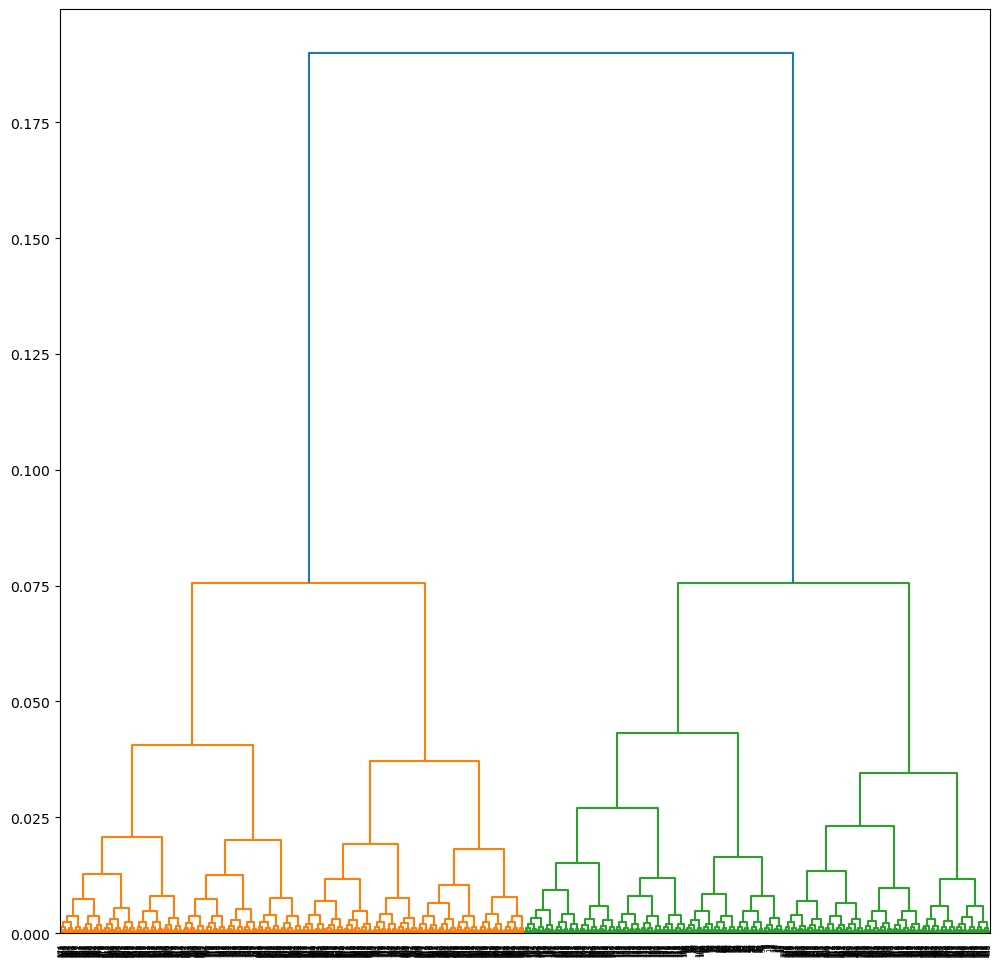

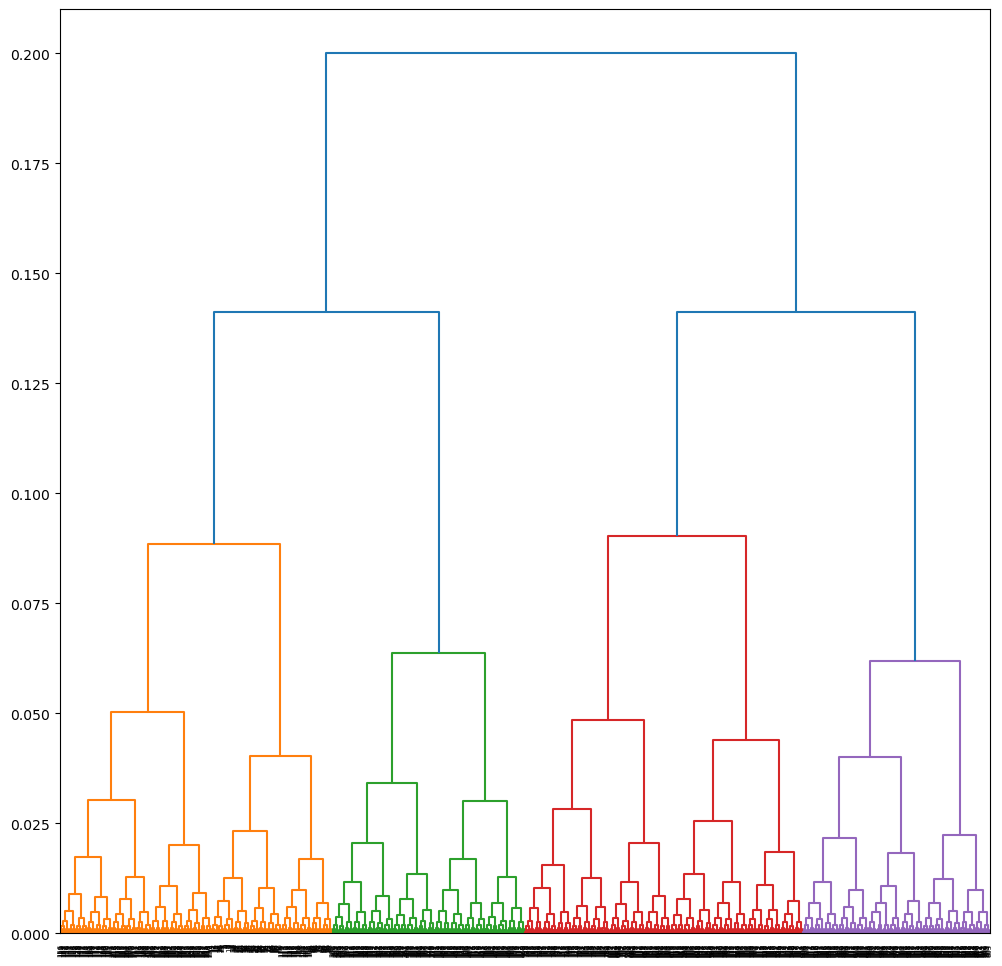

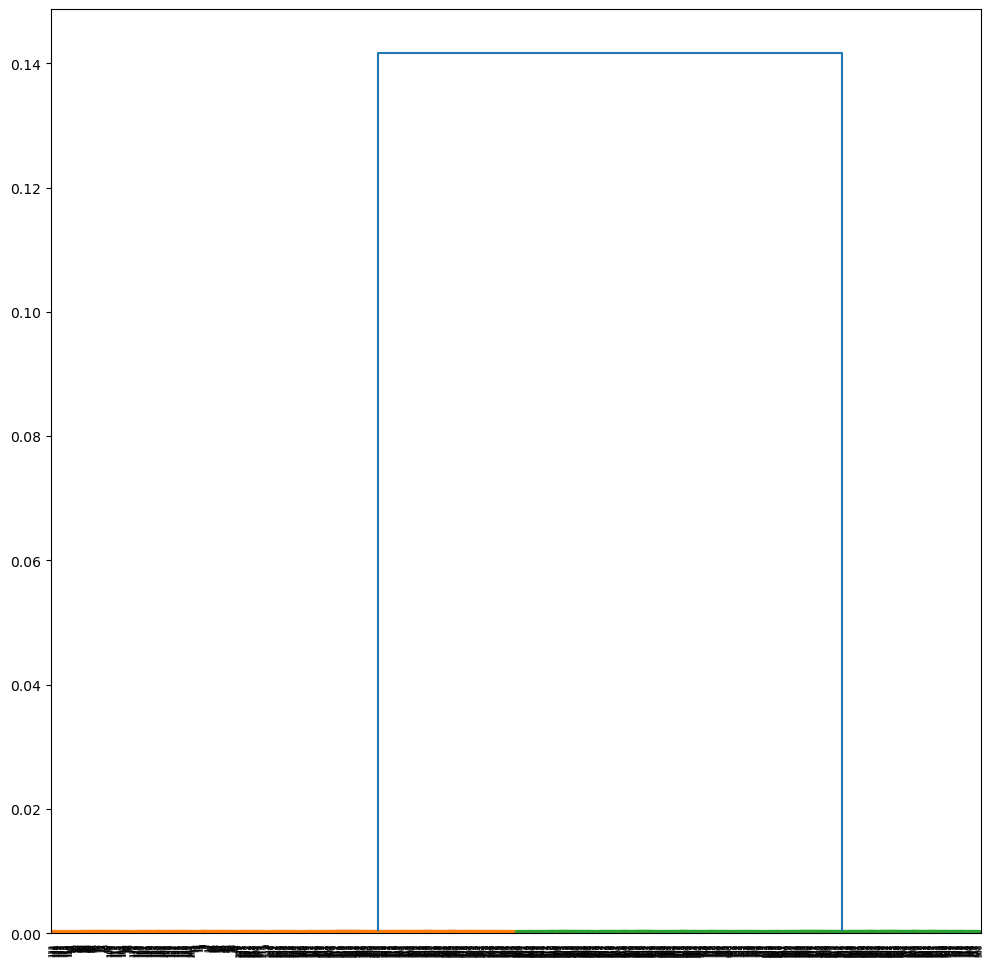

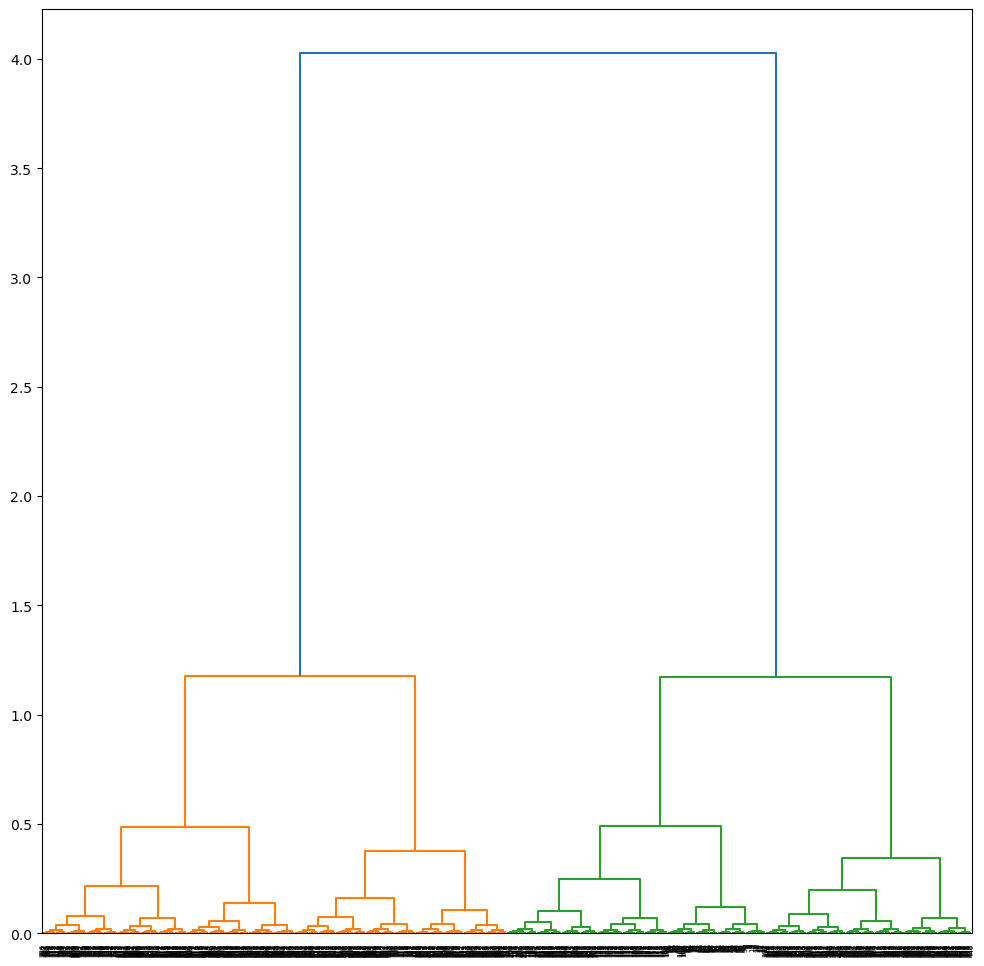

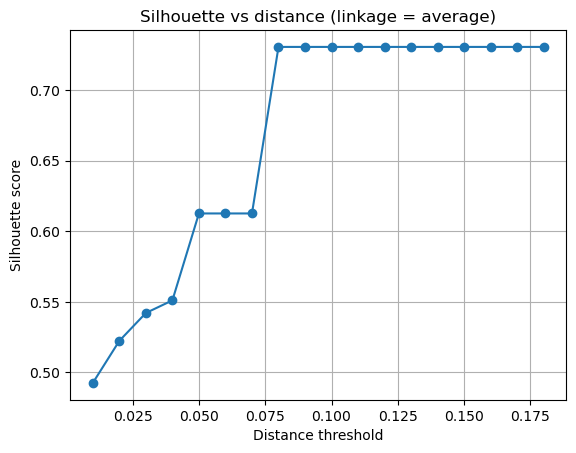

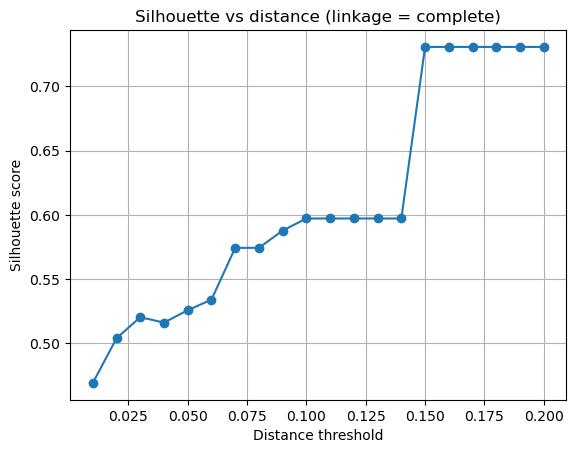

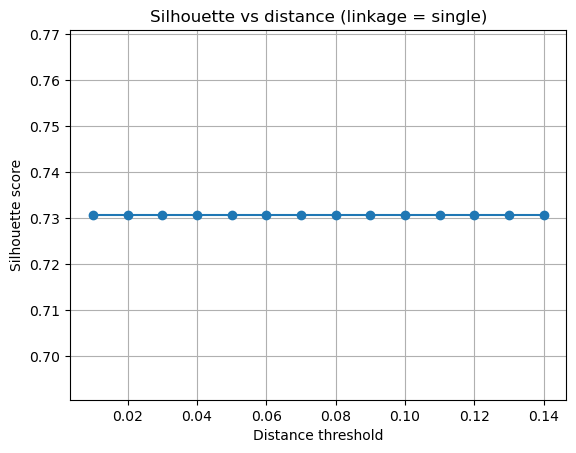

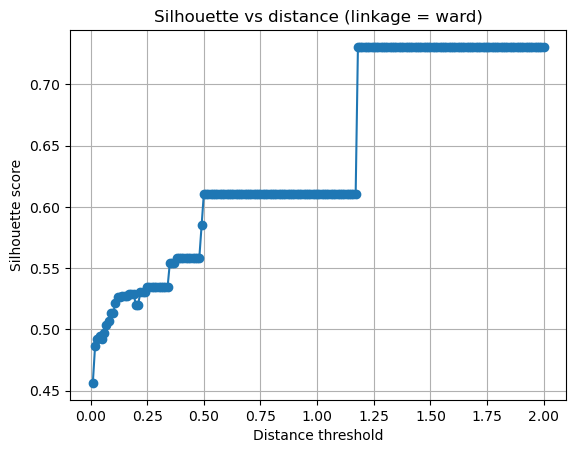

Best Silhouette result clustering. Using distance:  0.01  And using linkage:  single


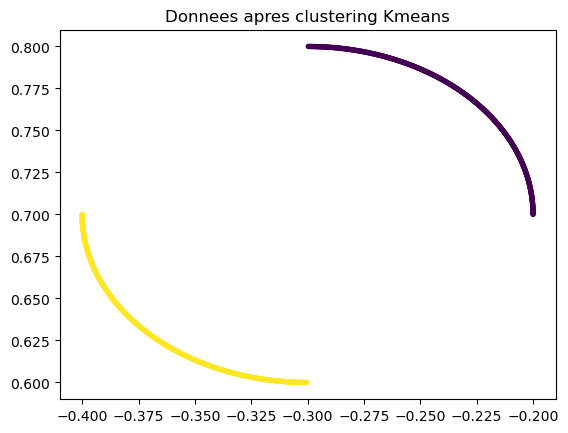

nb clusters = 4 runtime = 4.14  ms


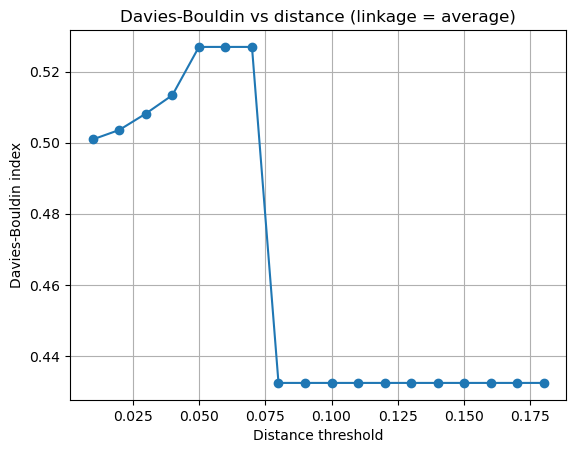

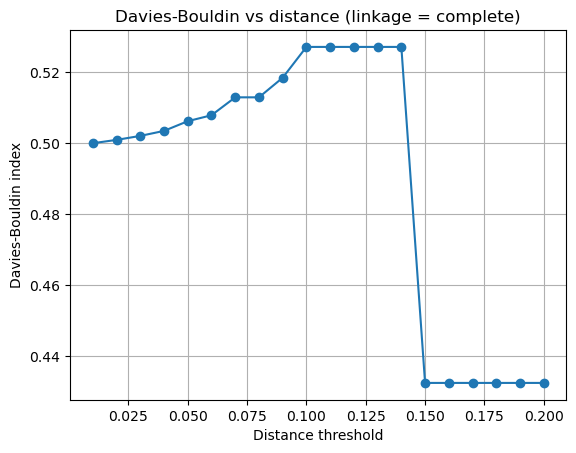

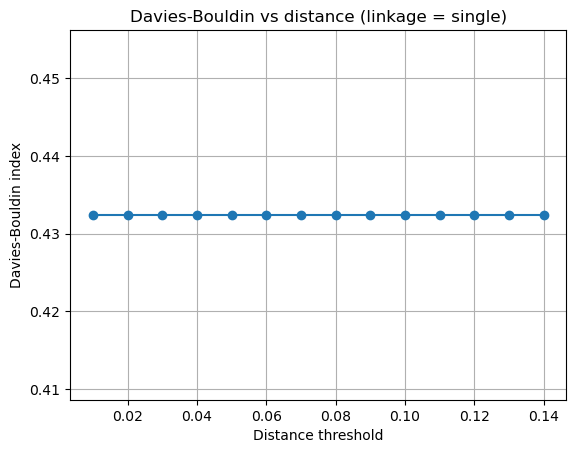

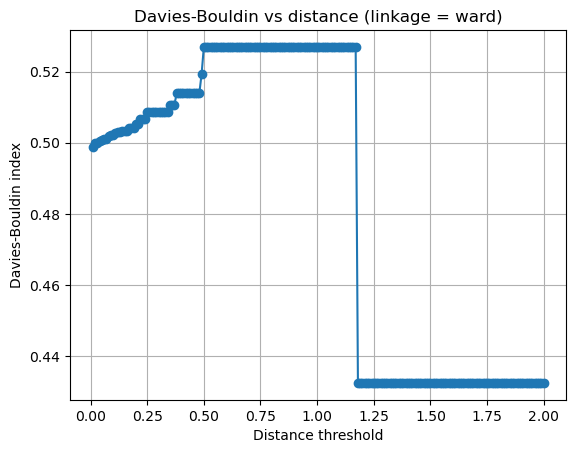

Best Davies-Bouldin result clustering. Using distance:  0.01  And using linkage:  single


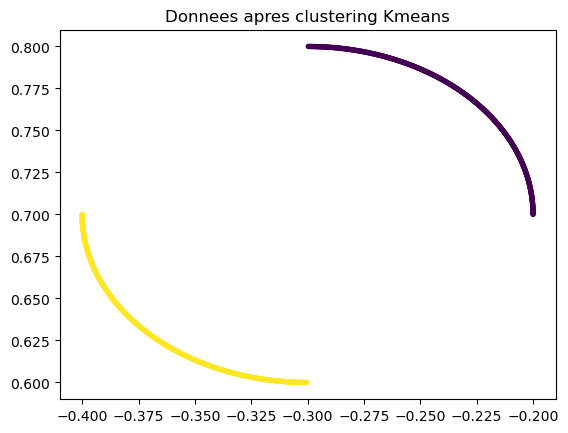

nb clusters = 4 runtime = 5.67  ms


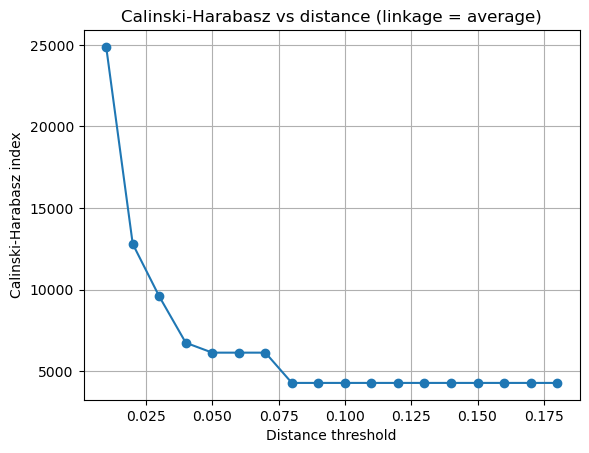

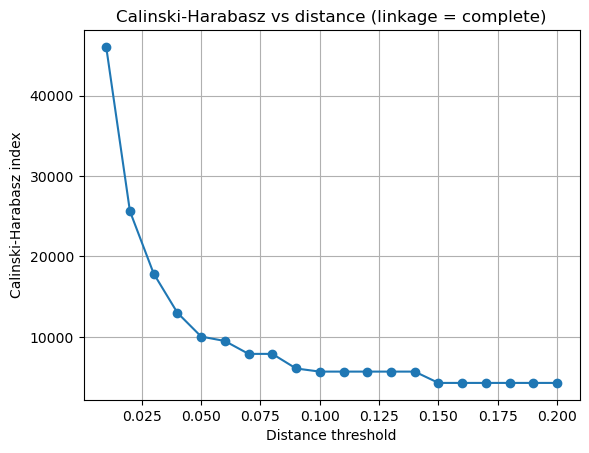

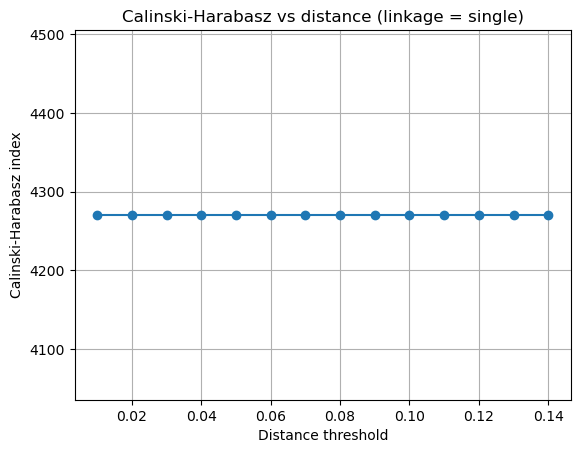

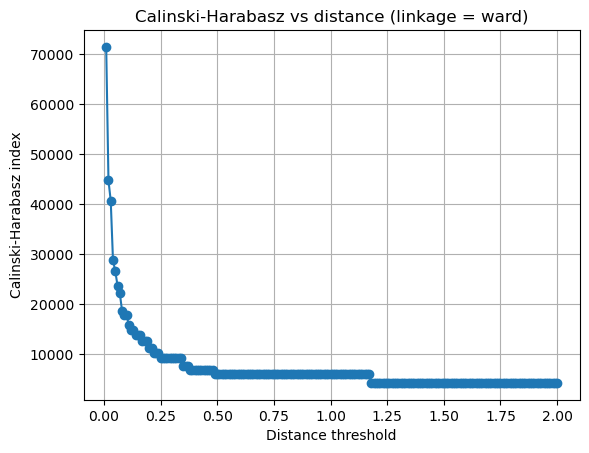

Best Calinski-Harabasz result clustering. Using distance:  0.01  And using linkage:  ward


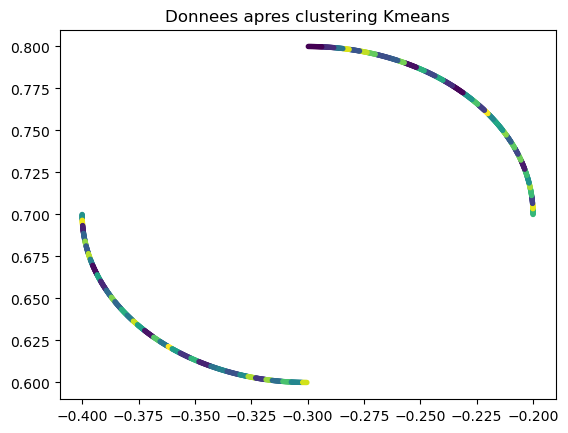

nb clusters = 4 runtime = 9.73  ms
ANALYSE POUR DATASET: dartboard1.arff


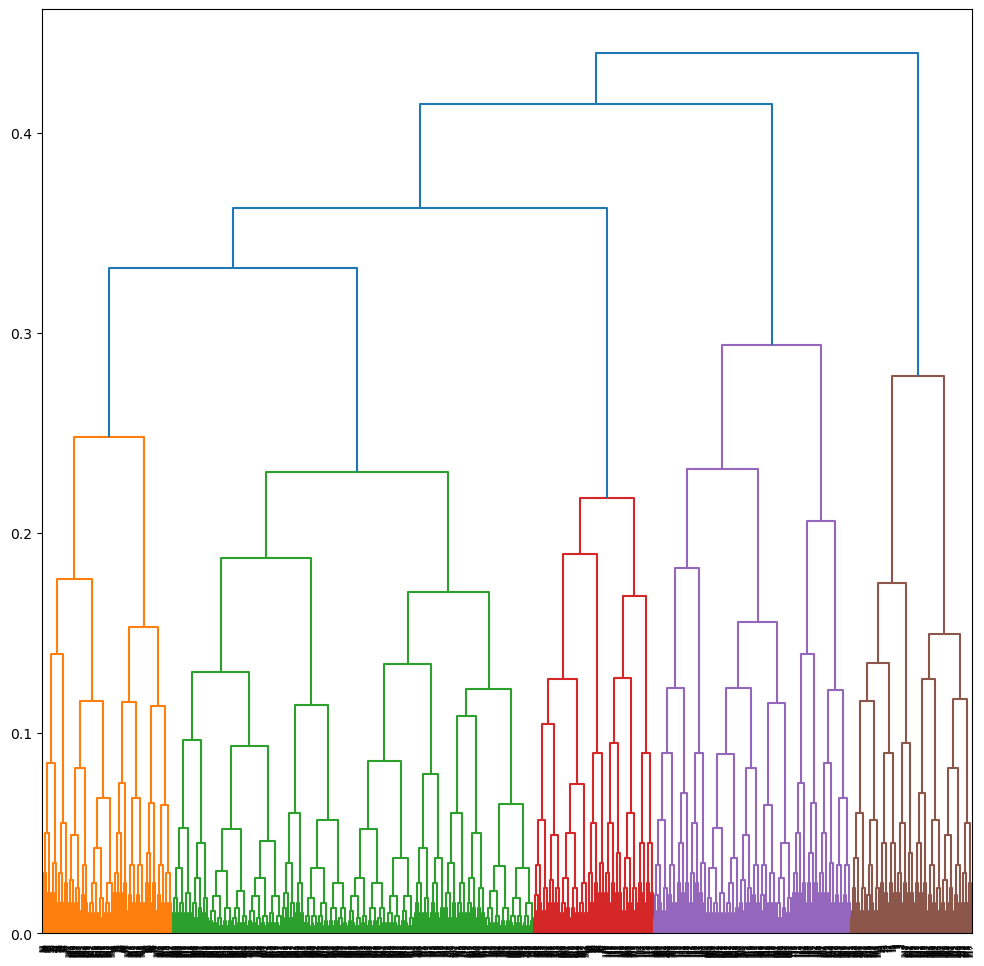

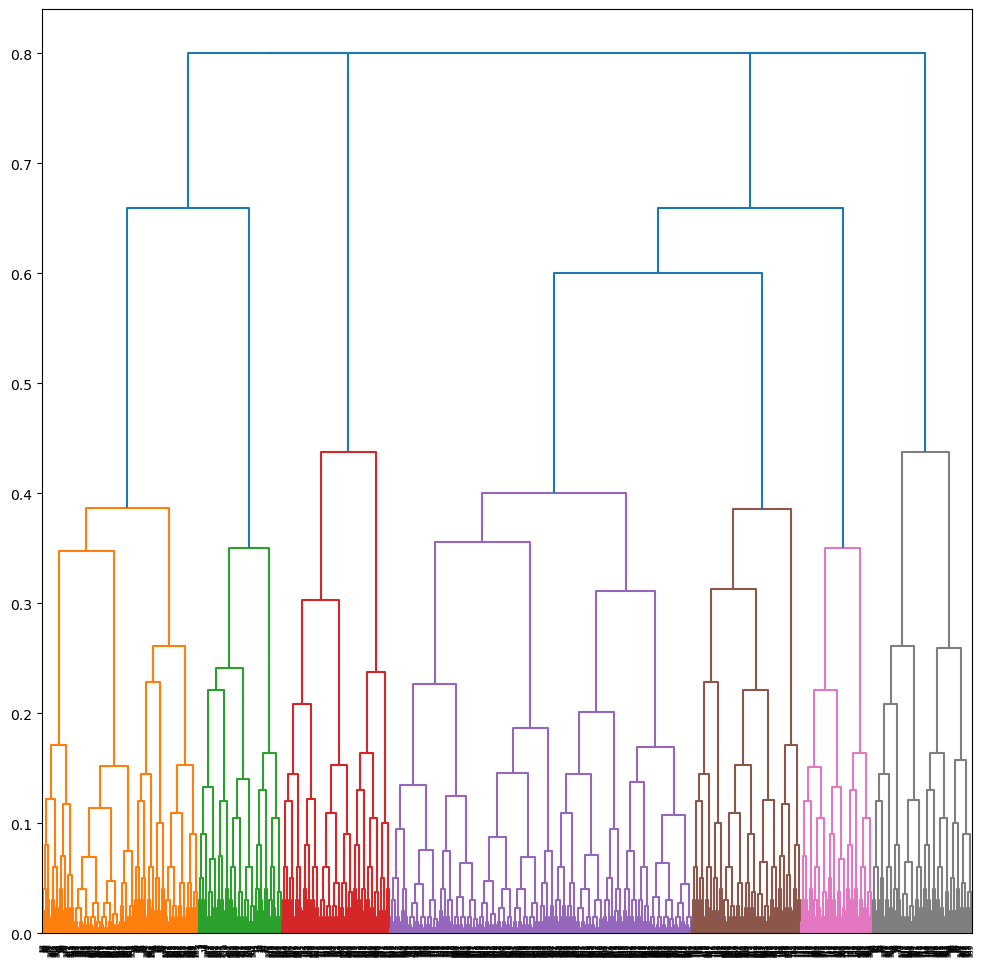

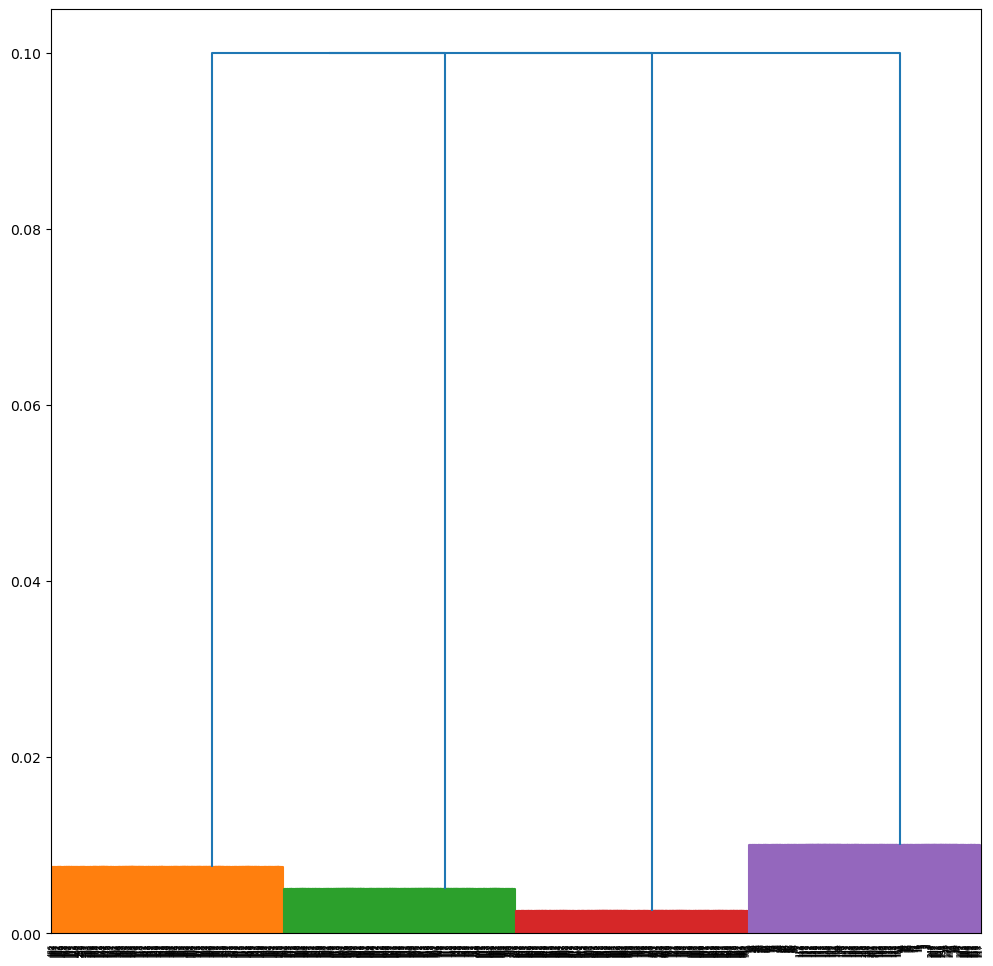

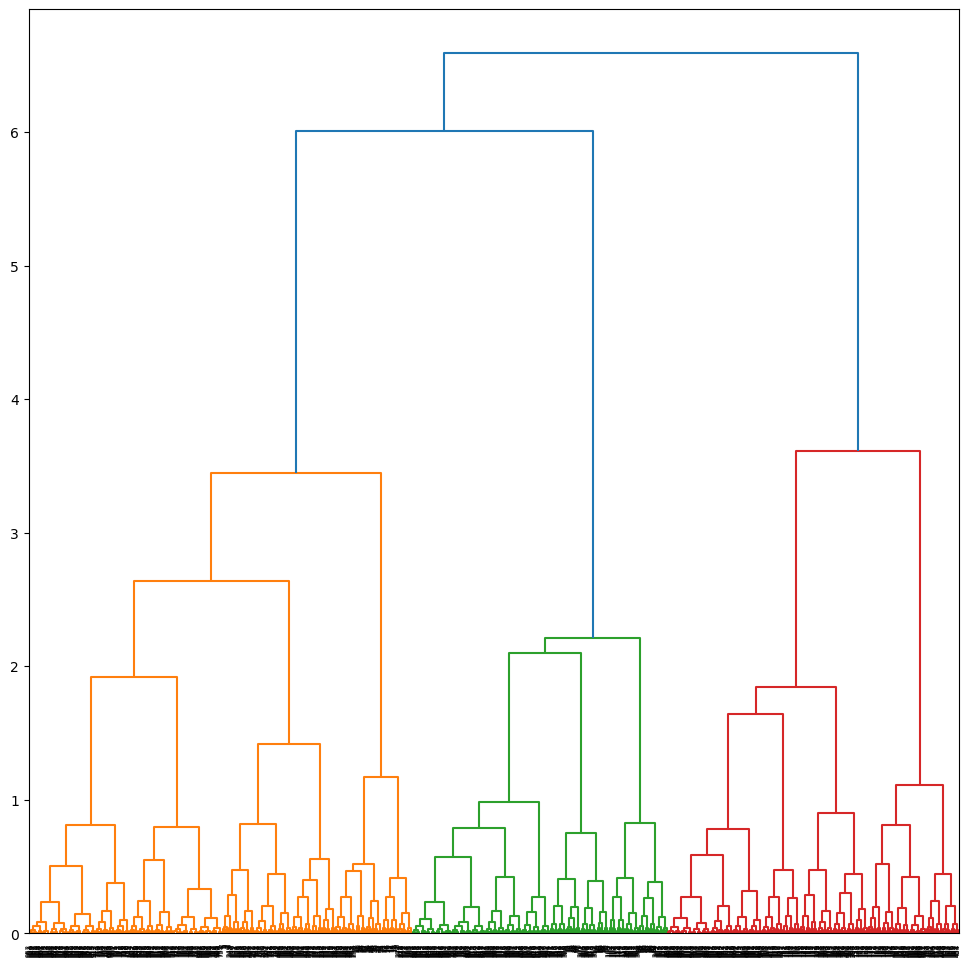

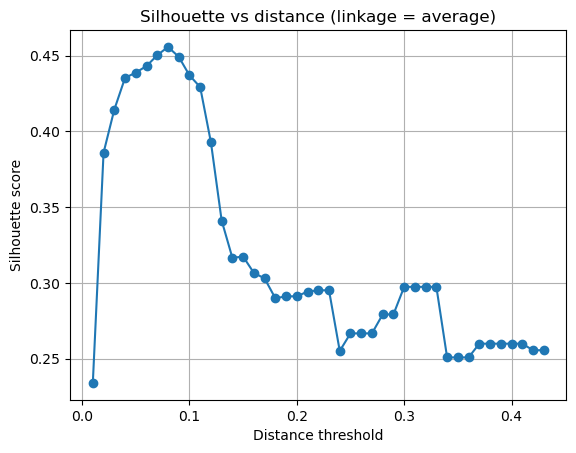

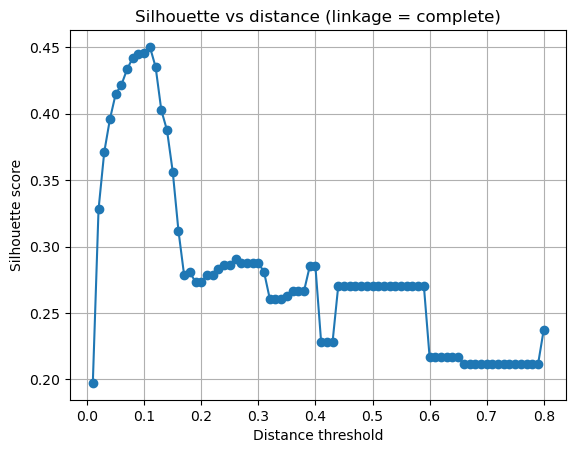

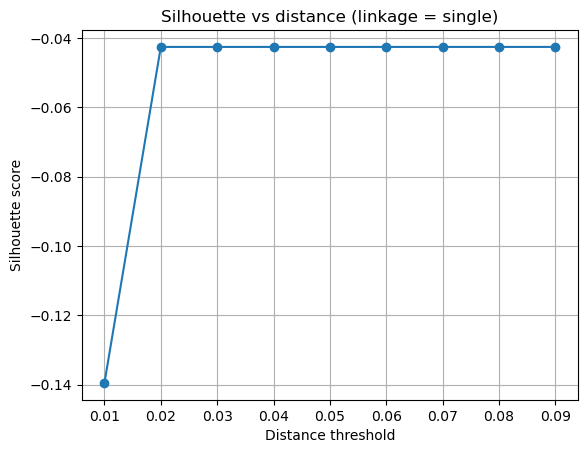

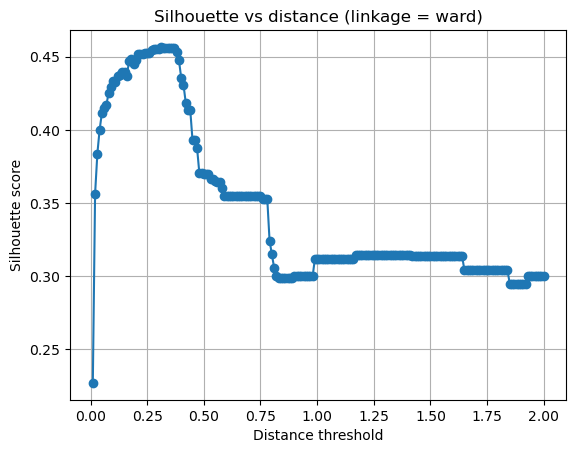

Best Silhouette result clustering. Using distance:  0.31  And using linkage:  ward


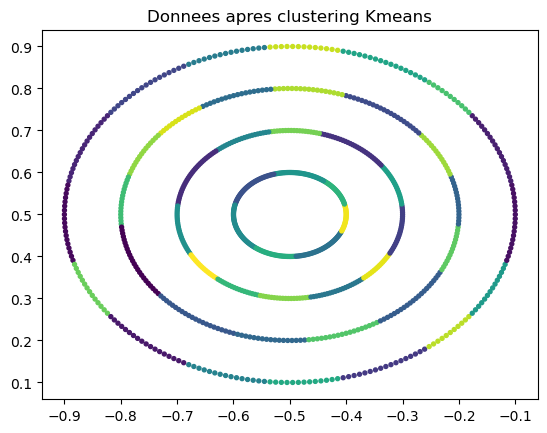

nb clusters = 4 runtime = 9.81  ms


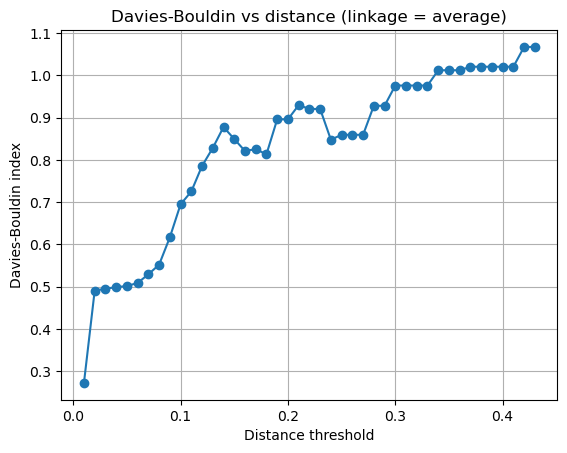

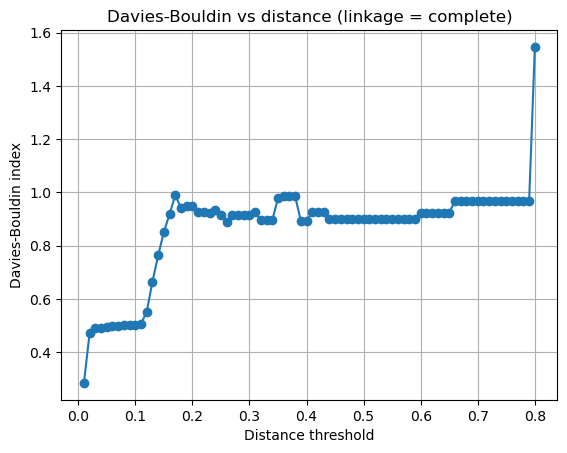

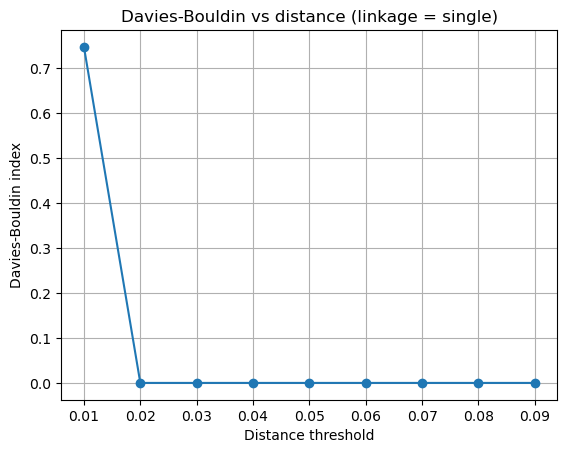

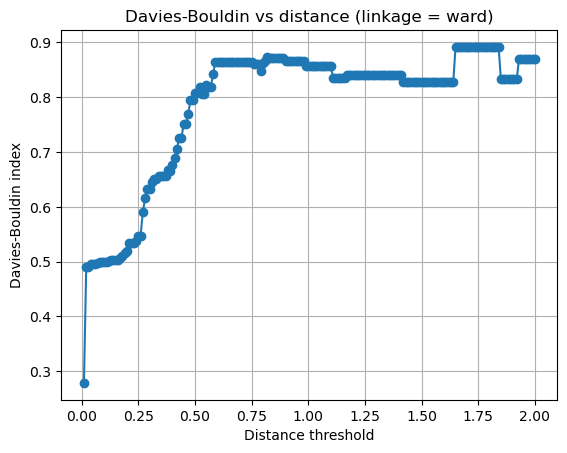

Best Davies-Bouldin result clustering. Using distance:  0.02  And using linkage:  single


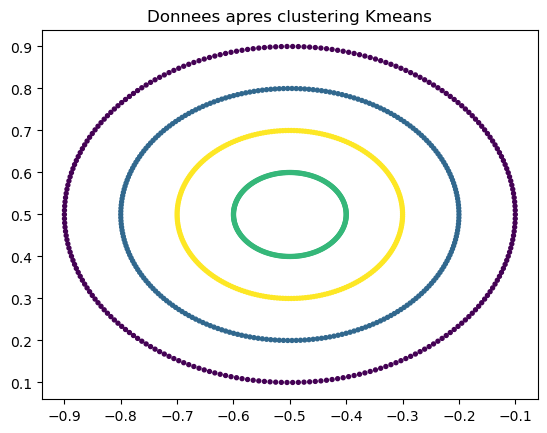

nb clusters = 4 runtime = 4.08  ms


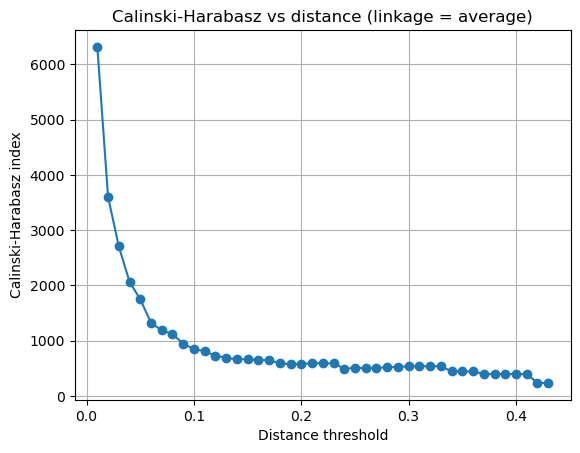

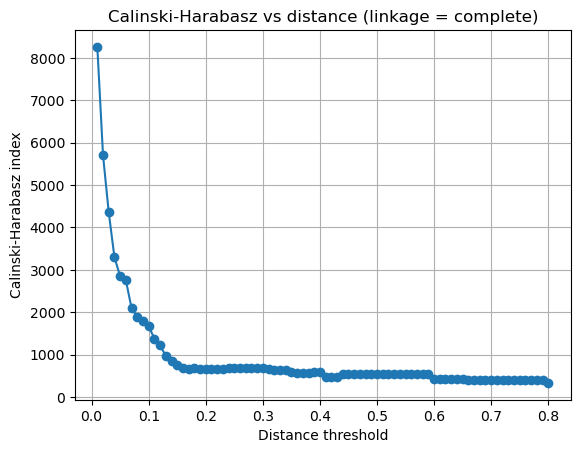

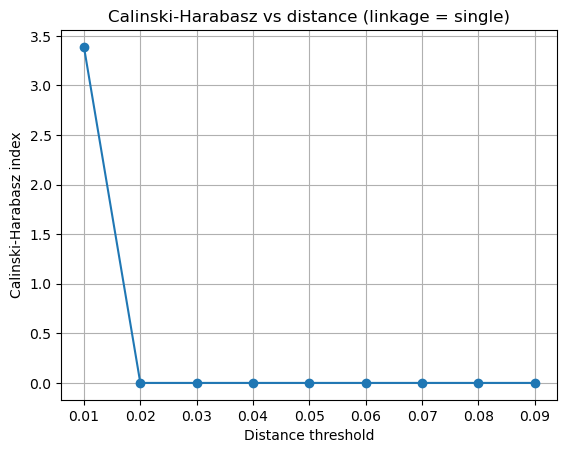

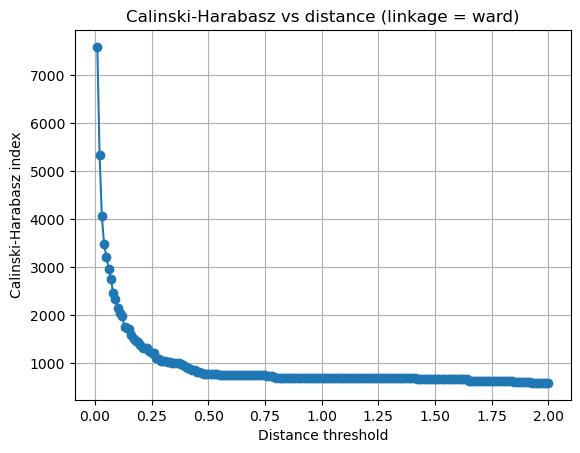

Best Calinski-Harabasz result clustering. Using distance:  0.01  And using linkage:  complete


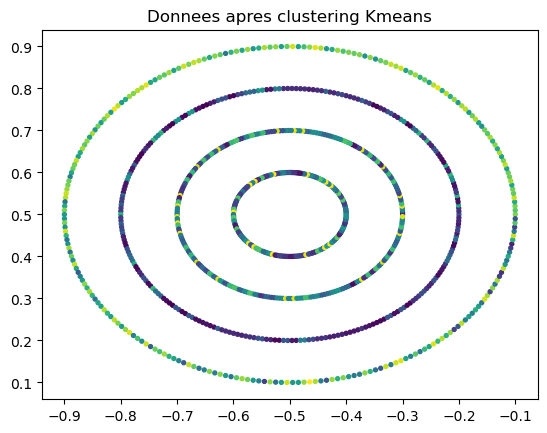

nb clusters = 4 runtime = 9.77  ms


In [52]:
########JEUX DE DONNEES FACILES POUR AGGLOMERATIVE EN DISTANCE

dist_range = np.arange(0.01, 2.01, 0.01)
datasets = ["curves1.arff", "dartboard1.arff"]
linkages = ["single", "average", "complete", "ward"]
for name in datasets:
    print("ANALYSE POUR DATASET: " + name)
    data = load_arff_2d(name)
    results = evaluate_agglomerative_distance(data, dist_range, linkages)
    show_results_agglo_distance(data, results)

ANALYSE POUR DATASET: compound.arff


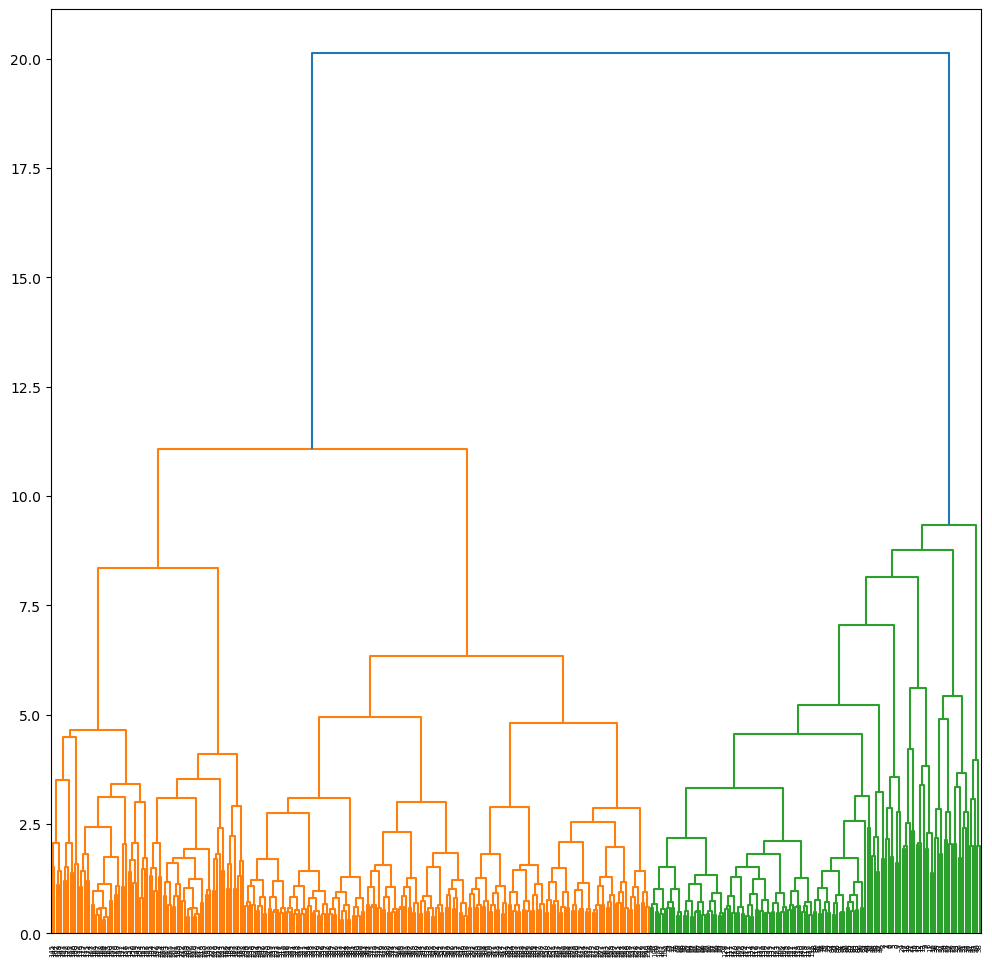

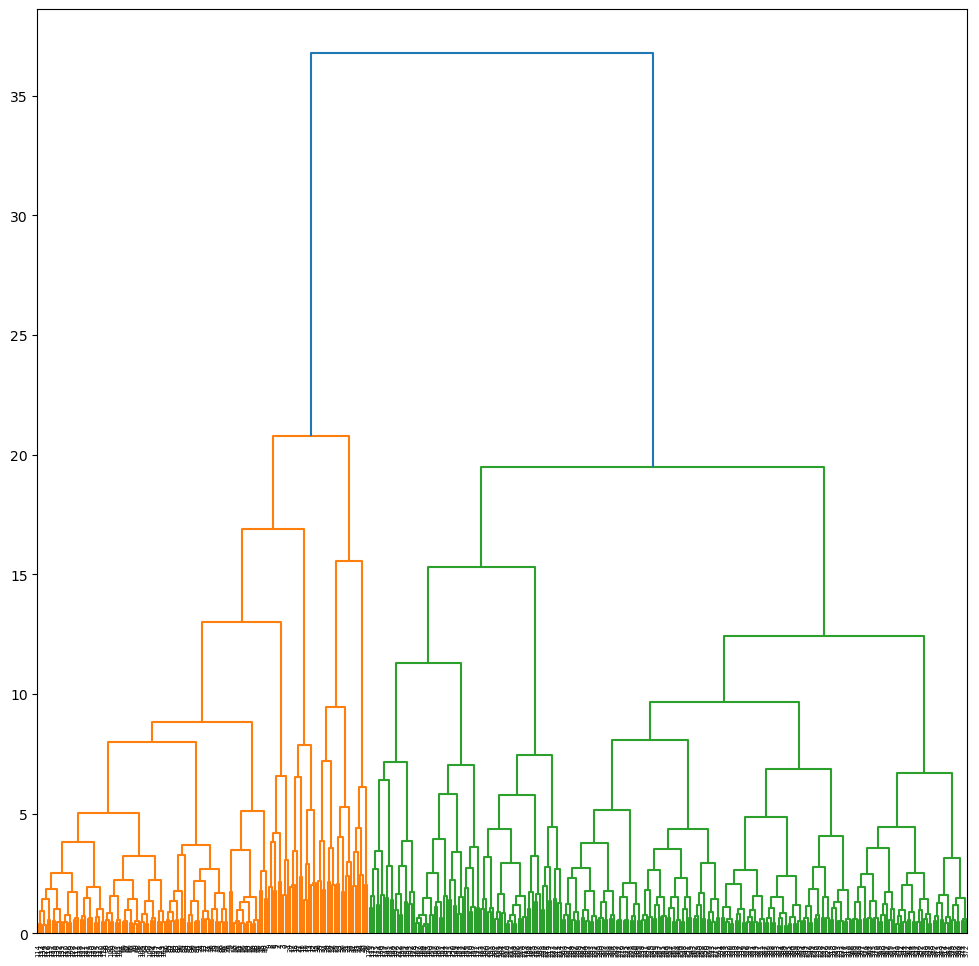

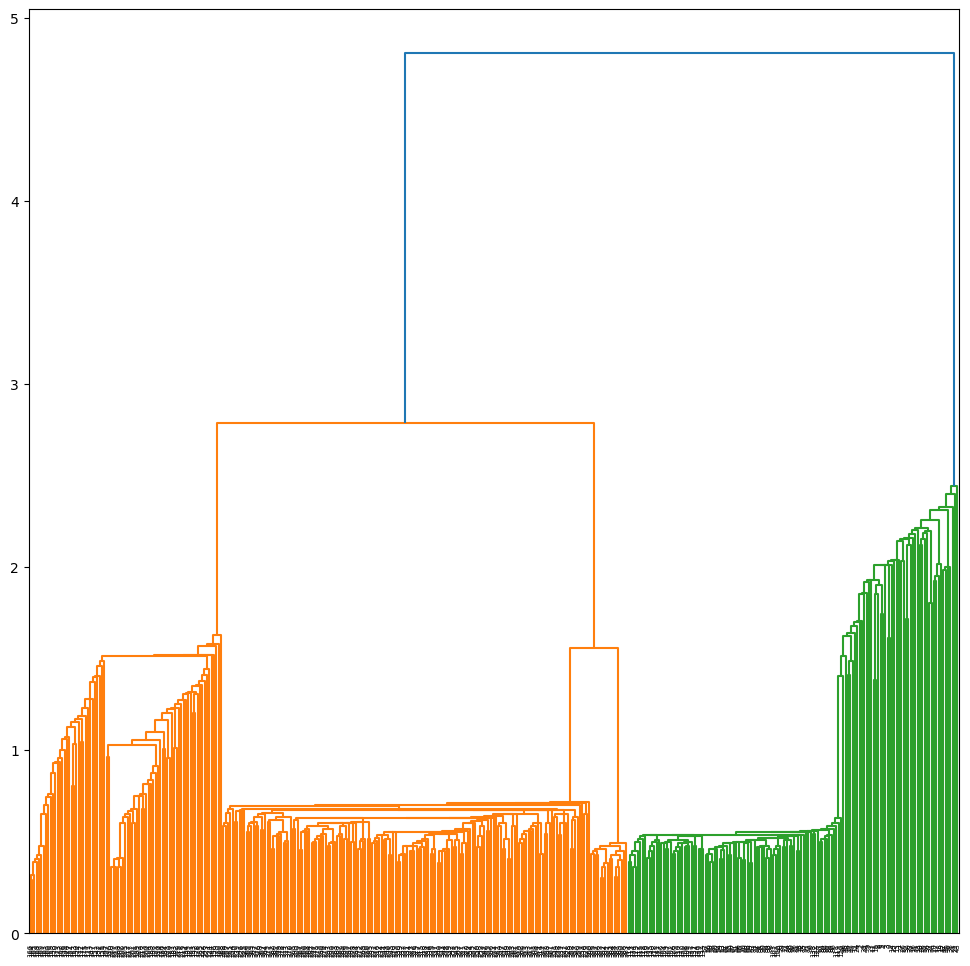

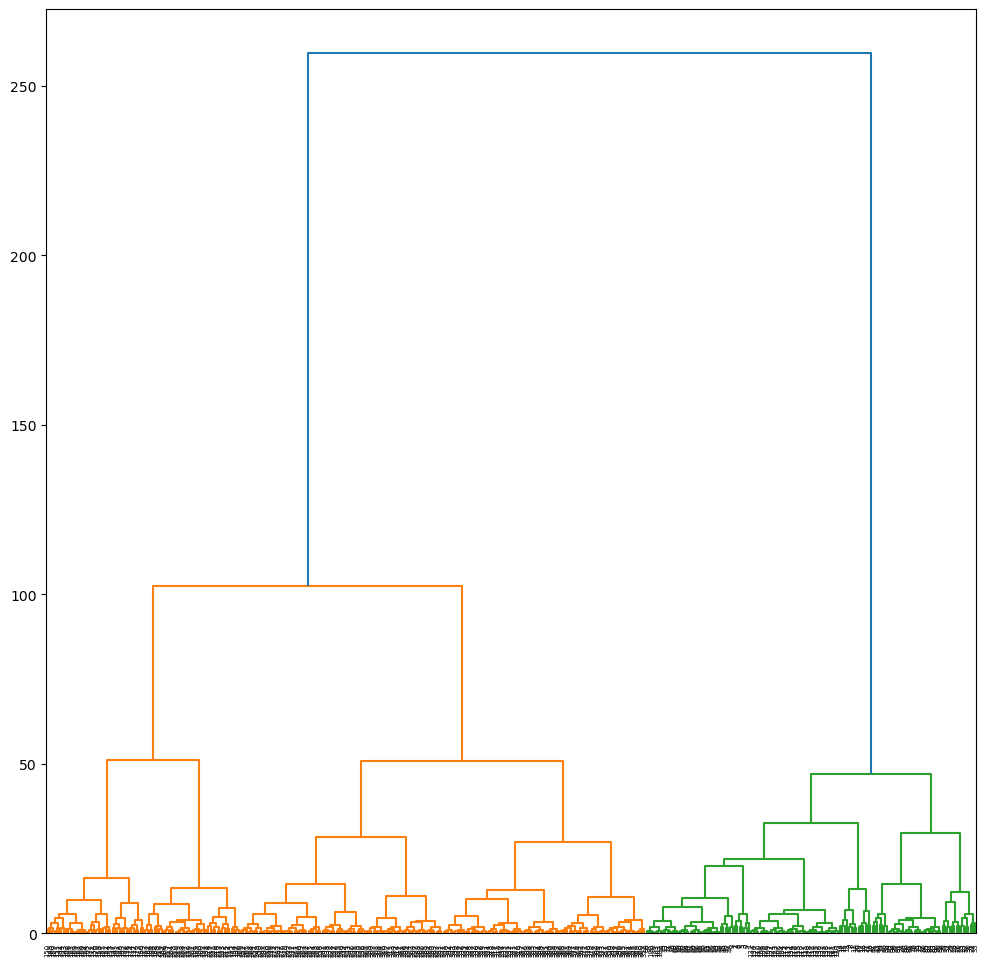

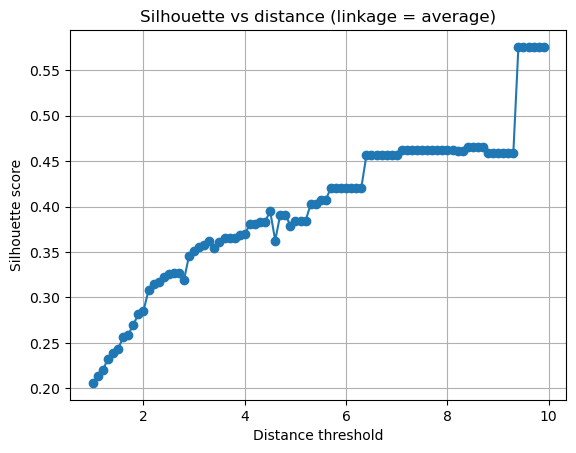

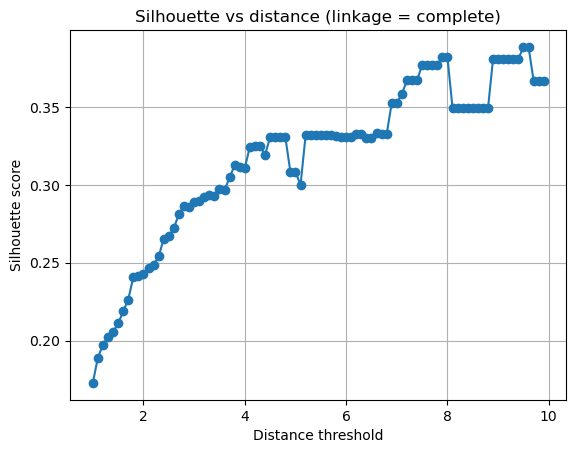

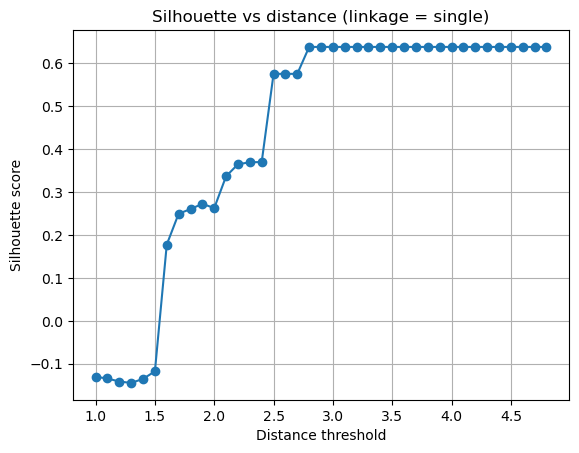

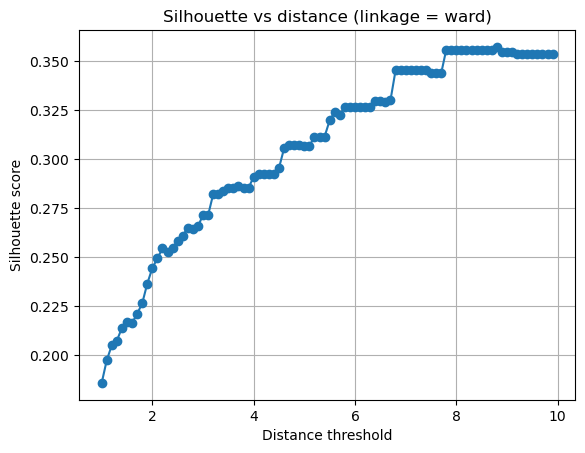

Best Silhouette result clustering. Using distance:  2.8000000000000016  And using linkage:  single


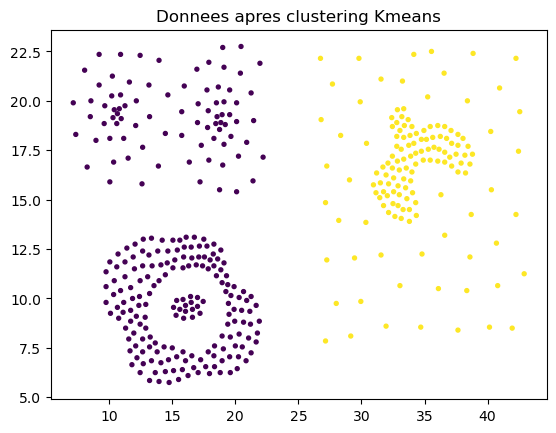

nb clusters = 4 runtime = 1.23  ms


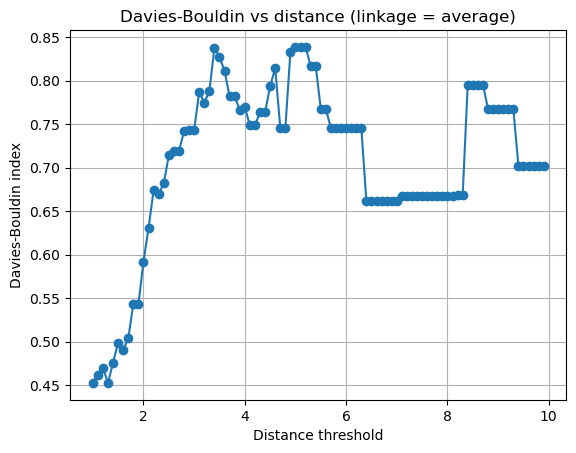

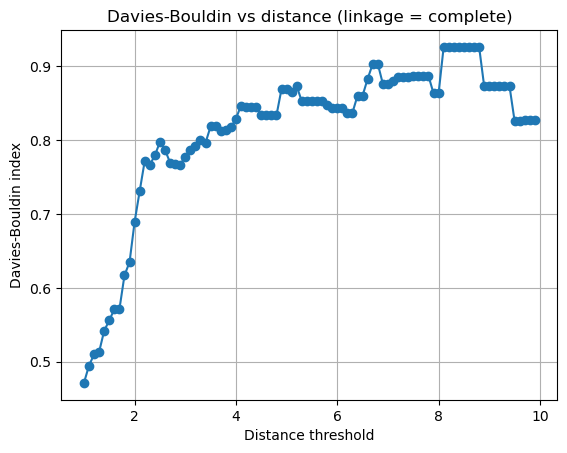

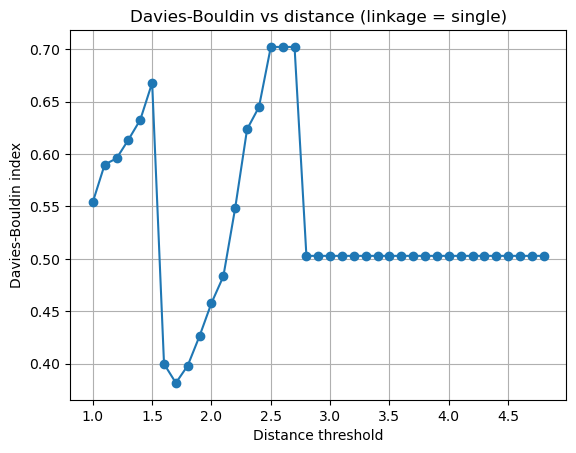

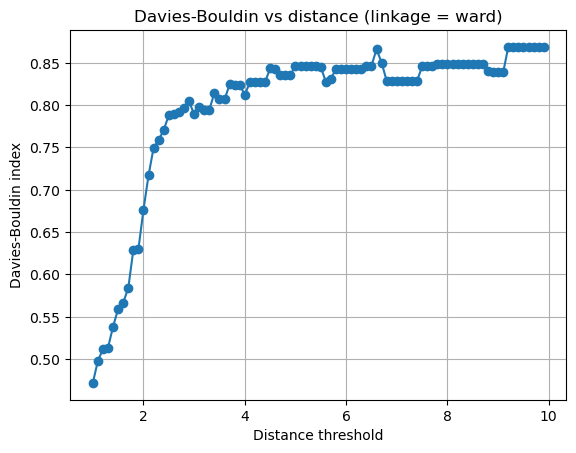

Best Davies-Bouldin result clustering. Using distance:  1.7000000000000006  And using linkage:  single


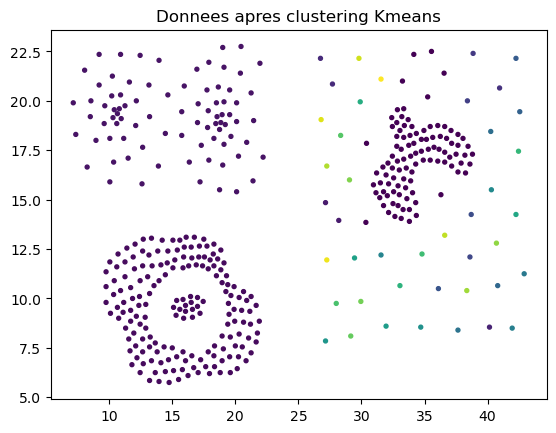

nb clusters = 4 runtime = 1.3  ms


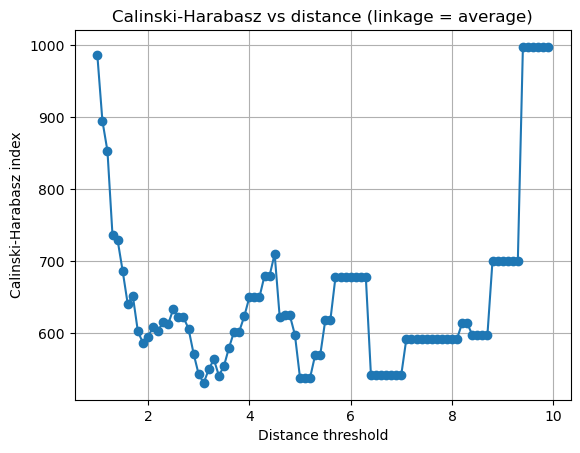

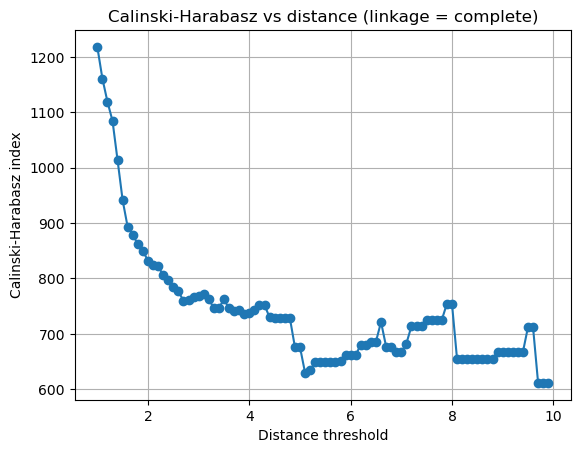

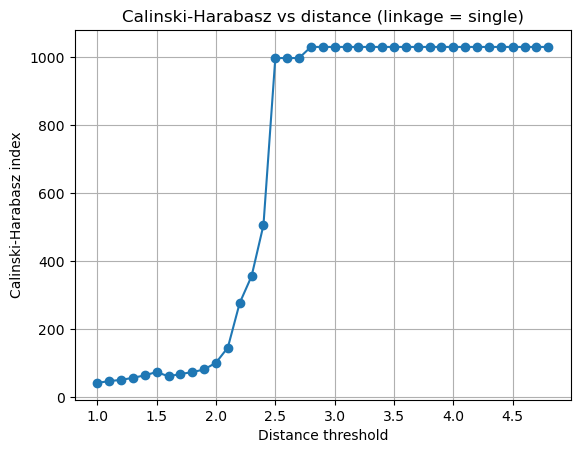

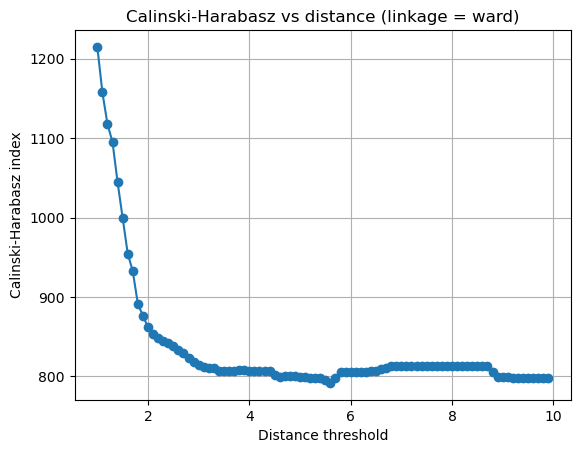

Best Calinski-Harabasz result clustering. Using distance:  1.0  And using linkage:  complete


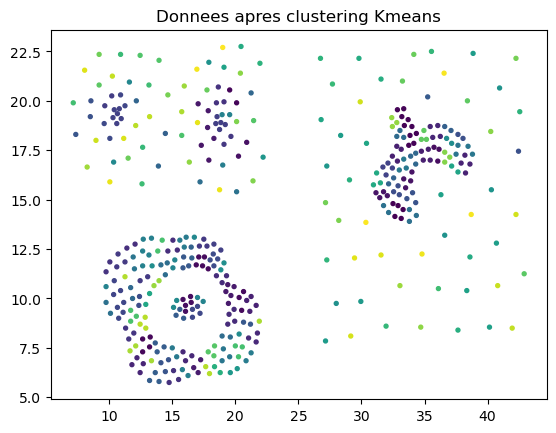

nb clusters = 4 runtime = 2.0  ms
ANALYSE POUR DATASET: square5.arff


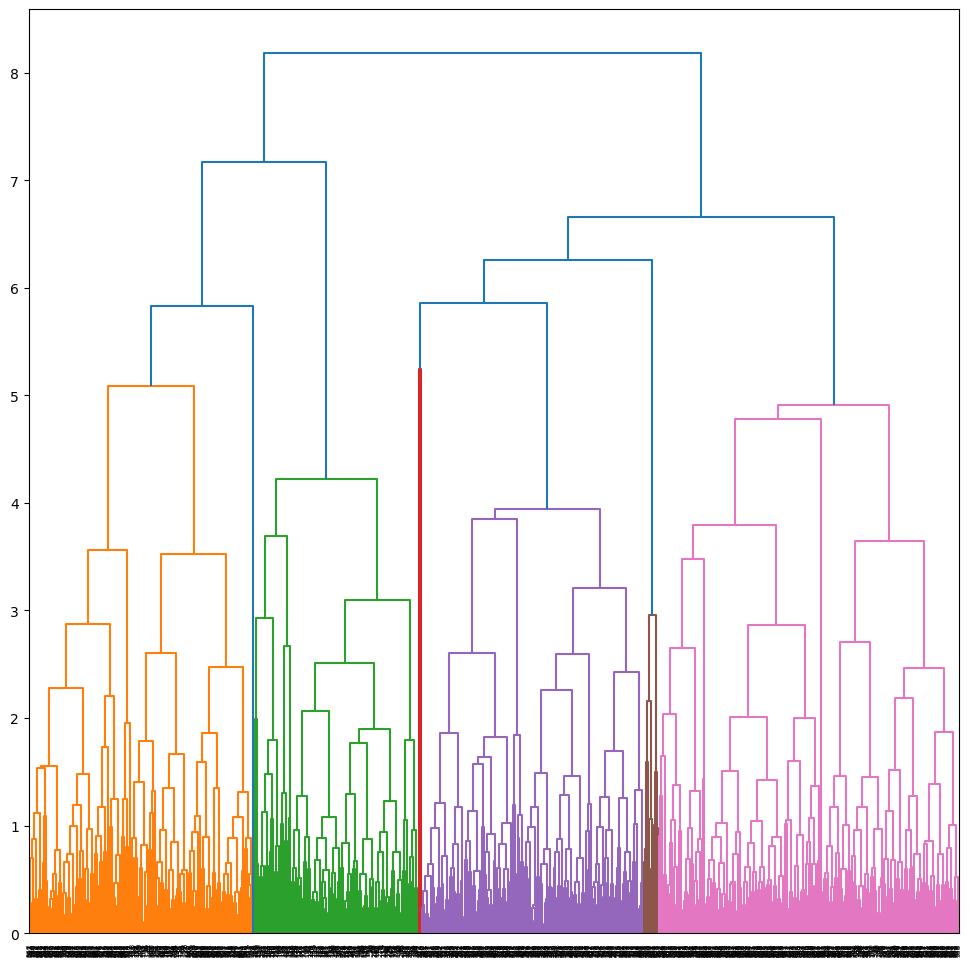

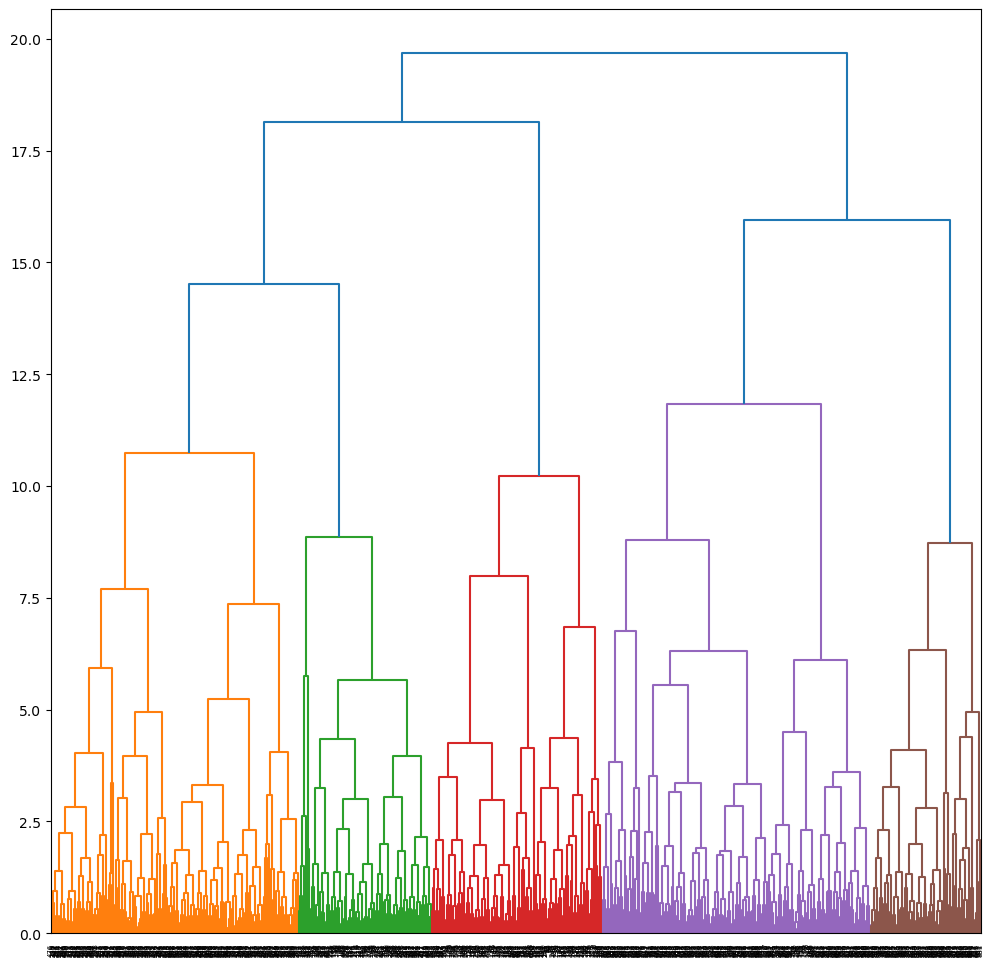

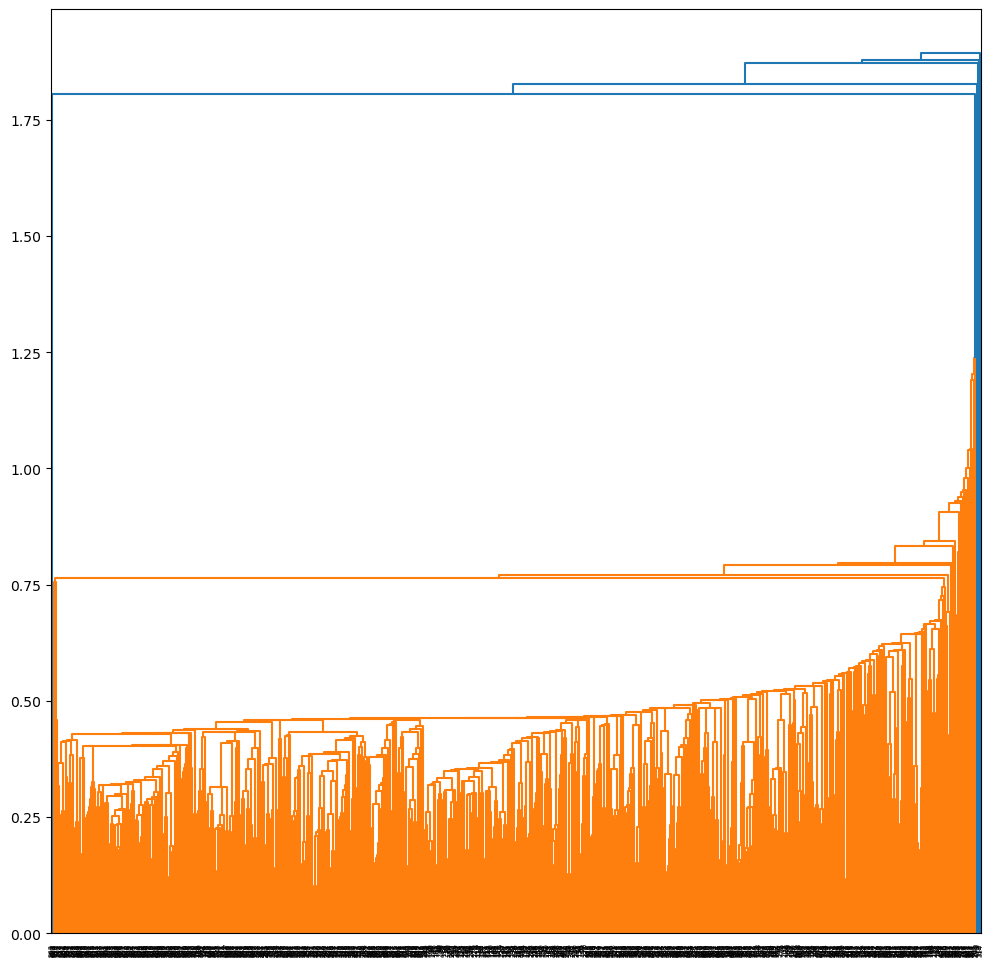

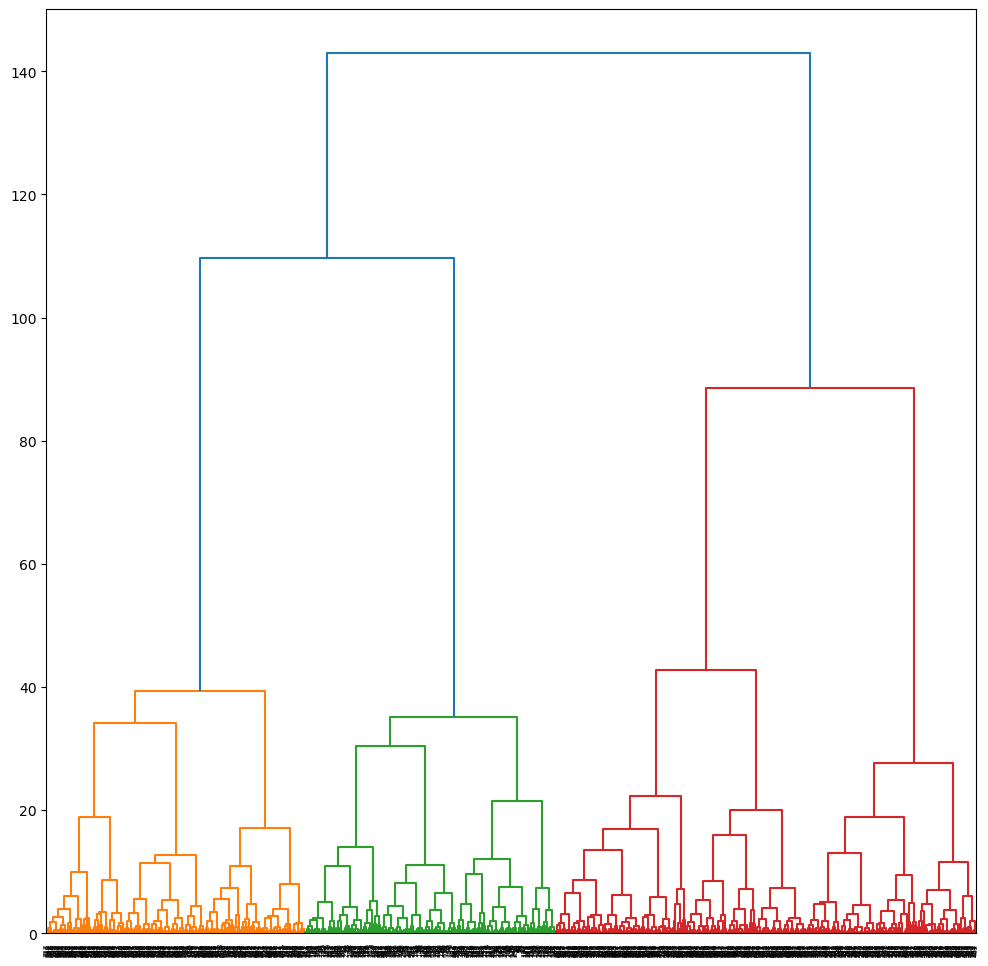

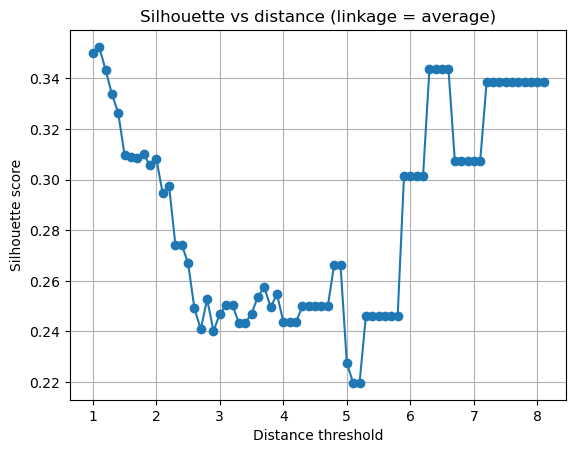

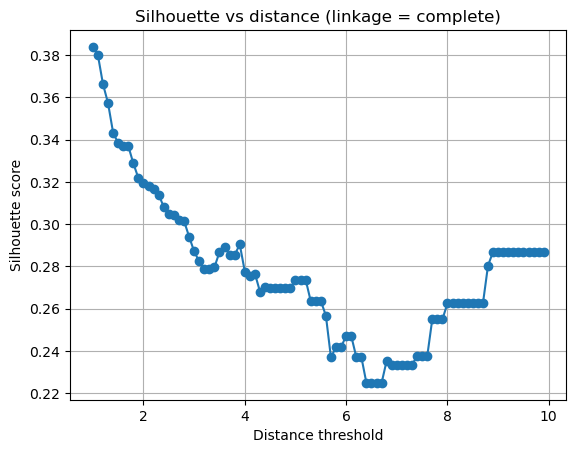

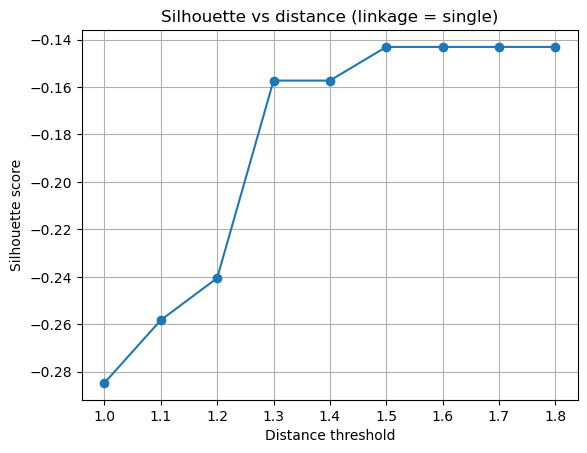

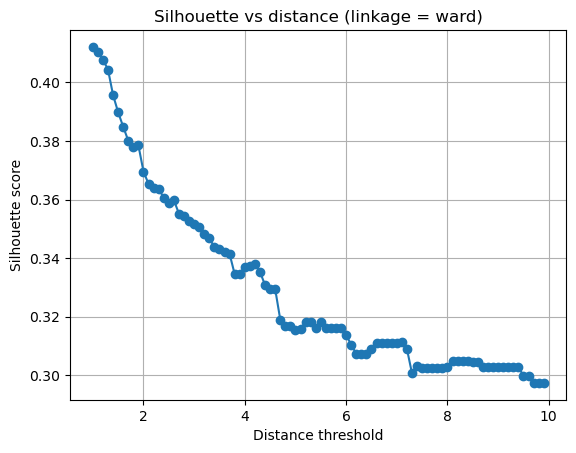

Best Silhouette result clustering. Using distance:  1.0  And using linkage:  ward


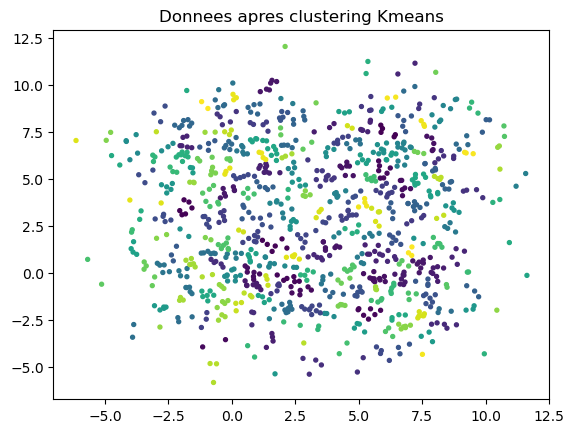

nb clusters = 4 runtime = 10.35  ms


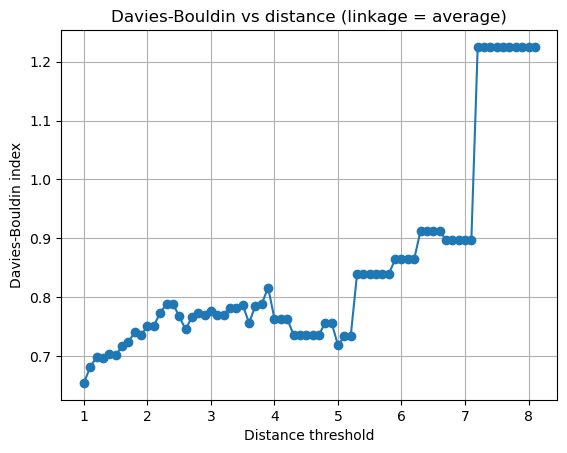

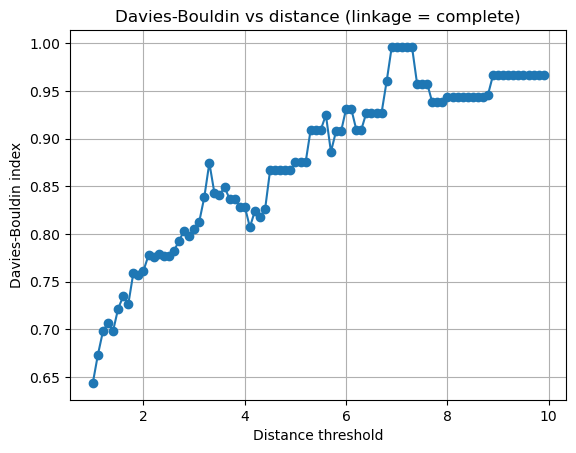

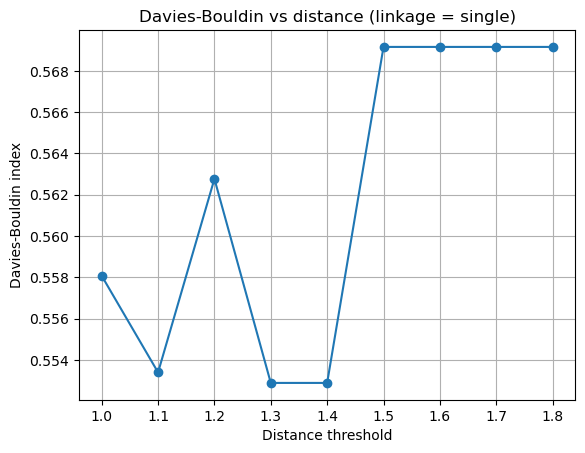

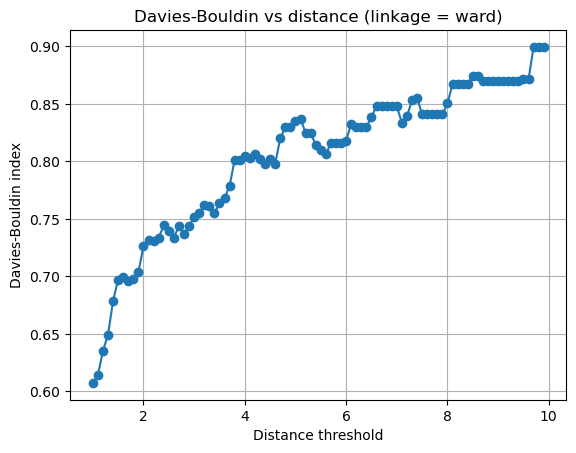

Best Davies-Bouldin result clustering. Using distance:  1.3000000000000003  And using linkage:  single


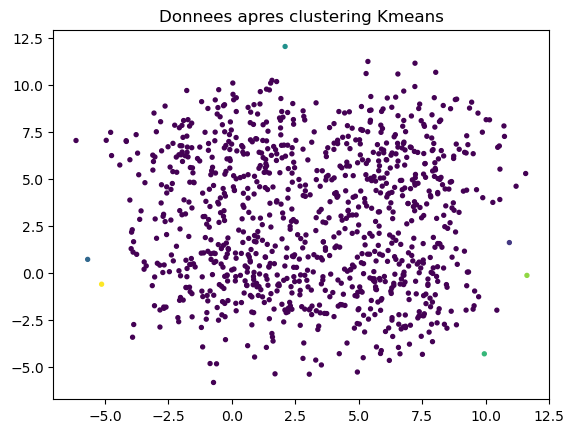

nb clusters = 4 runtime = 4.89  ms


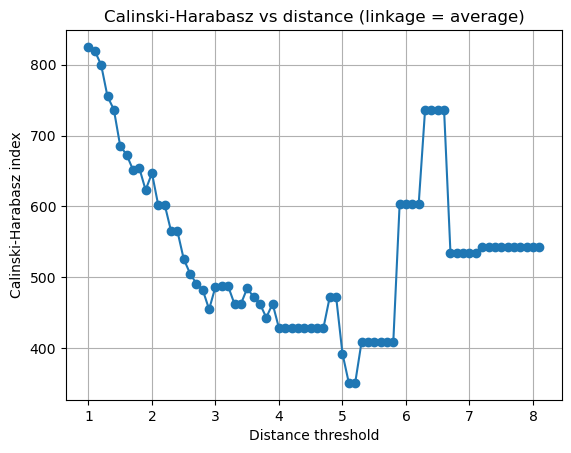

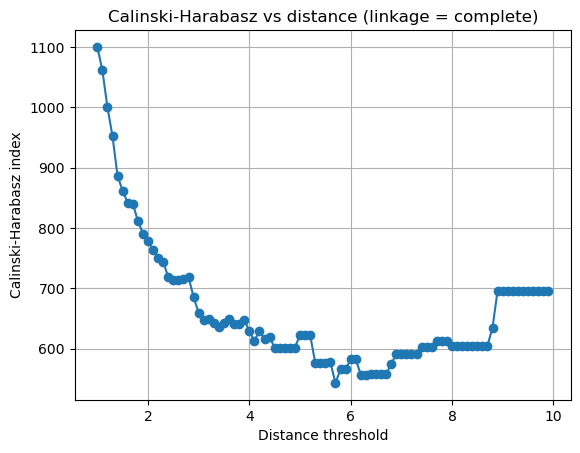

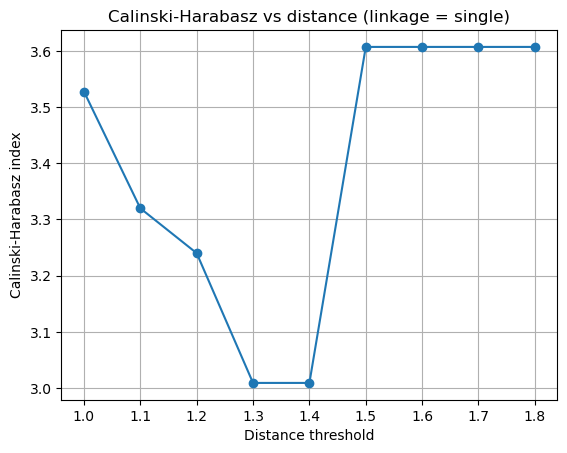

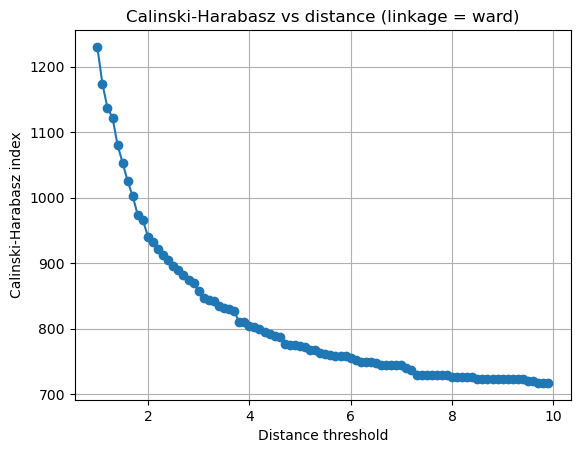

Best Calinski-Harabasz result clustering. Using distance:  1.0  And using linkage:  ward


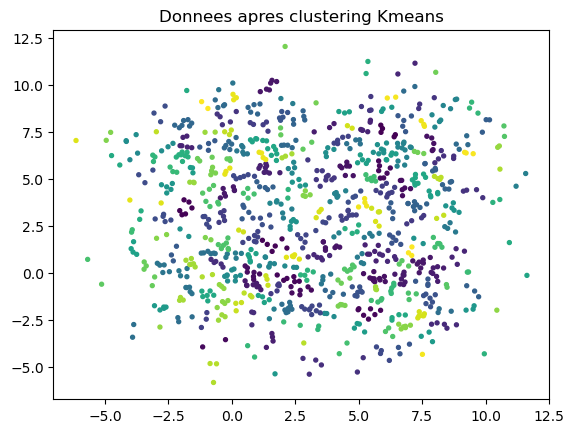

nb clusters = 4 runtime = 10.26  ms


In [56]:
########JEUX DE DONNEES DIFFICILES POUR AGGLOMERATIVE EN DISTANCE

dist_range = np.arange(1, 10, 0.1)
datasets = ["compound.arff", "square5.arff"]
linkages = ["single", "average", "complete", "ward"]
for name in datasets:
    print("ANALYSE POUR DATASET: " + name)
    data = load_arff_2d(name)
    results = evaluate_agglomerative_distance(data, dist_range, linkages)
    show_results_agglo_distance(data, results)

ANALYSE POUR DATASET: curves1.arff


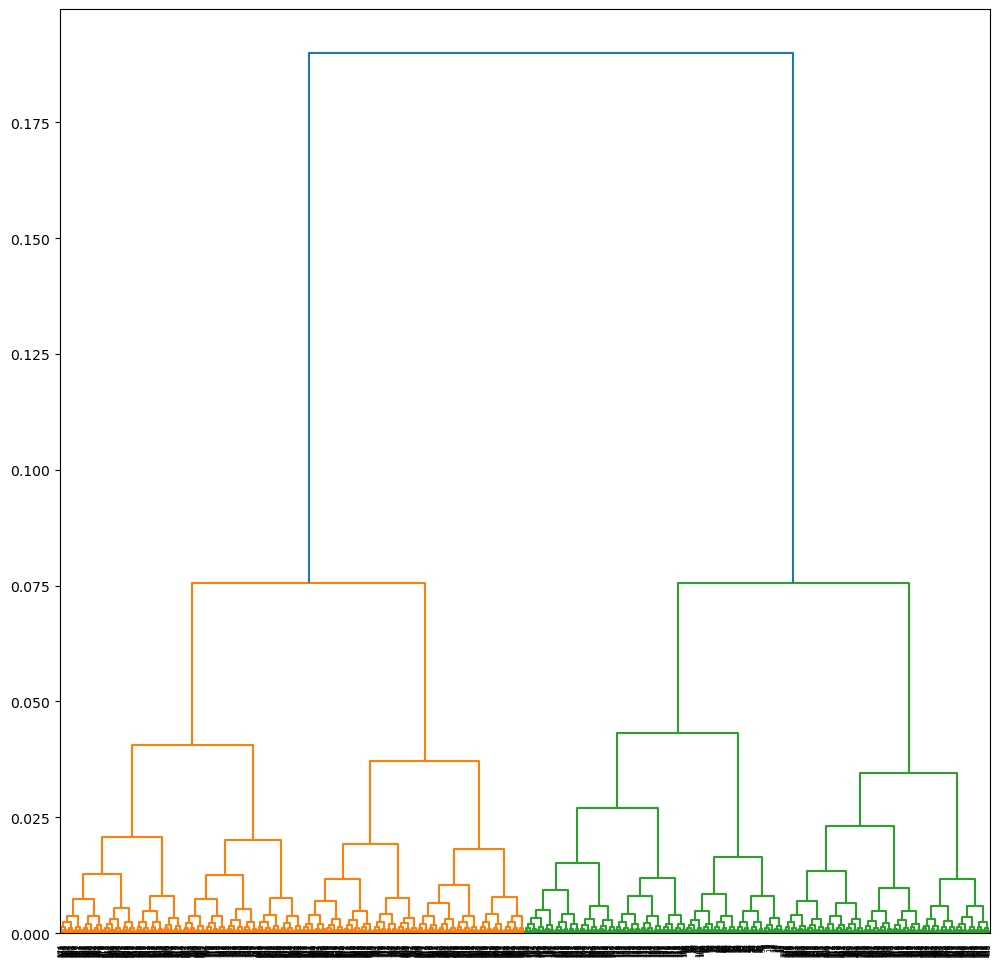

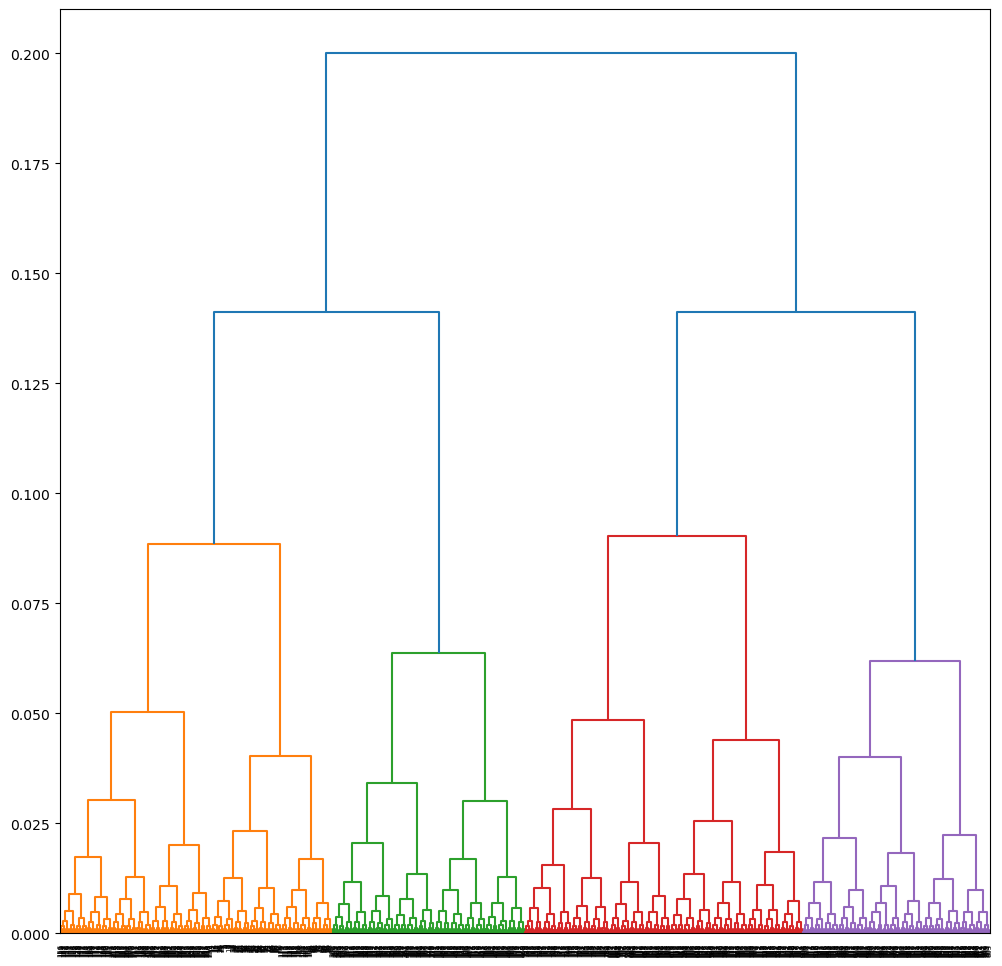

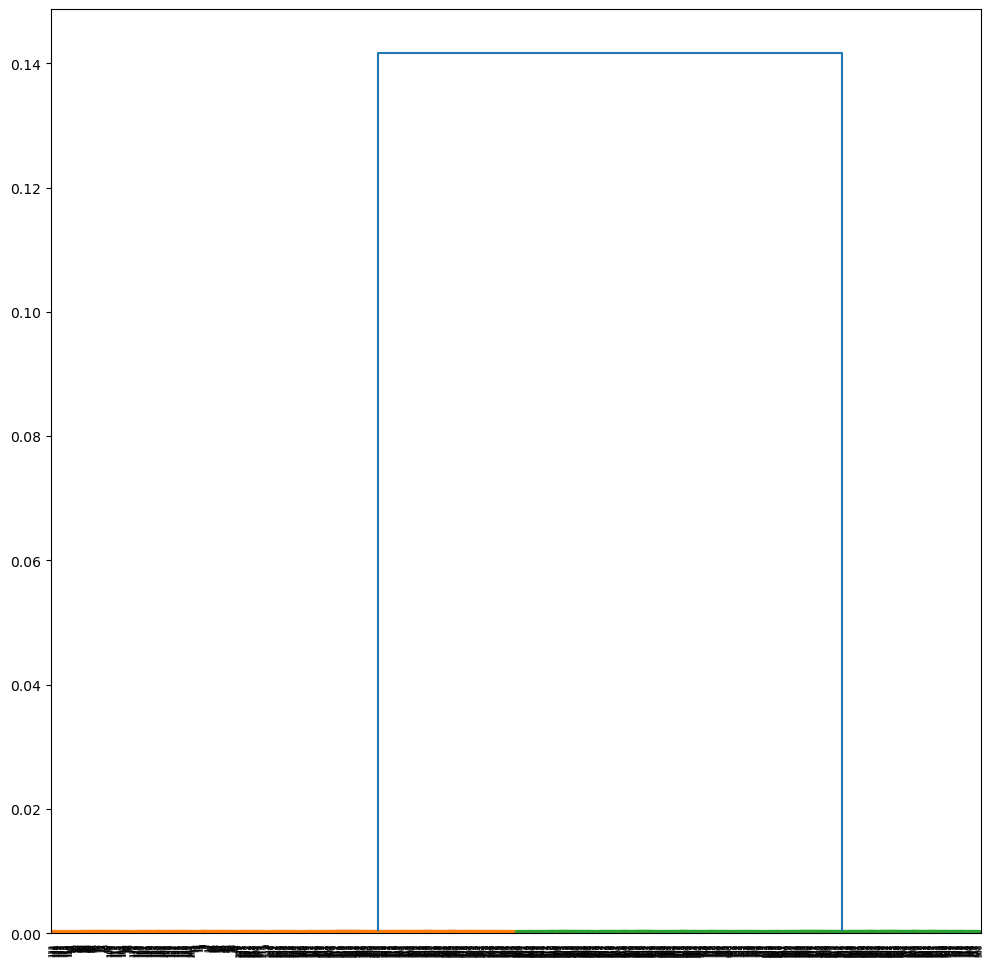

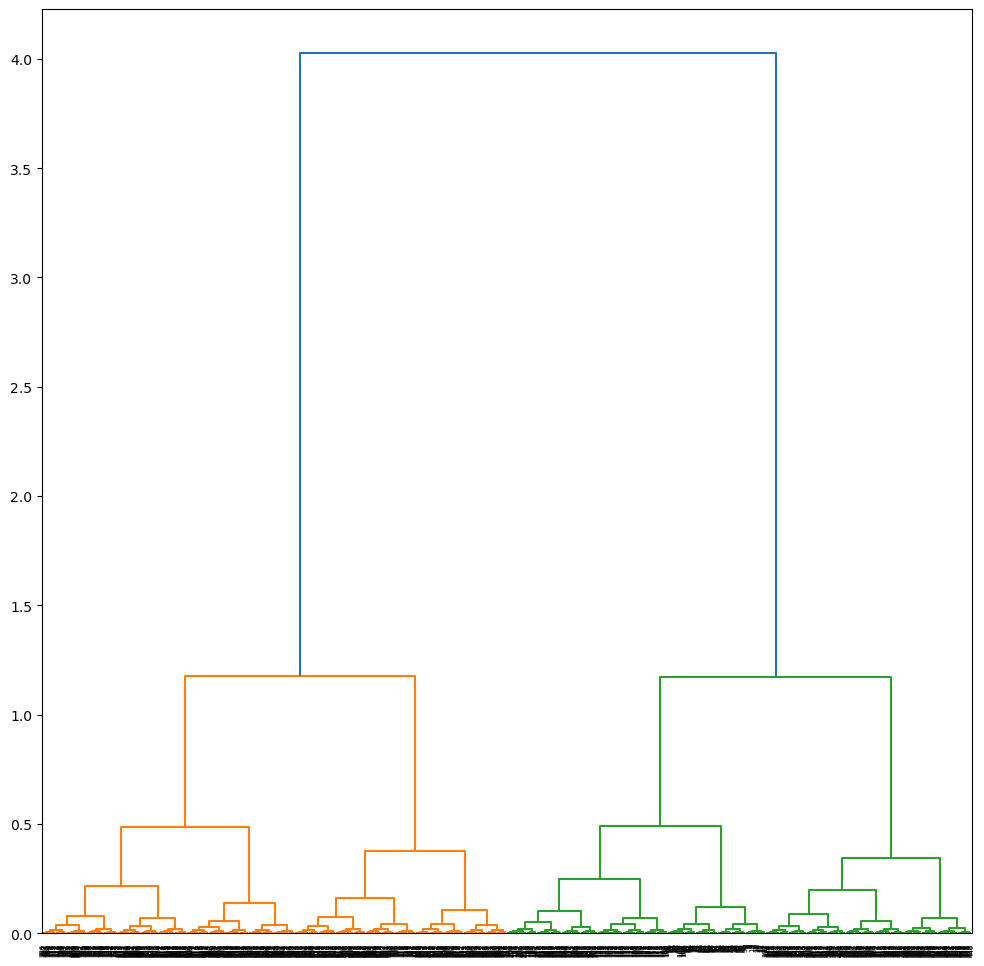

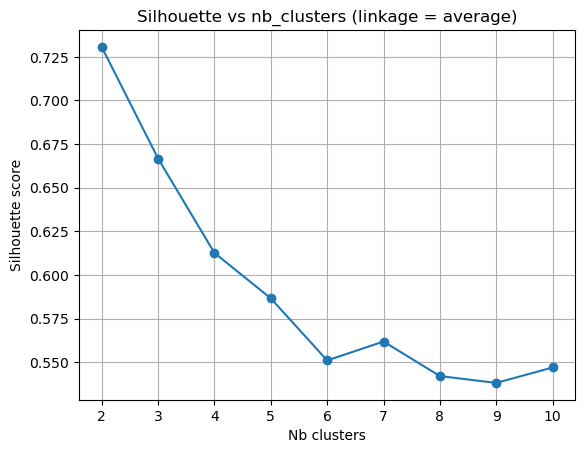

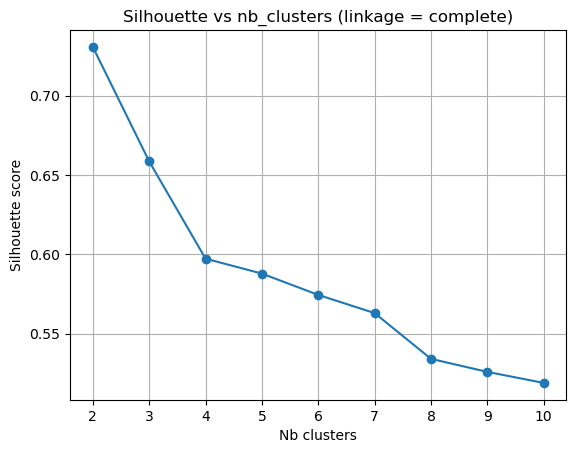

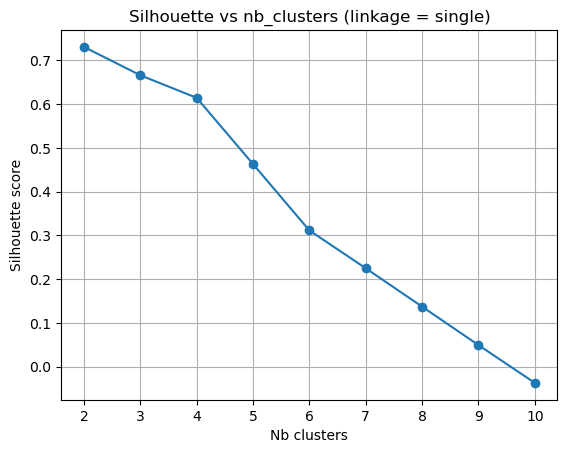

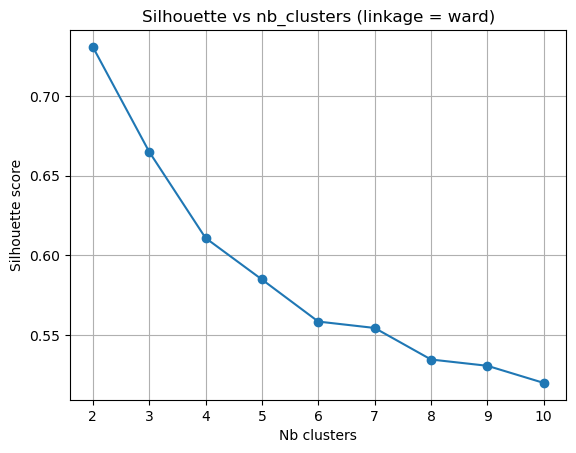

Best Silhouette clustering. With nb_clusters : 2 and linkage:  single


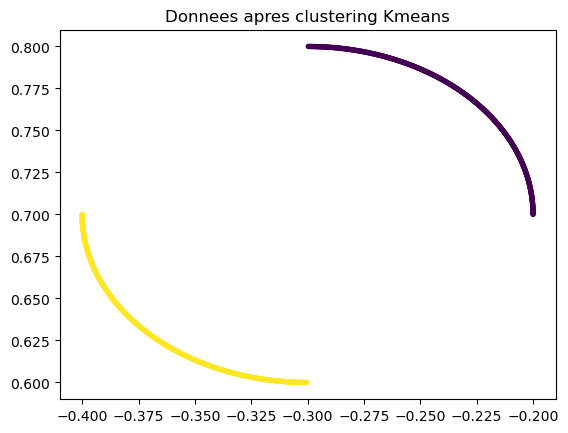

nb clusters = 4 runtime = 4.1  ms


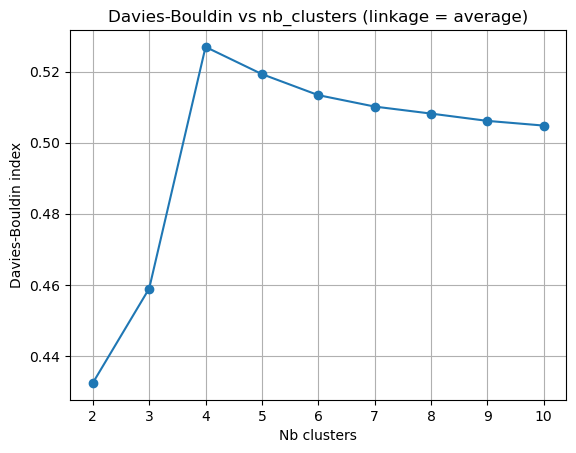

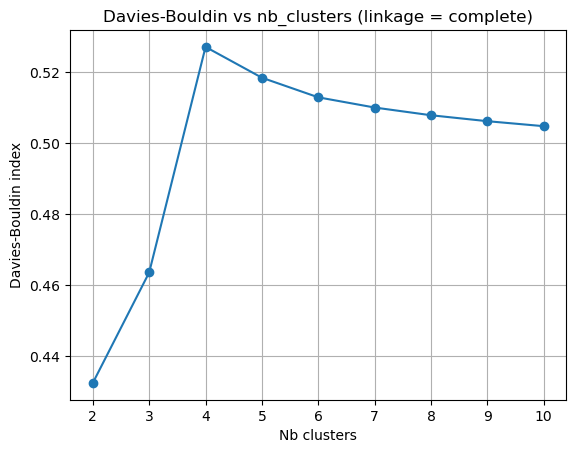

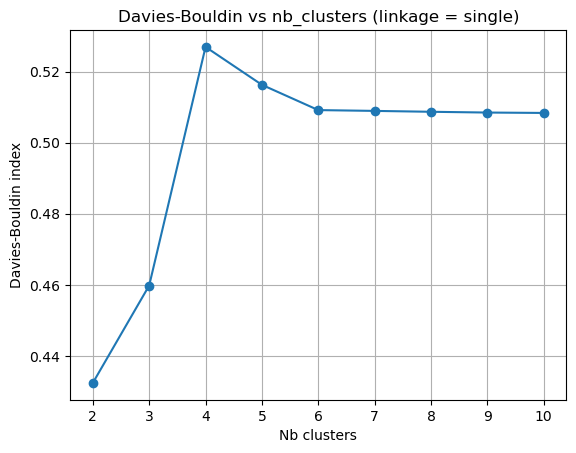

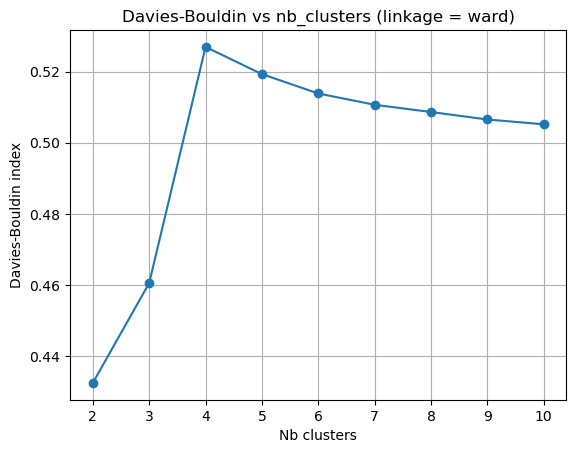

Best Davies-Bouldin clustering. With nb_clusters : 2 and linkage:  single


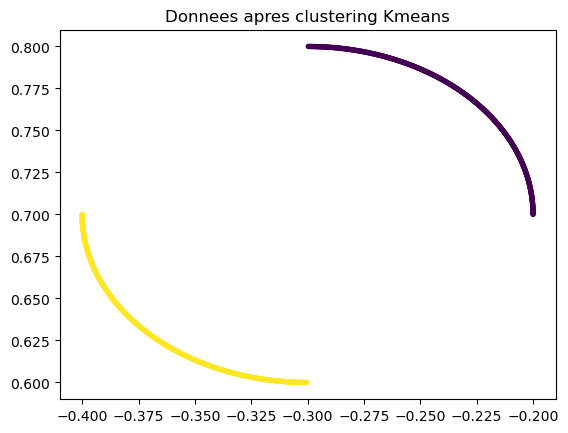

nb clusters = 4 runtime = 3.91  ms


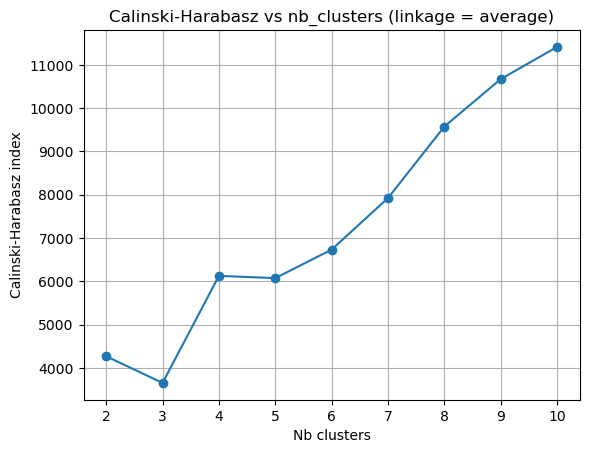

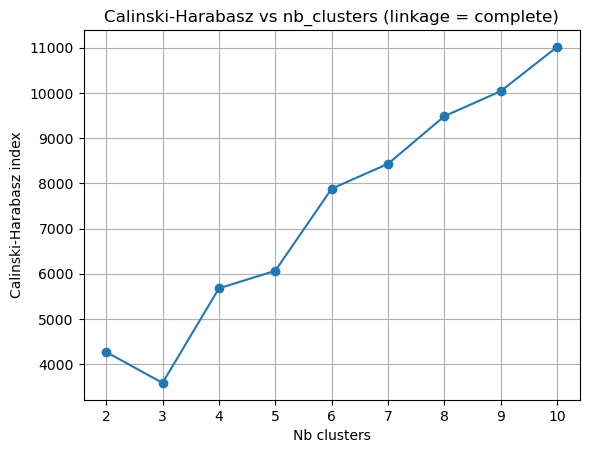

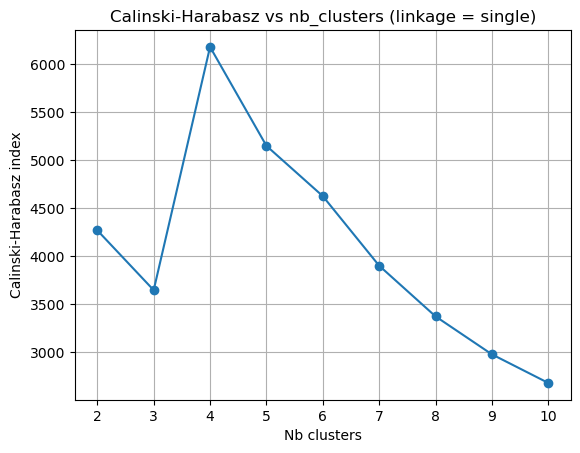

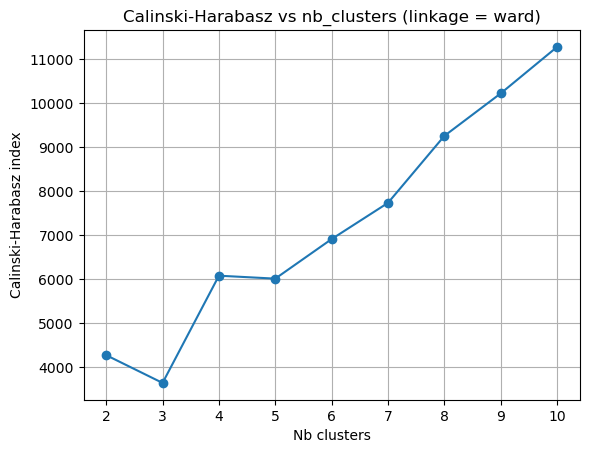

Best Calinski-Harabasz clustering. With nb_clusters : 10 and linkage:  average


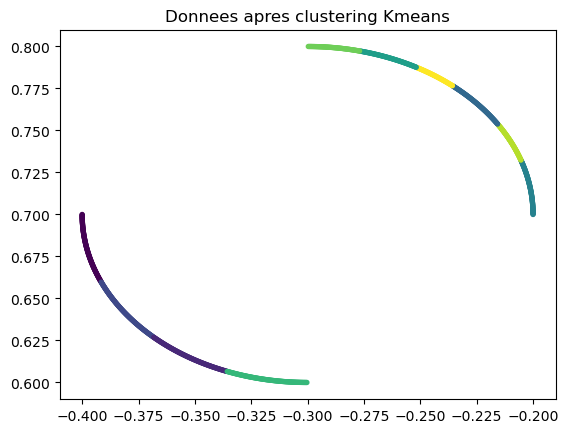

nb clusters = 4 runtime = 7.72  ms
ANALYSE POUR DATASET: dartboard1.arff


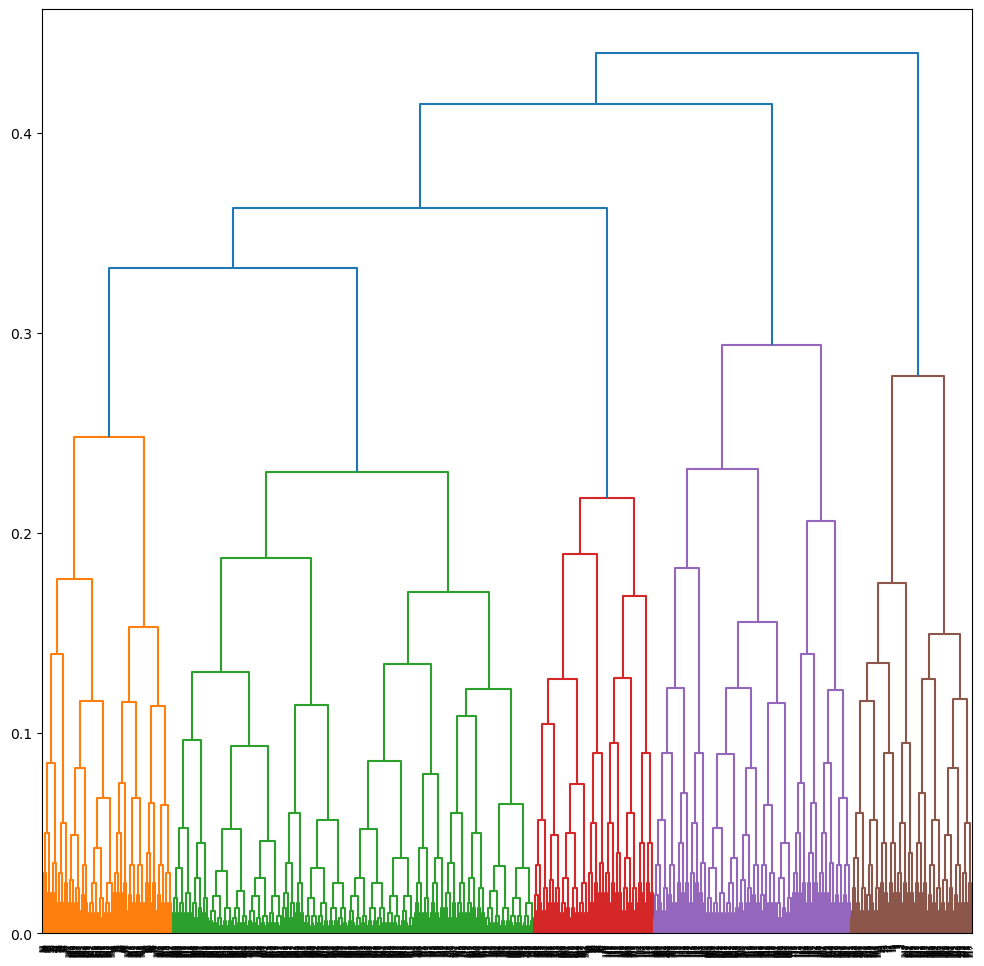

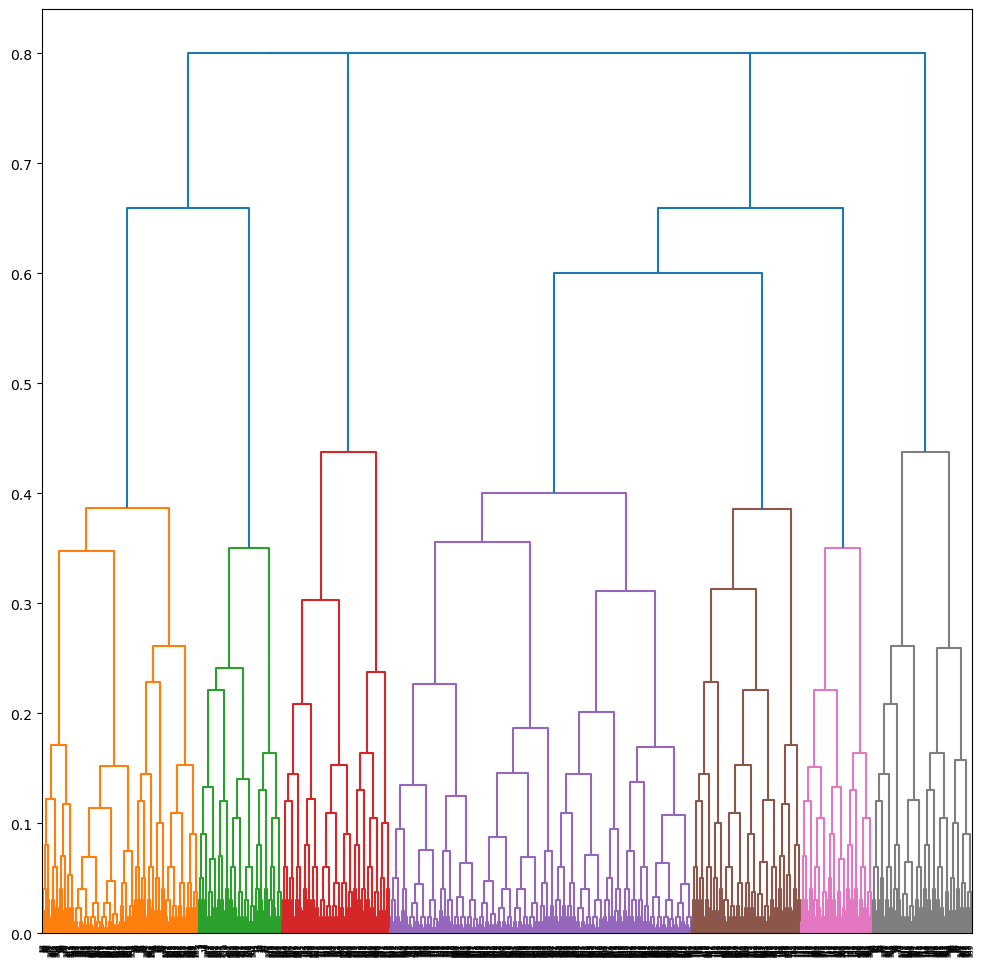

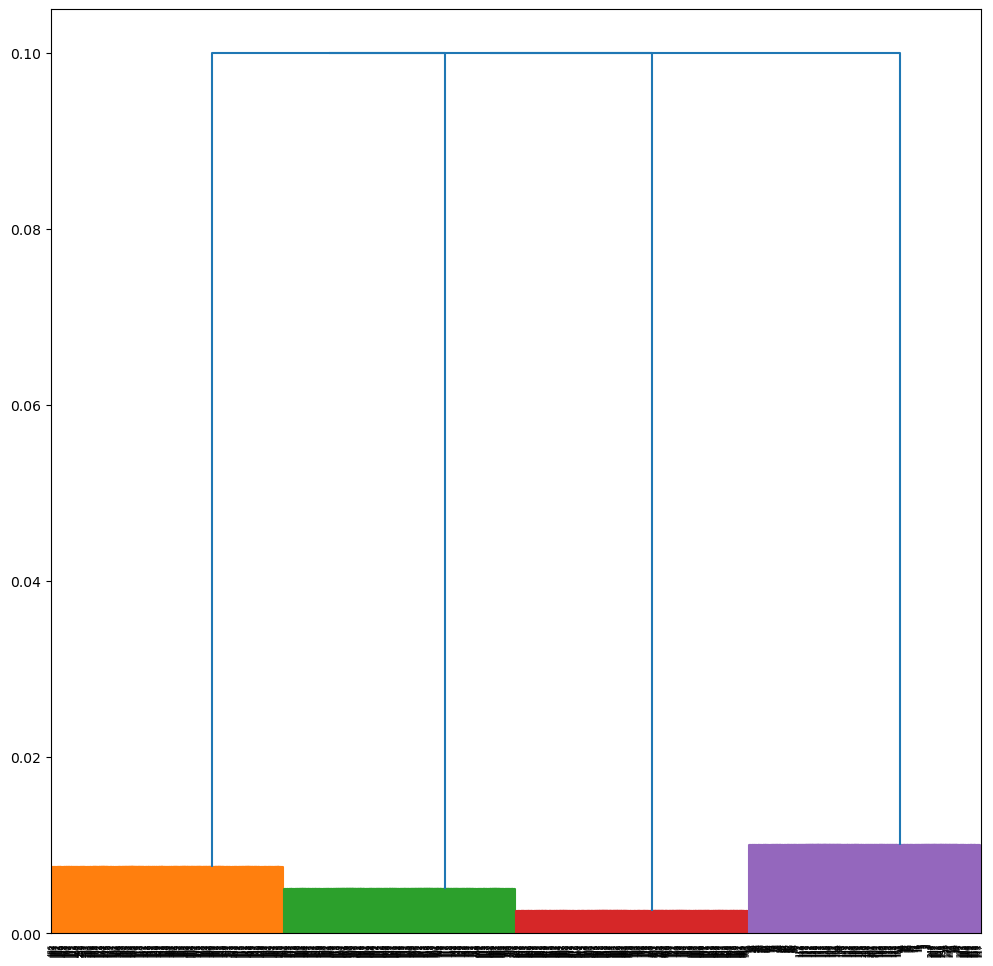

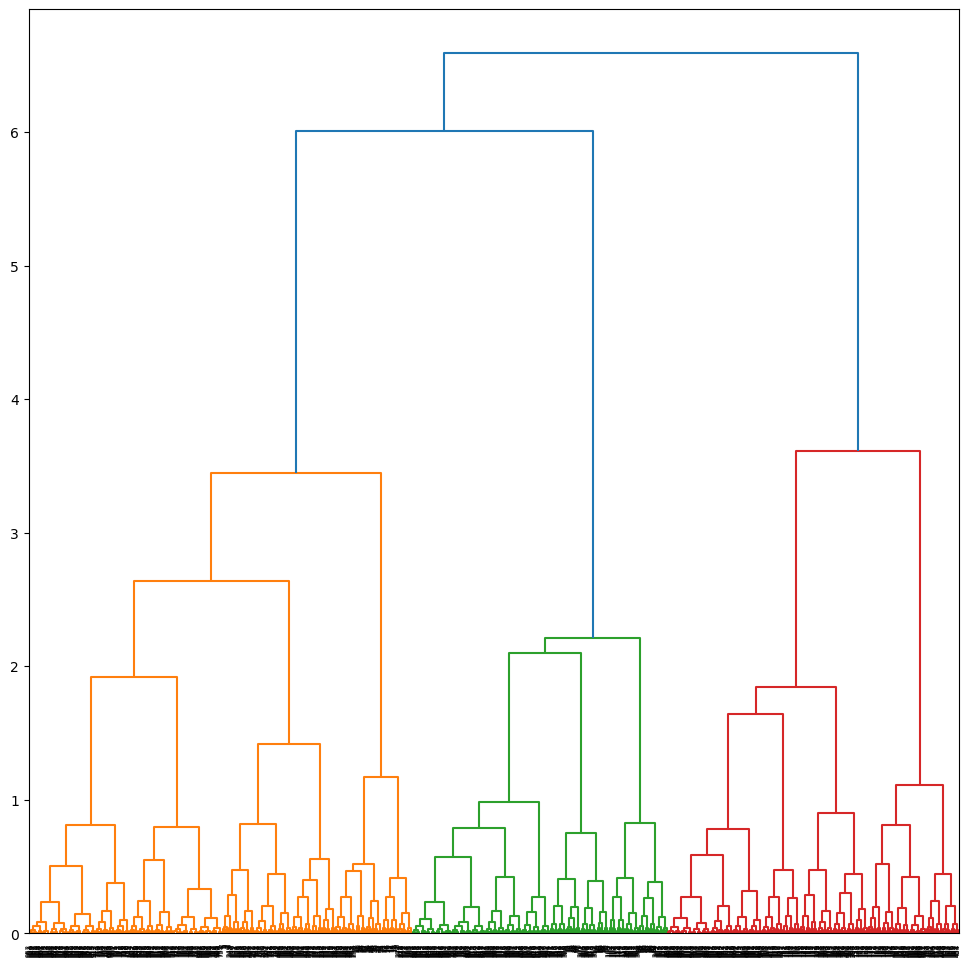

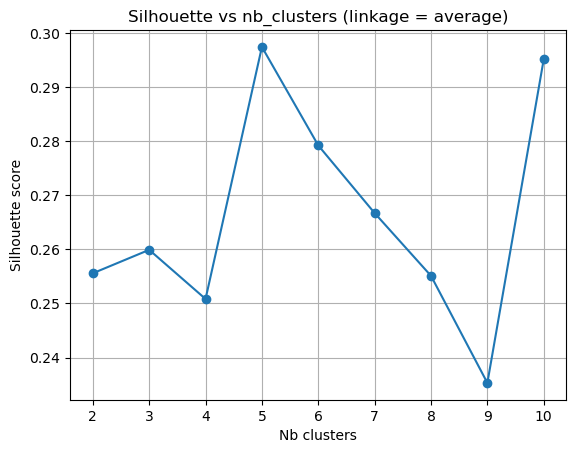

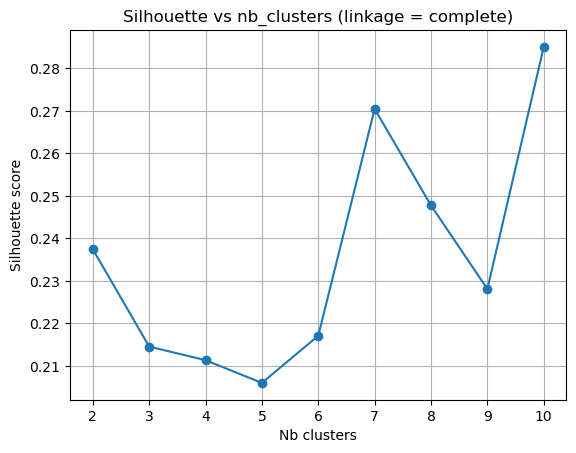

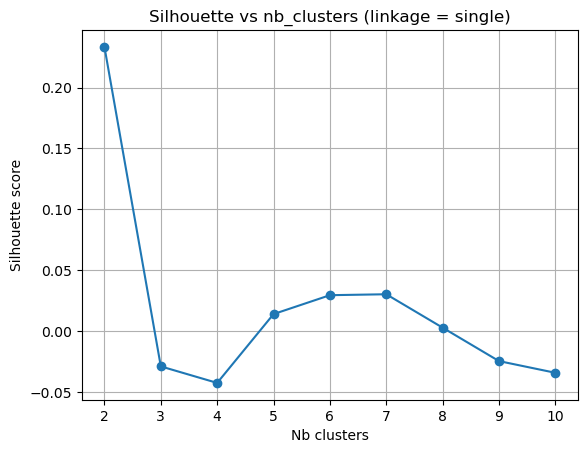

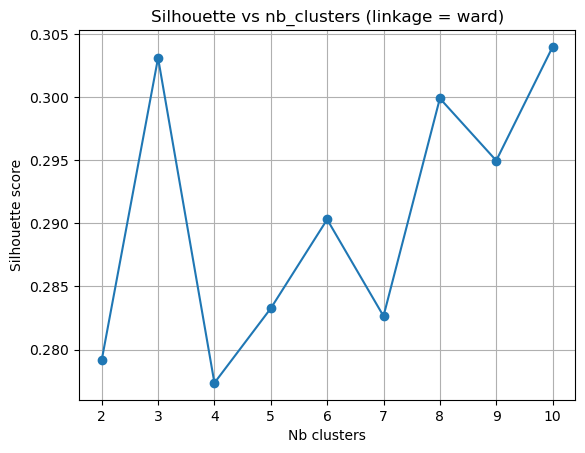

Best Silhouette clustering. With nb_clusters : 10 and linkage:  ward


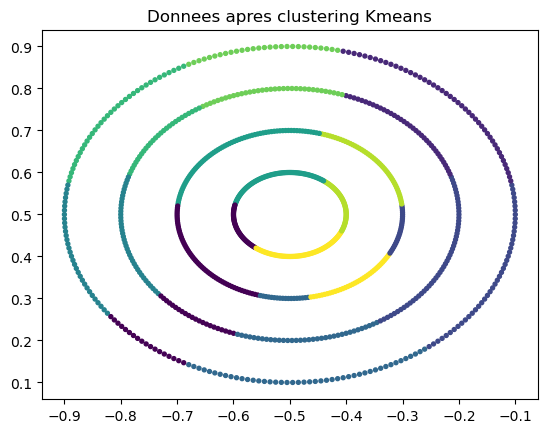

nb clusters = 4 runtime = 10.04  ms


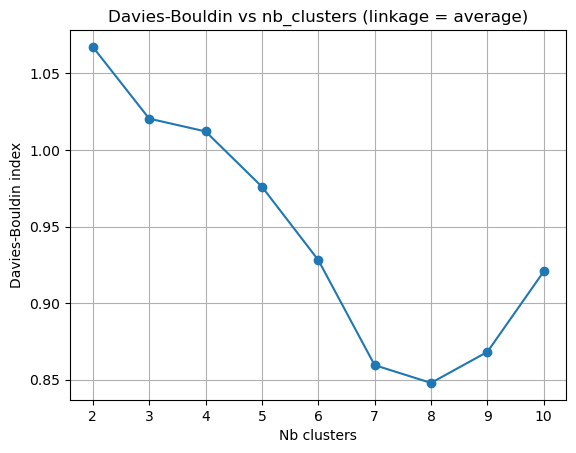

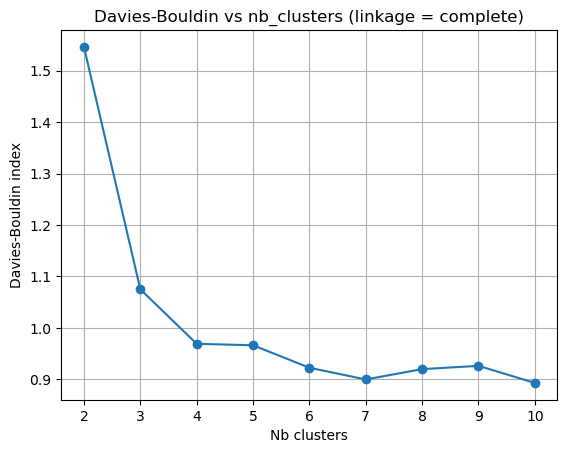

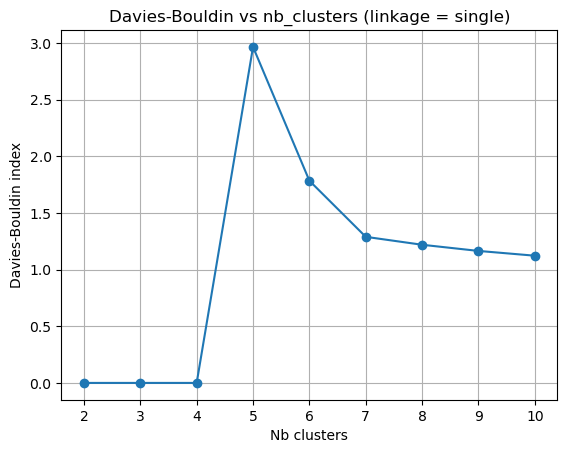

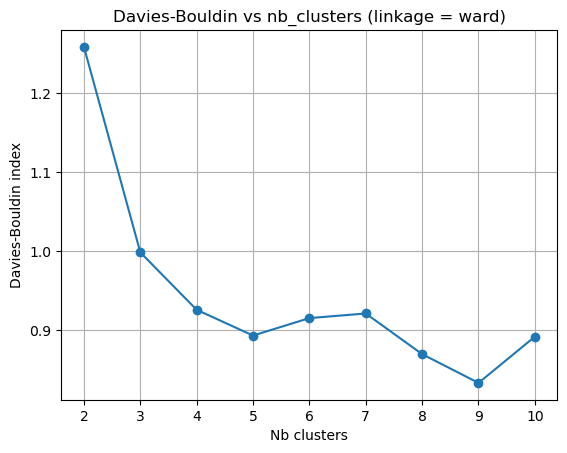

Best Davies-Bouldin clustering. With nb_clusters : 2 and linkage:  single


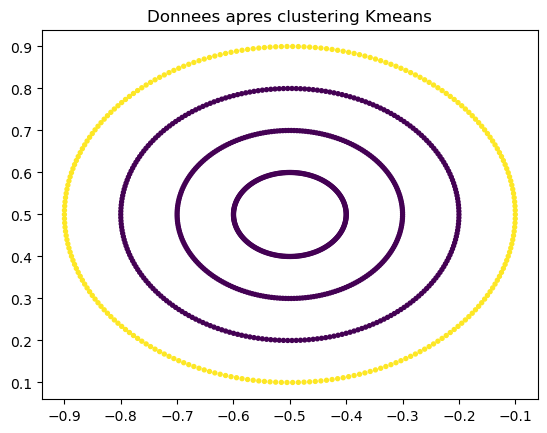

nb clusters = 4 runtime = 4.08  ms


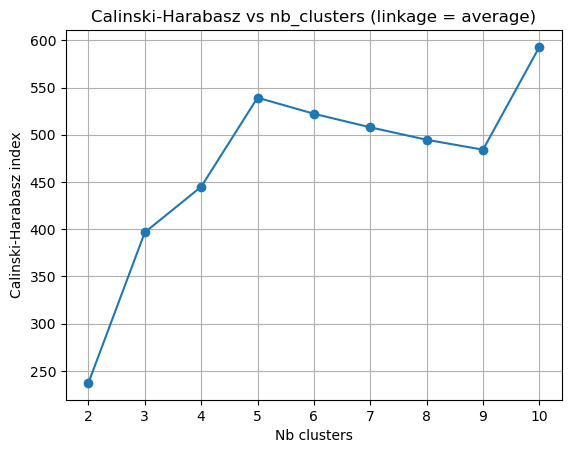

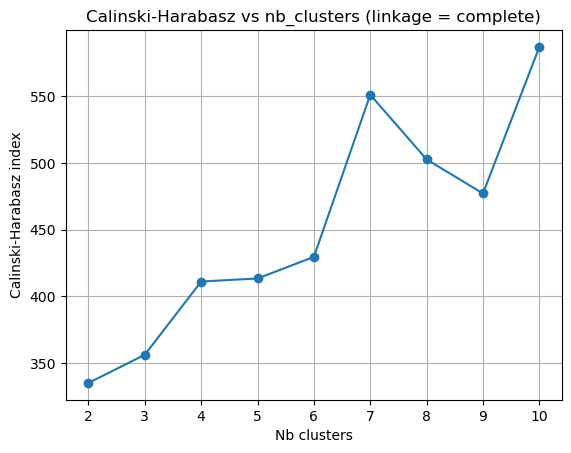

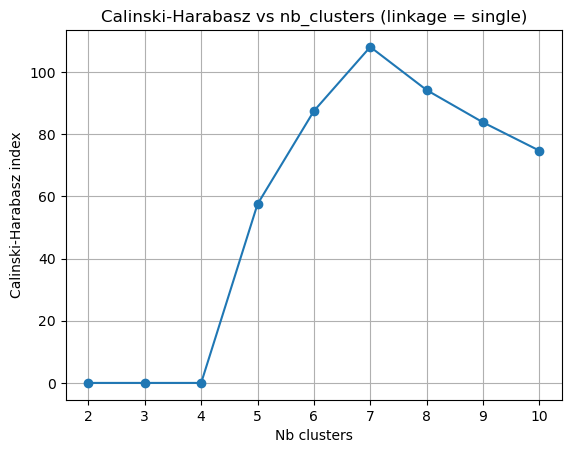

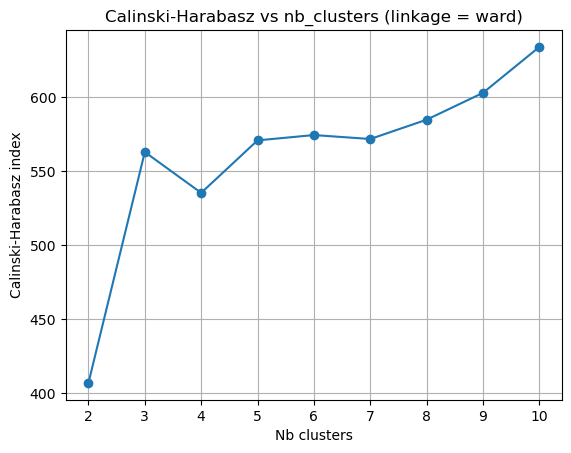

Best Calinski-Harabasz clustering. With nb_clusters : 10 and linkage:  ward


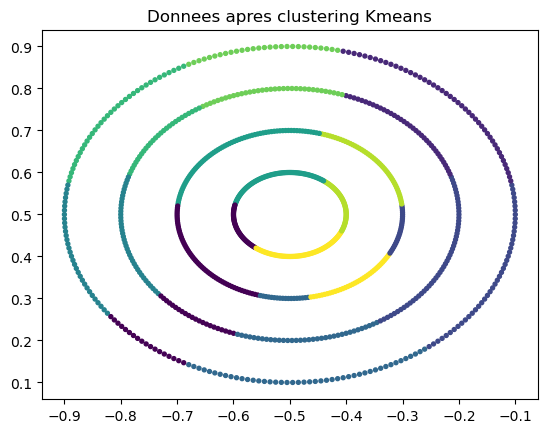

nb clusters = 4 runtime = 9.97  ms


In [59]:
########JEUX DE DONNEES FACILES POUR AGGLOMERATIVE EN NB_CLUSTERS

k_range = range(2, 11)
datasets = ["curves1.arff", "dartboard1.arff"]
linkages = ["single", "average", "complete", "ward"]
for name in datasets:
    print("ANALYSE POUR DATASET: " + name)
    data = load_arff_2d(name)
    results = evaluate_agglomerative_nb_clusters(data, k_range, linkages)
    show_results_agglo_nb_clusters(data, results)

In [ ]:
########JEUX DE DONNEES DIFFICILES POUR AGGLOMERATIVE EN NB_CLUSTERS

k_range = range(2, 11)
datasets = ["compound.arff", "square5.arff"]
linkages = ["single", "average", "complete", "ward"]
for name in datasets:
    print("ANALYSE POUR DATASET: " + name)
    data = load_arff_2d(name)
    results = evaluate_agglomerative_nb_clusters(data, dist_range, linkages)
    show_results_agglo_nb_clusters(data, results)

#### Explication de la methode

On voit que le


## 4 Application du clustering sur vos propres jeux de données

Dans cette partie, votre objectif sera d'appliquer les méthodes de clustering vue ci-dessous à un nouveau dataset de votre choix.

### 4.1 Choix du dataset

Renseigner votre choix ici:
https://insatoulousefr-my.sharepoint.com/:x:/g/personal/leleux_insa-toulouse_fr/EYIRh5gcexNMneZ63zorfwkBUYaJ0orIOm8Pe5QzqpQ55g?e=yNSVSI

Les contraintes pour vos jeux de données:
- Données d'entrées: Image, Signaux temporels, tabulaire (> 10 features grand minimum)
- Nombre d'exemples suffisamment grand pour permettre de faire du clustering (un ordre de grandeur de plus que le nombre de features pour les données tabulaires)
- labels/vérité disponible

4.2 Prétraitement de votre dataset

**Exploration**

Commencez par explorer votre jeu de données !
- Combien d'exemples ?
- Quelles sont les features ? Combien ?
- Quels sont les labels ? Regardez la distribution, est-ce qu'ils sont équilibrés ?
- Est-ce qu'il y a une grande variété de données ?
- **Si ce sont des images, affichez quelques exemples en python !**

**Normalisation**

N'oubliez pas de systématiquement normaliser vos données: https://scikit-learn.org/stable/modules/preprocessing.html
```
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
```

4.3 Réduction de dimensions

Jusque là, vous n'avez appliqué le clustering qu'à des données en 2 dimensions.
Est-ce possible/facile/rapide de les appliquer à des données en plus grandes dimensions ?

Afin de pouvoir représenter la distribution de vos données sur un graphe en 2D, vous devez passer par une étape de réduction de dimensions:
- Soit, vous poouvez extraire des features de vos données brutes, e.g. taille de l'image, texture etc... Mais ce sont là des features spécialisées donc pas évidentes.
- Soit, vous pouvez utiliser des méthodes automatiques d'apprentissage non-supervisé. **On va faire ça !** Privilégiez
    - Principal Component Analysis: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
    - t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

# CLUSTERING DE NOTRE DATA

## Pokemon Images Dataset

Explication du dataset: conjunt de imatges de diferents pokemons

### Extraction des features à partir des images

#### Methode CNN

In [62]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np
import os

# 1. Charger le modèle sans les couches finales afin d’extraire les features (il existe d’autres options comme VGG16 ou ResNet50, mais EfficientNet est plus efficace)
base_model = EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# 2. Créer un nouveau modèle qui produit les features
visualization_model = Model(
    inputs=base_model.input,
    outputs=GlobalAveragePooling2D()(base_model.output)
)

# 3. Charger les images, les prétraiter et extraire les features
folder_path = "pokemon"
feature_maps = []
labels = dict()
i =0 
for name in ["Bulbasaur" , "Squirtle", "Charmander", "Pikachu"]:
    files = [f for f in os.listdir(f"{folder_path}/{name}")]
    for img_name in files:
        img_path= os.path.join(folder_path,name,img_name)
        img = load_img(img_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        emb = visualization_model.predict(x)
        feature_maps.append(emb[0])
        labels[img_name]=i
    i=i+1
X= np.array(feature_maps)
print(X.shape)
print(emb.shape)

ModuleNotFoundError: No module named 'tensorflow'

#### Methode ViT

### Normalisation

#### Normalisation avec StandarScaler

#### Normalisation avec MinMaxScaler

### Réduction des dimensions

#### Réduction avec PCA

#### Réduction avec t-SNE

#### Réduction avec UMAP

### Clustering

#### Clustering avec k-Means

#### Clustering agglomerative

#### Clustering avec DBSCAN

#### Clustering avec HSBCAN